In [1]:
import pandas as pd

Data Information for /home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/raw/EAHCI.json :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _                        100 non-null    object 
 1   id                       100 non-null    int64  
 2   peer_id                  100 non-null    object 
 3   date                     100 non-null    object 
 4   message                  86 non-null     object 
 5   out                      100 non-null    bool   
 6   mentioned                100 non-null    bool   
 7   media_unread             100 non-null    bool   
 8   silent                   100 non-null    bool   
 9   post                     100 non-null    bool   
 10  from_scheduled           86 non-null     object 
 11  legacy                   100 non-null    bool   
 12  edit_hide                86 non-n

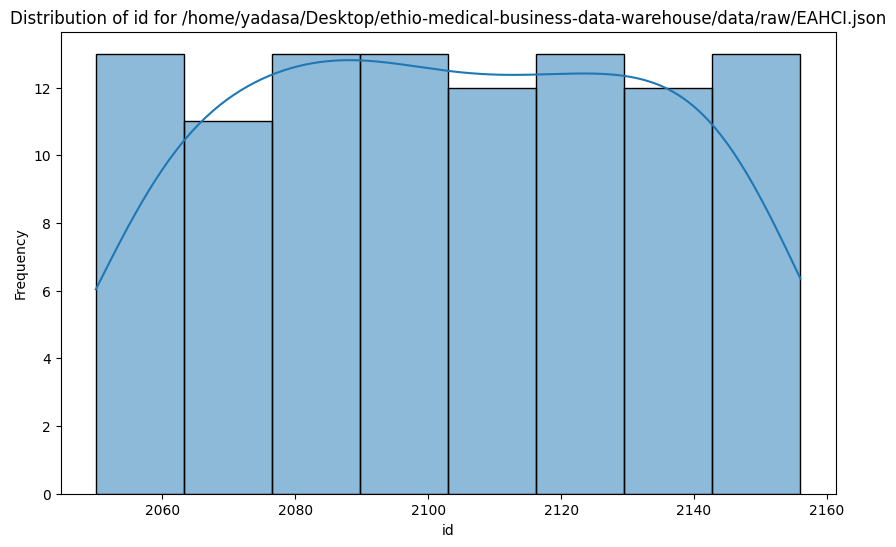

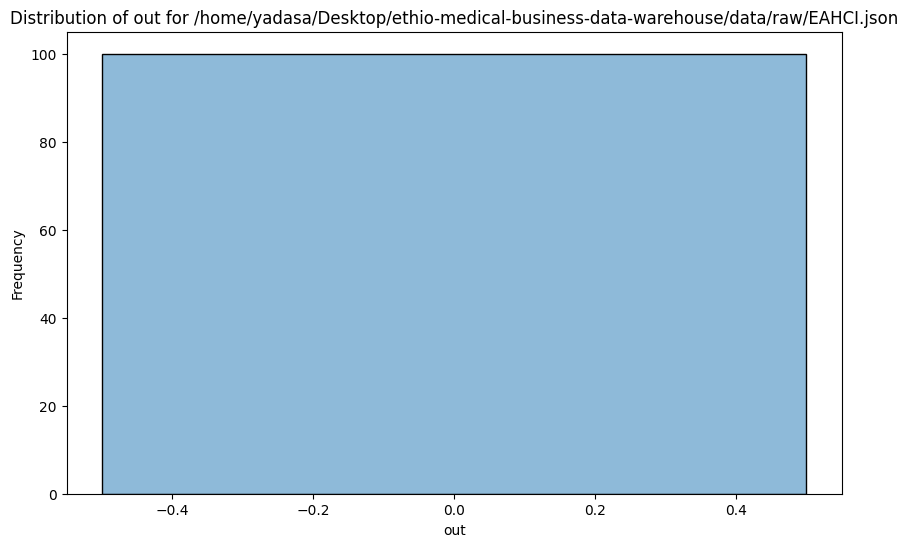

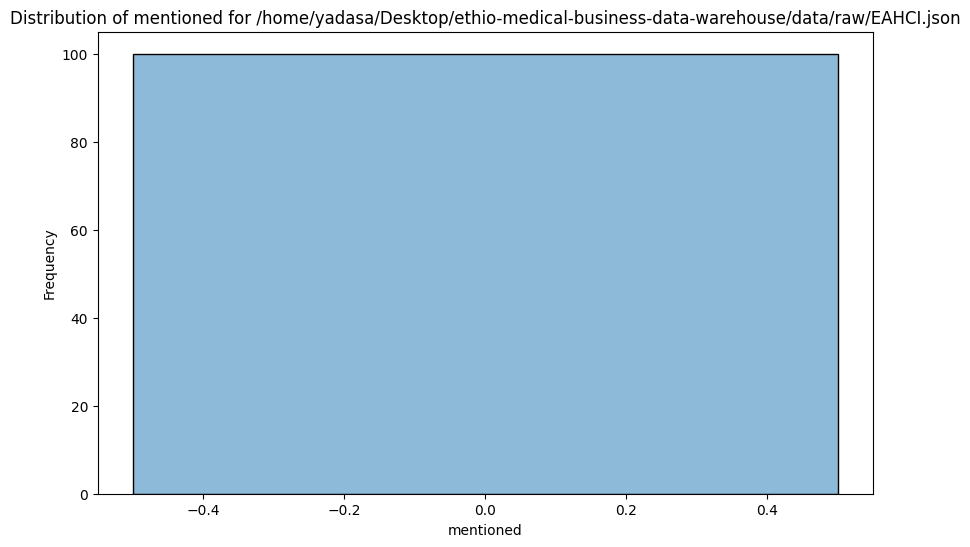

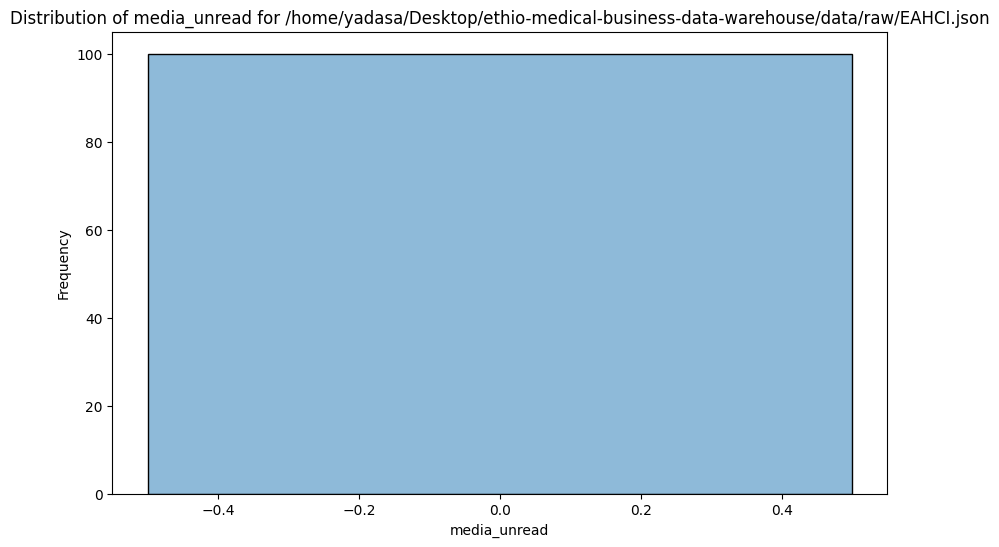

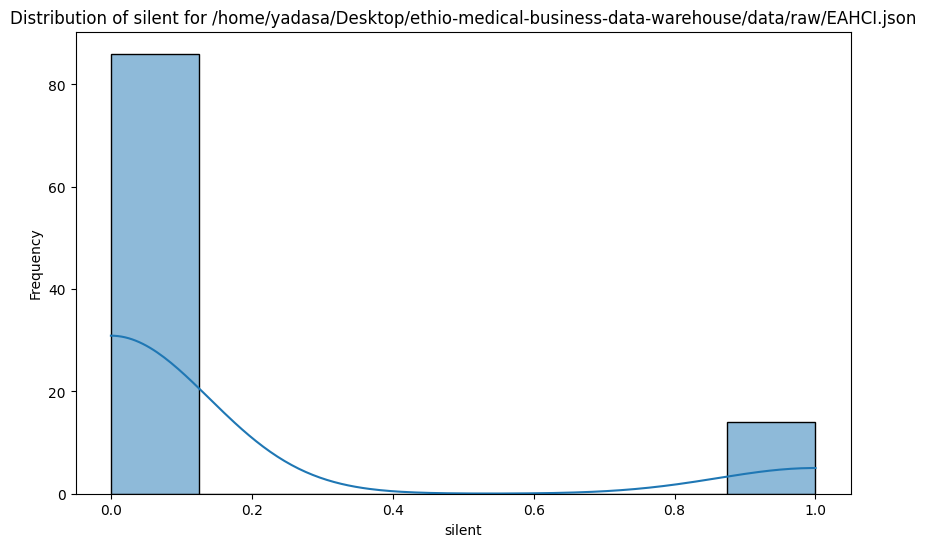

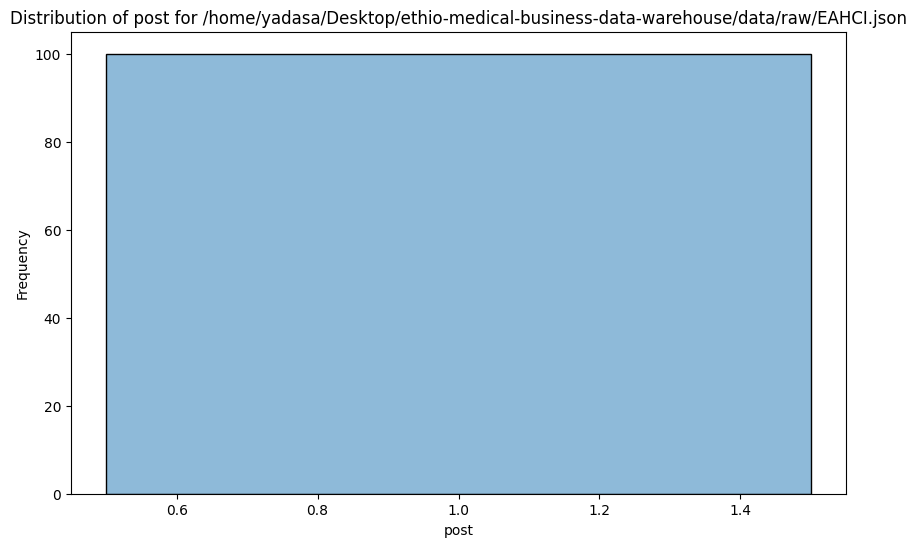

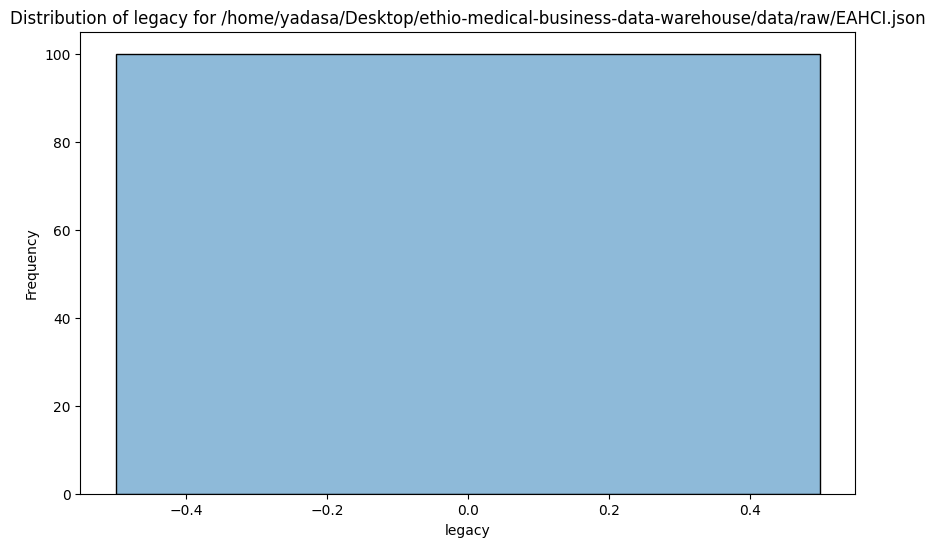

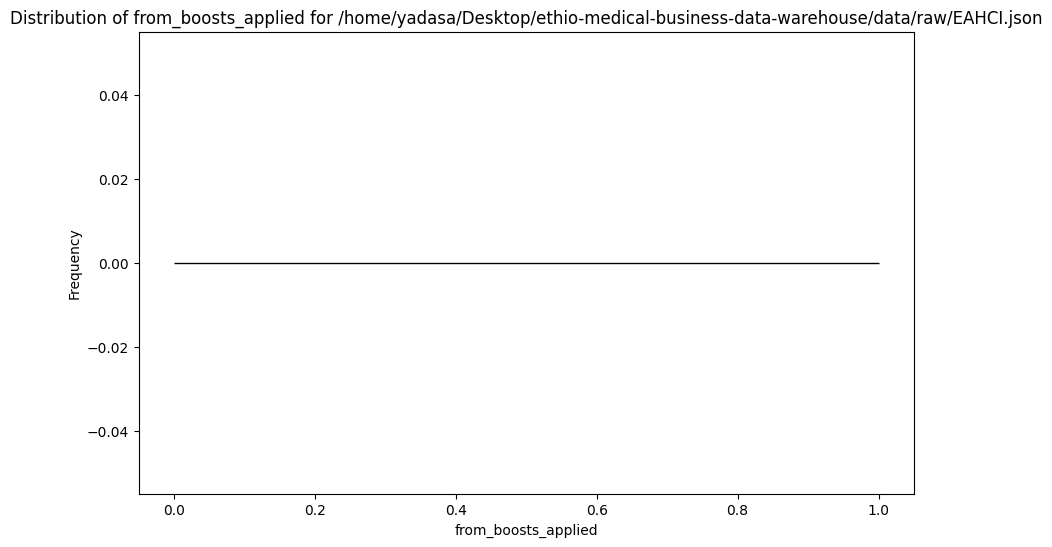

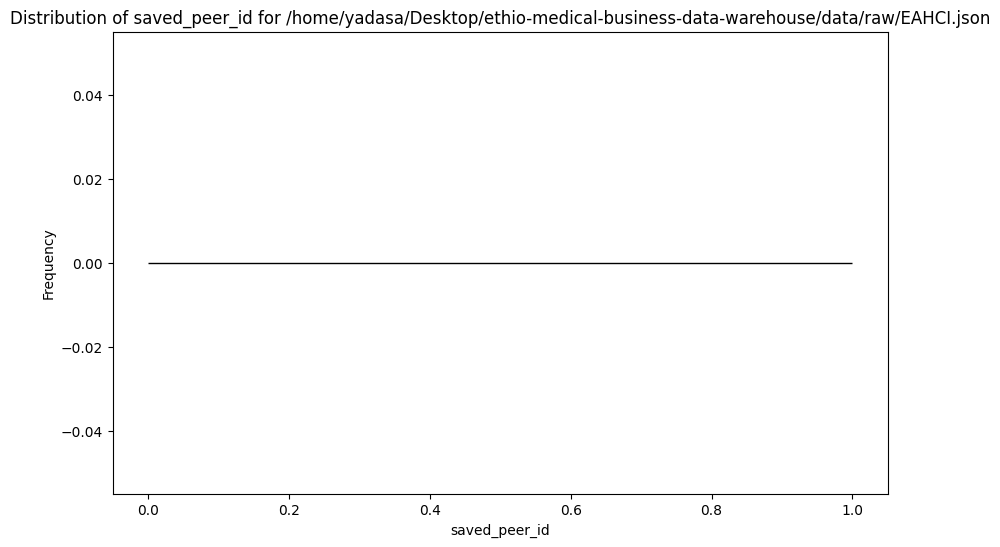

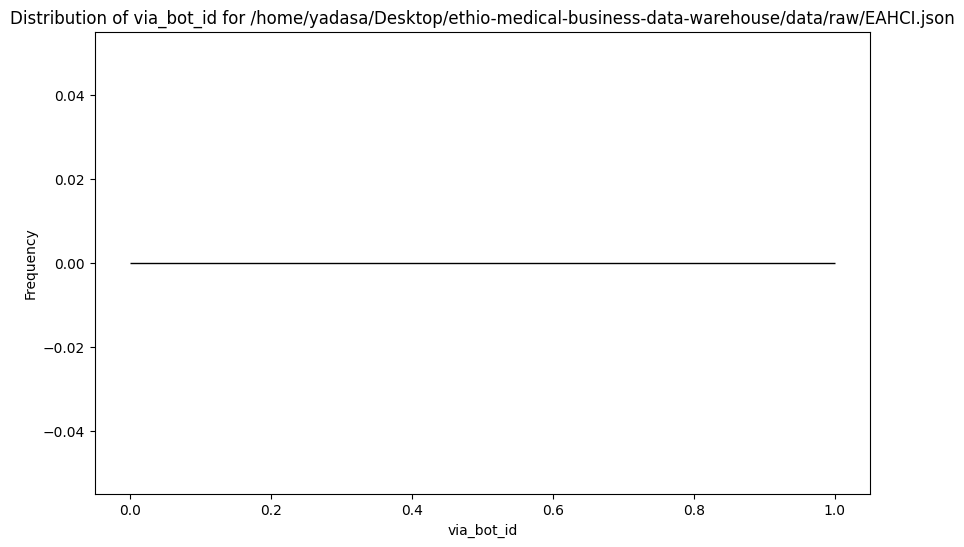

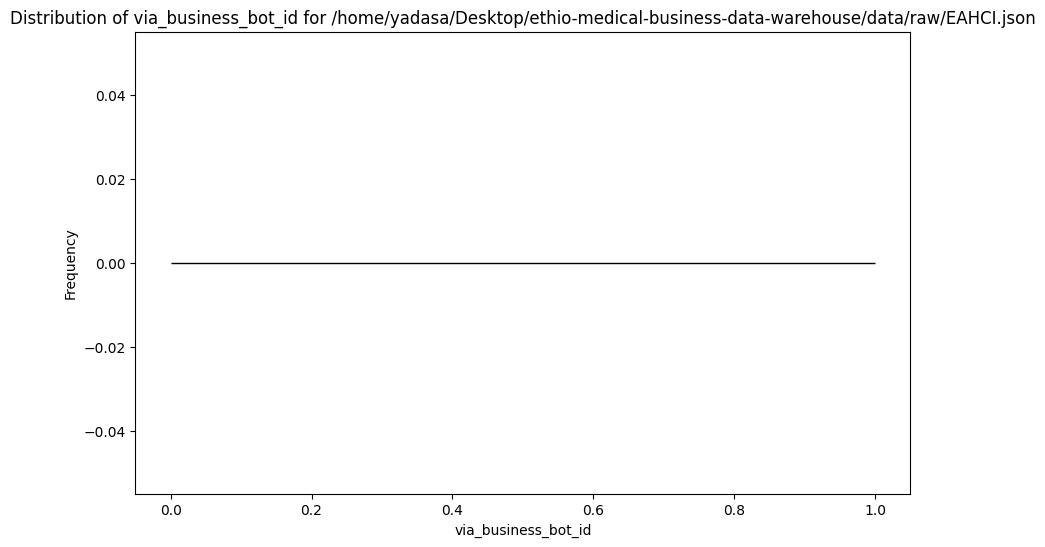

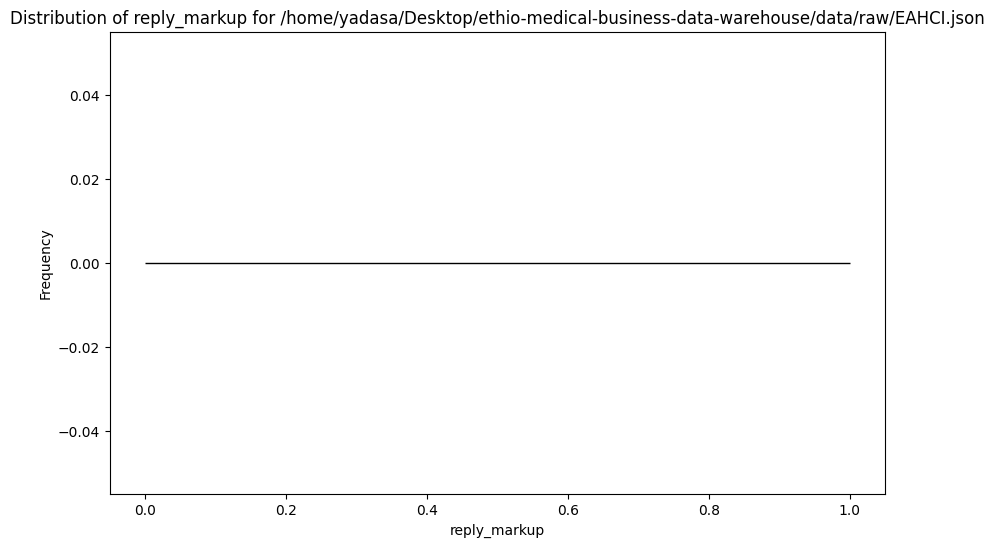

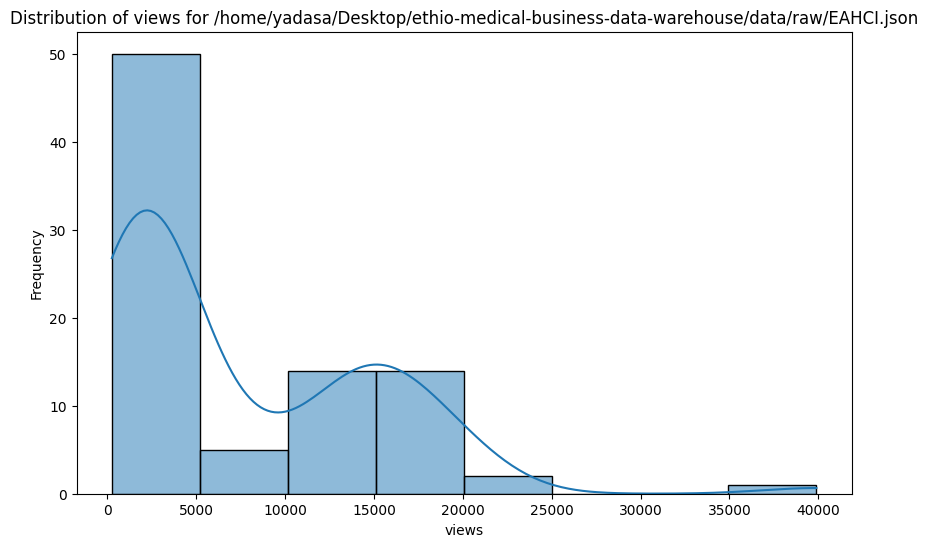

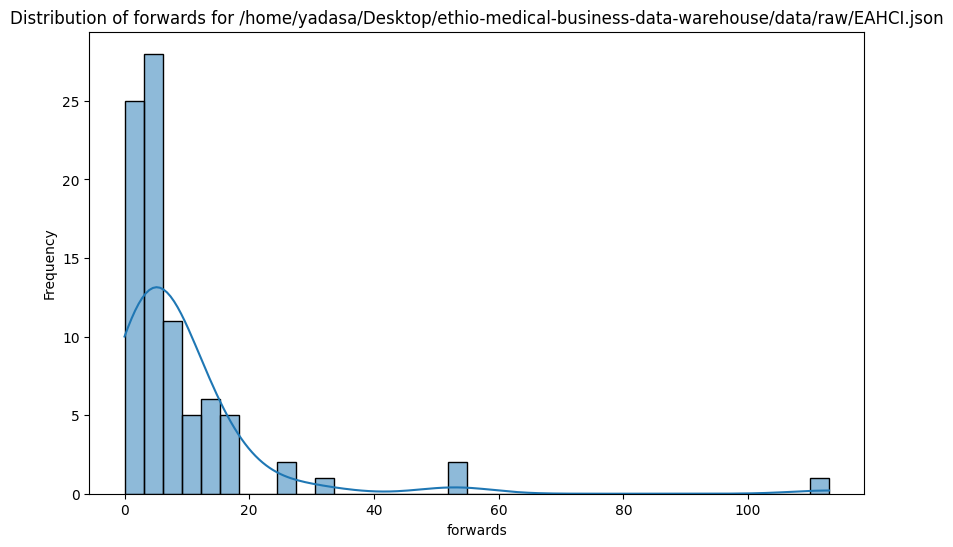

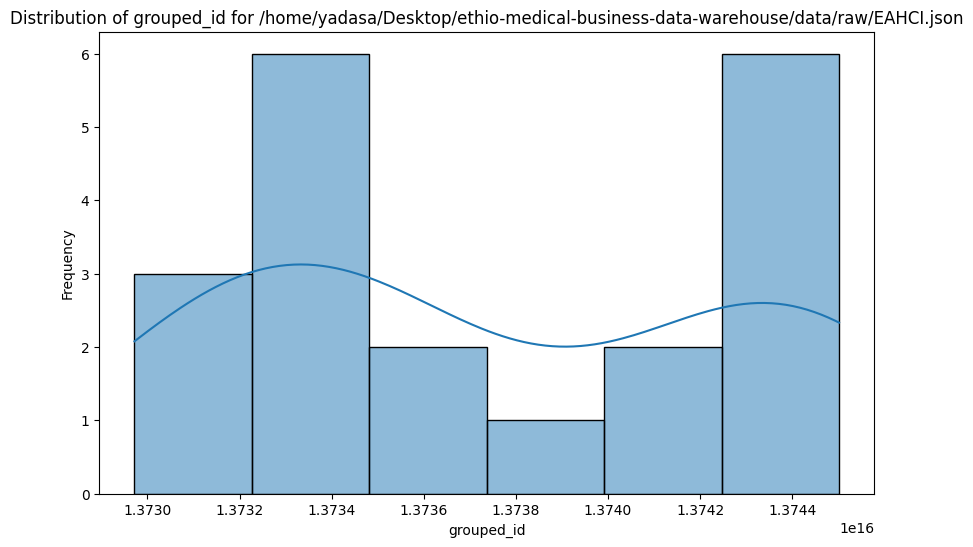

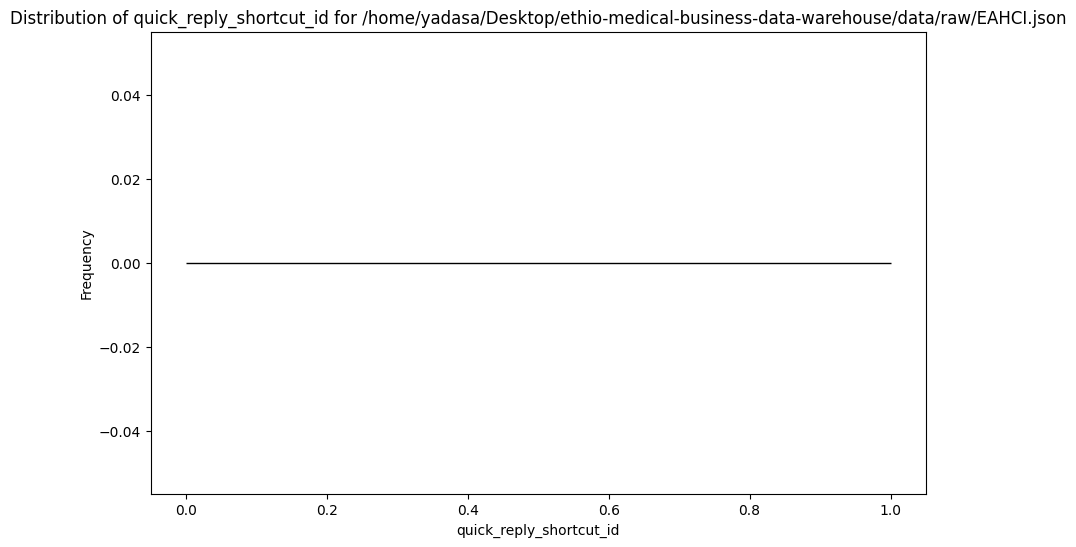

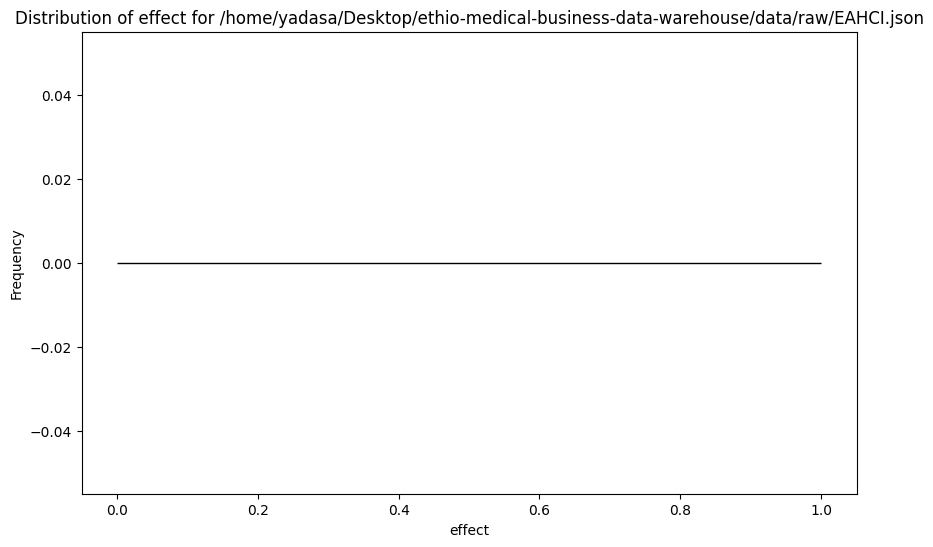

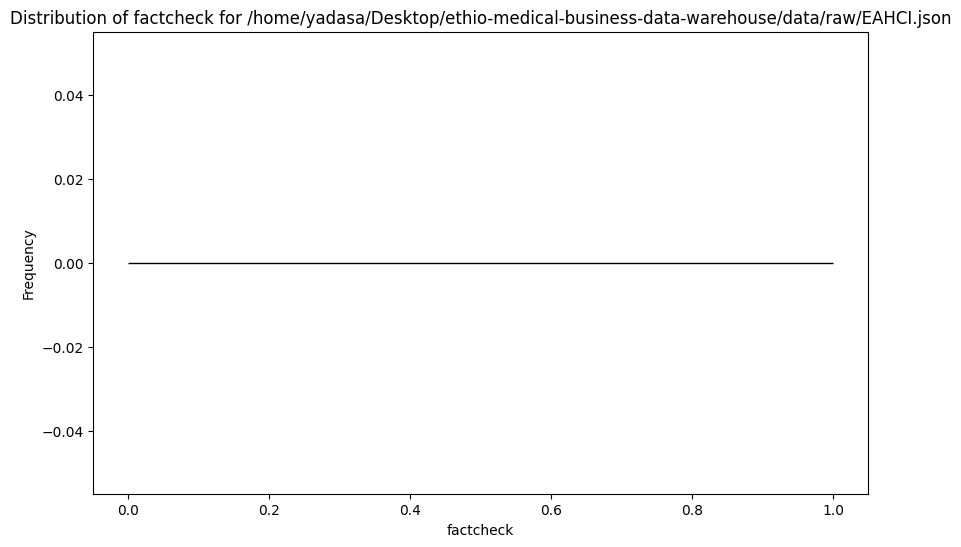

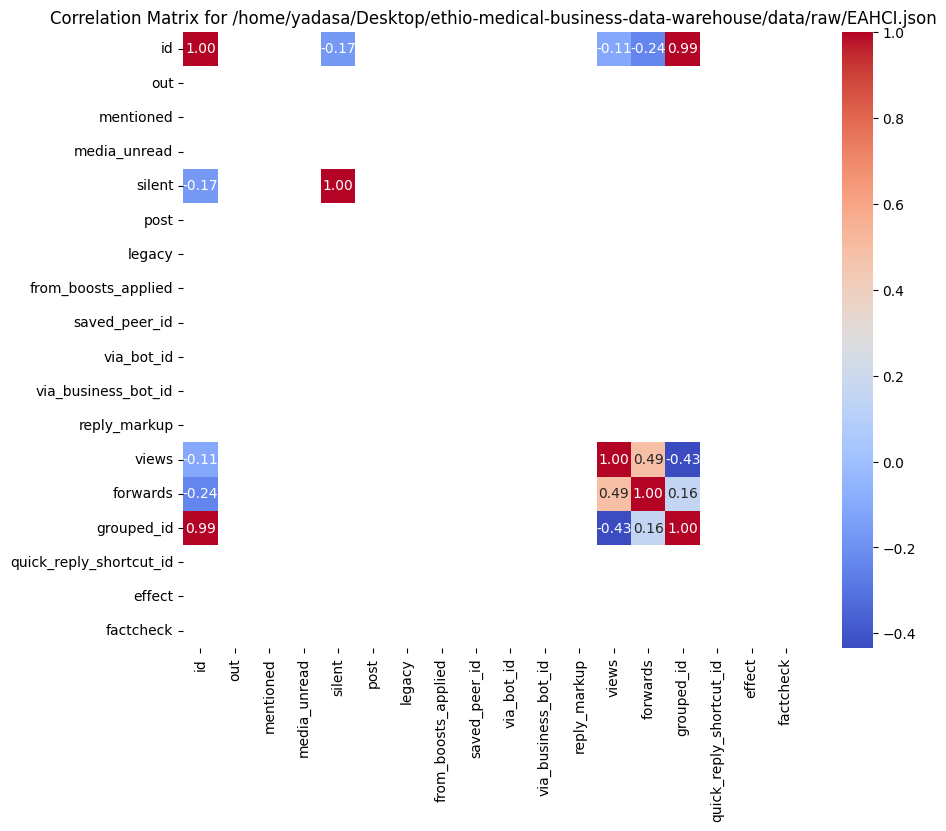

Column 'image' not found in the DataFrame.
Data Information for /home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/EAHCI_cleaned.json :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   _                        100 non-null    object
 1   id                       100 non-null    int64 
 2   peer_id                  100 non-null    object
 3   date                     100 non-null    int64 
 4   message                  100 non-null    object
 5   out                      100 non-null    bool  
 6   mentioned                100 non-null    bool  
 7   media_unread             100 non-null    bool  
 8   silent                   100 non-null    bool  
 9   post                     100 non-null    bool  
 10  from_scheduled           100 non-null    object
 11  legacy                   100 non-null    bool

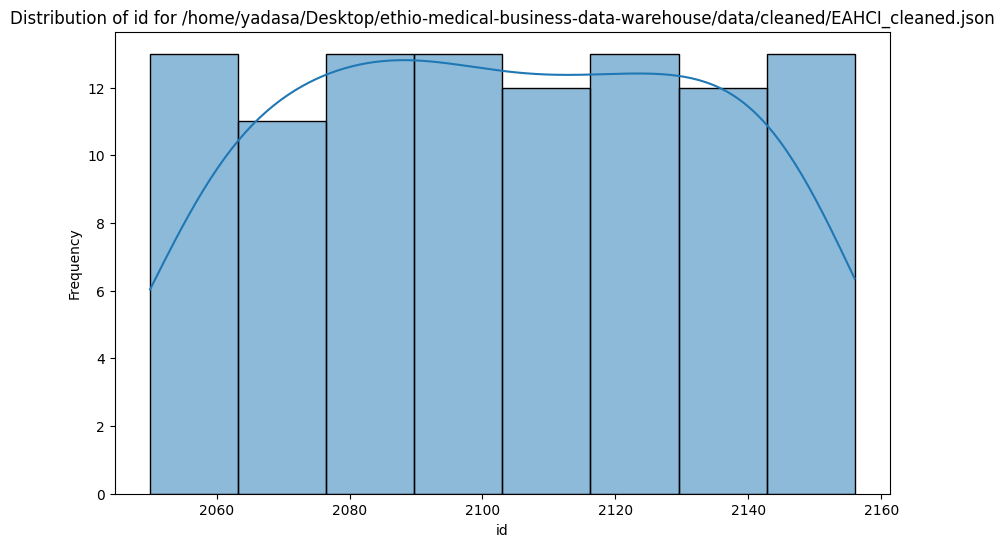

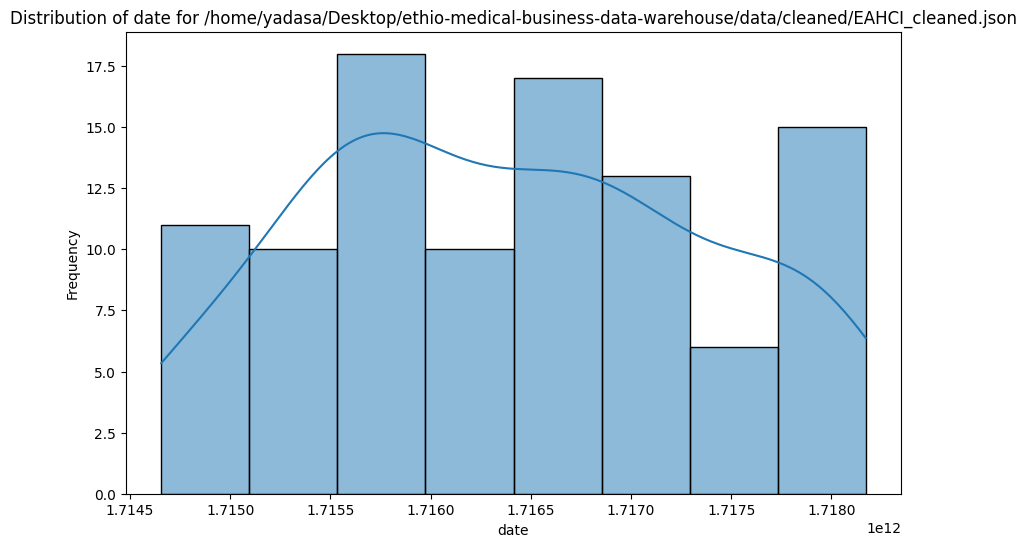

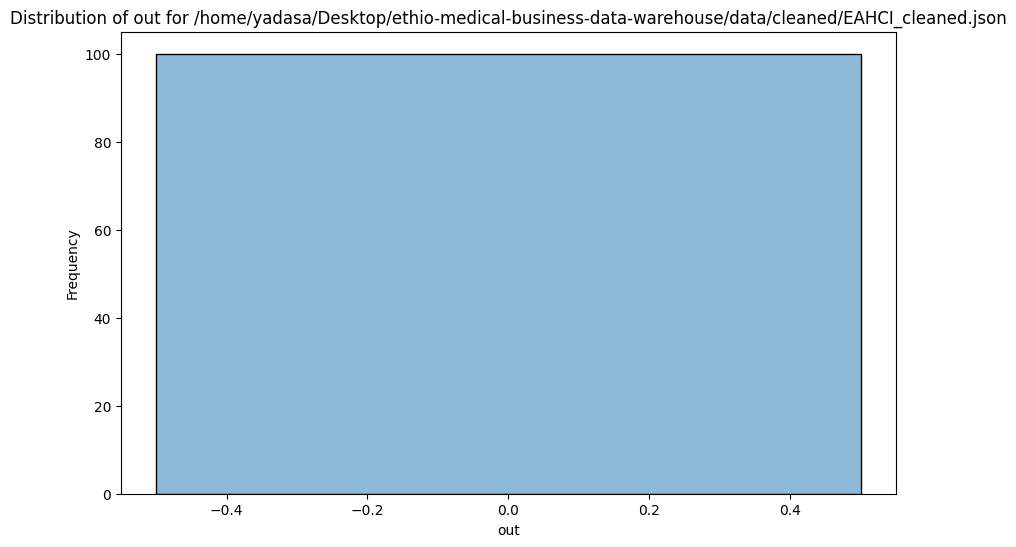

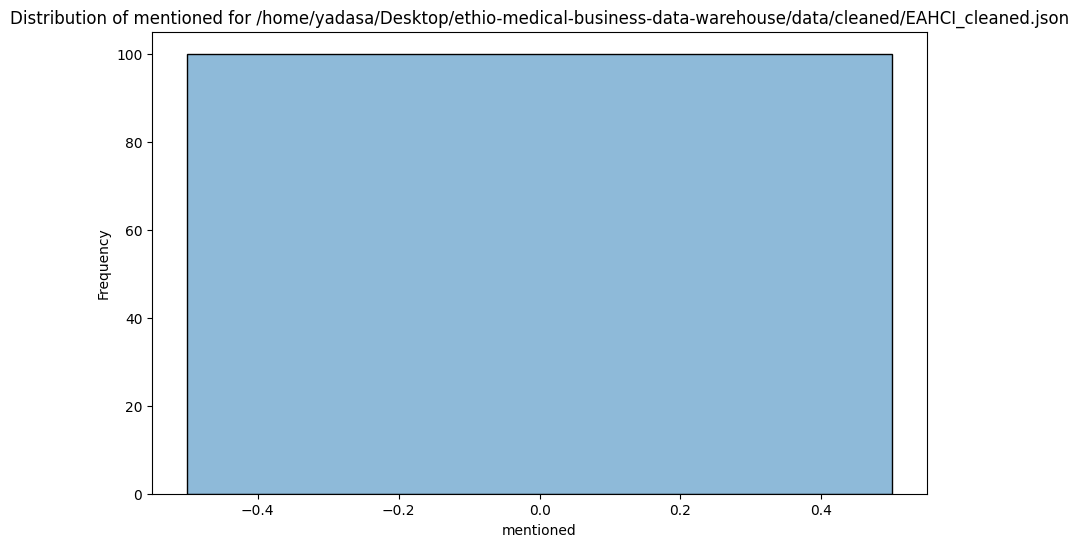

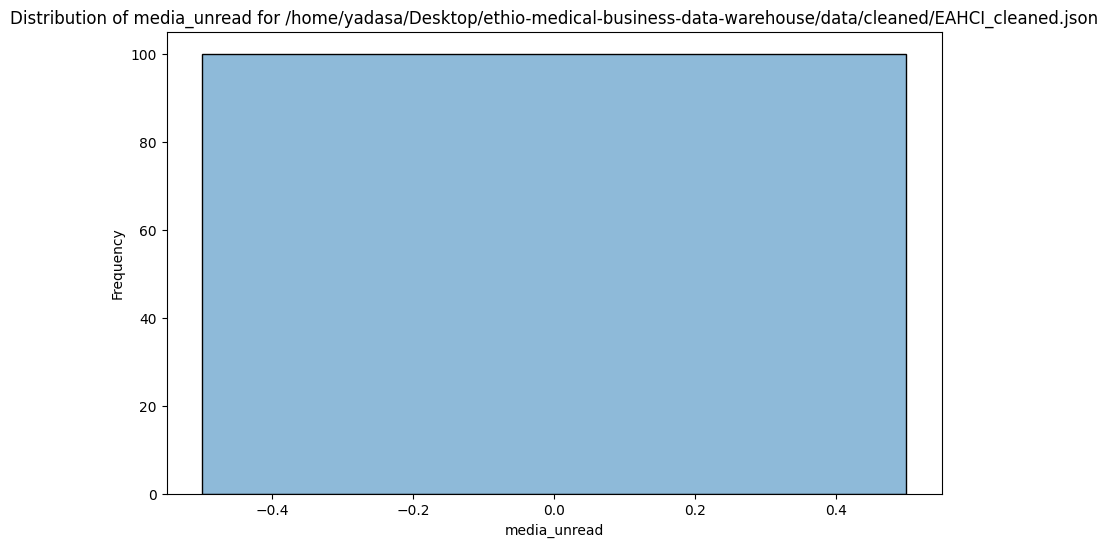

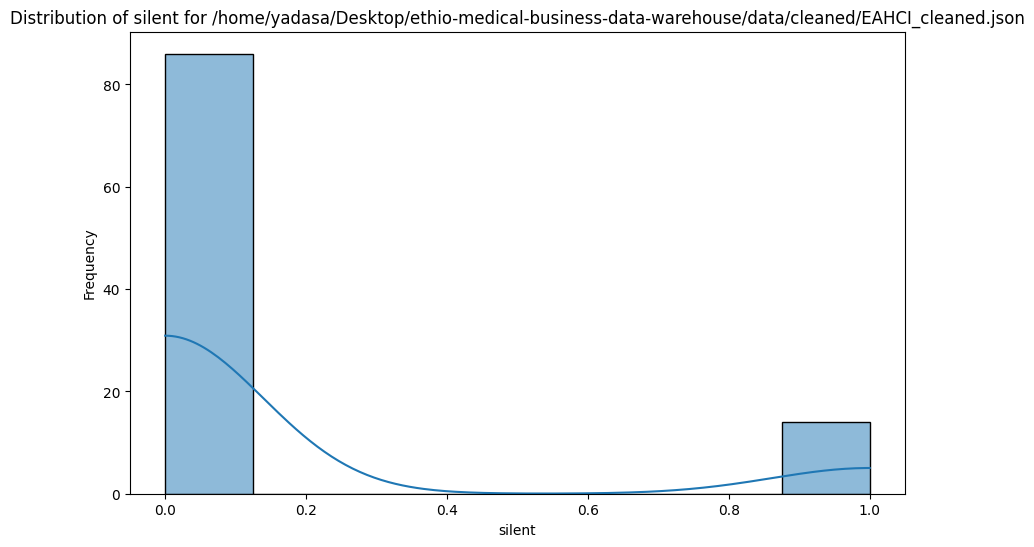

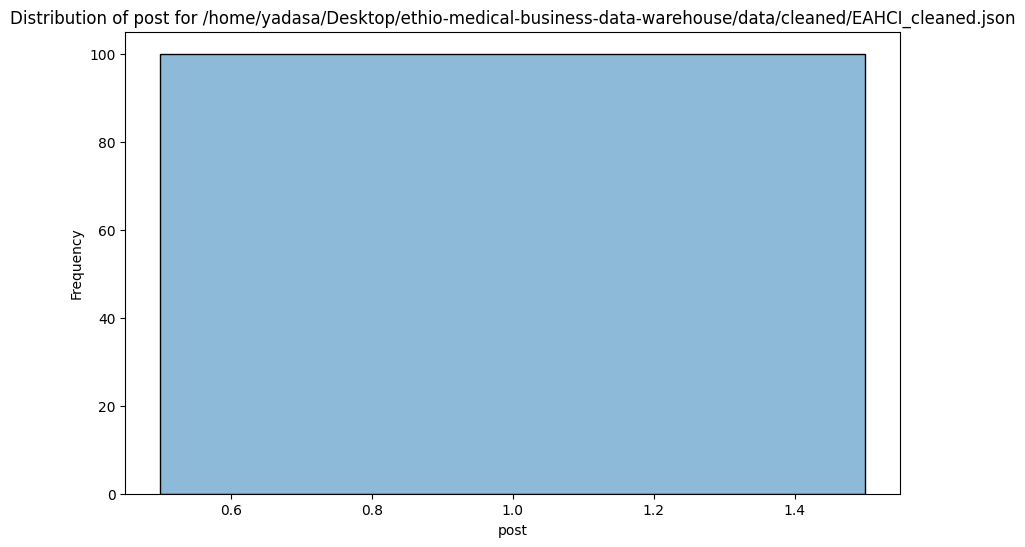

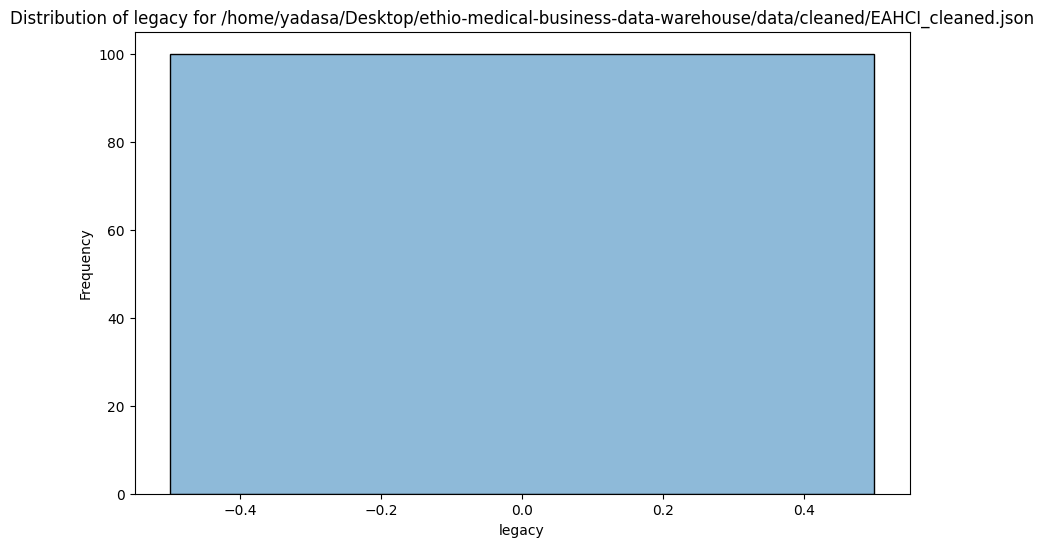

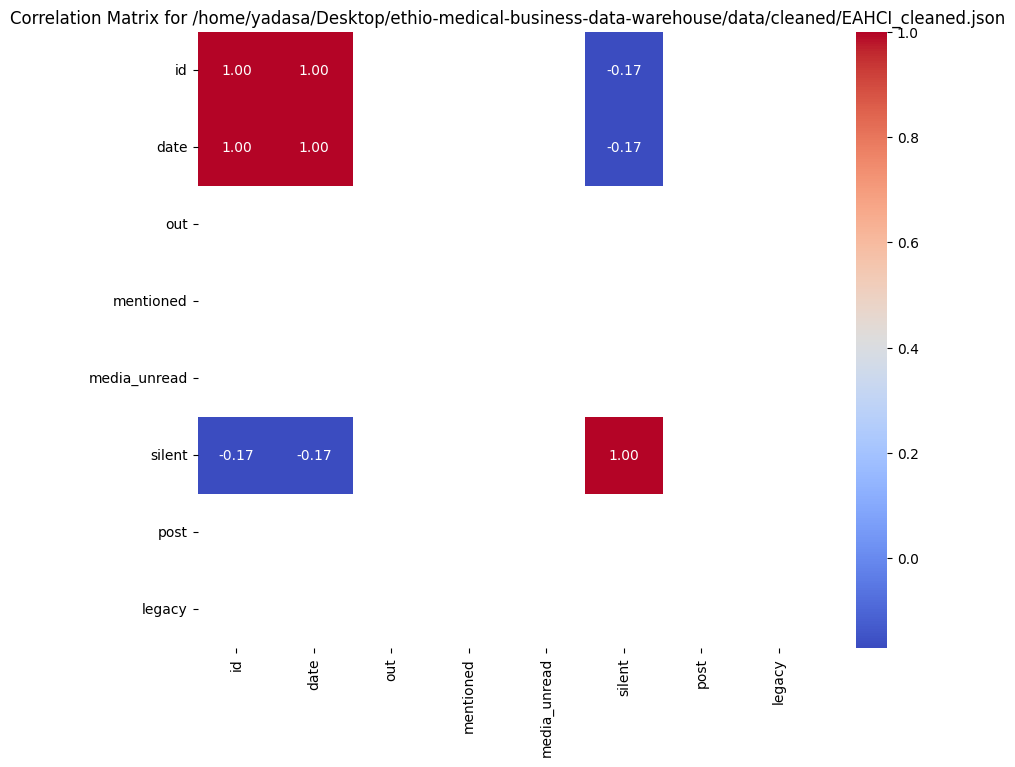

Column 'image' not found in the DataFrame.
Data Information for /home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/raw/lobelia4cosmetics.json :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         100 non-null    int64 
 1   date       100 non-null    object
 2   text       100 non-null    object
 3   sender_id  100 non-null    int64 
 4   views      100 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.0+ KB
None

Summary Statistics for /home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/raw/lobelia4cosmetics.json :
                id     sender_id        views
count   100.000000  1.000000e+02   100.000000
mean   9381.660000 -1.001666e+12  1070.240000
std      30.113999  0.000000e+00   437.365463
min    9328.000000 -1.001666e+12   371.000000
25%    9356.750000 -1.001666e+12   782.500000
50%    9382.500000 

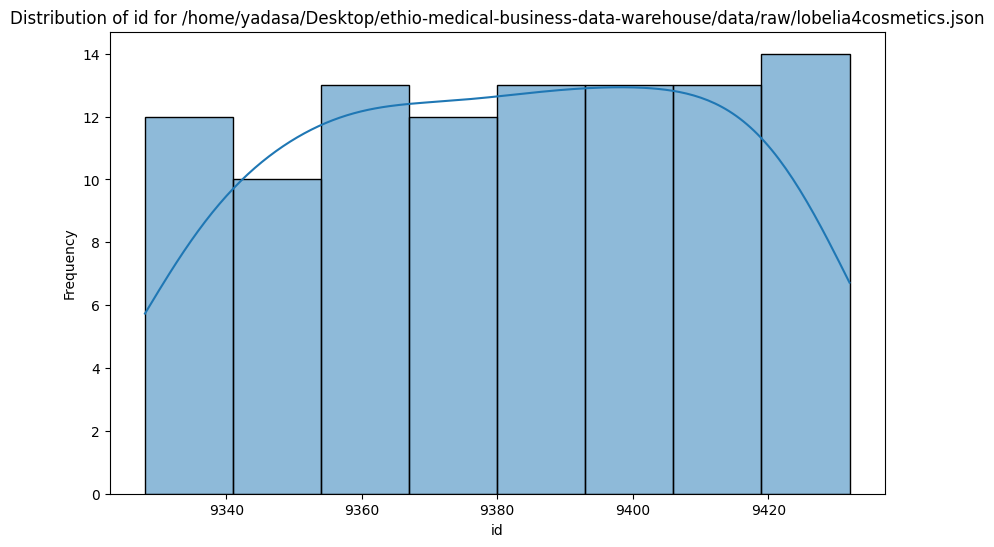

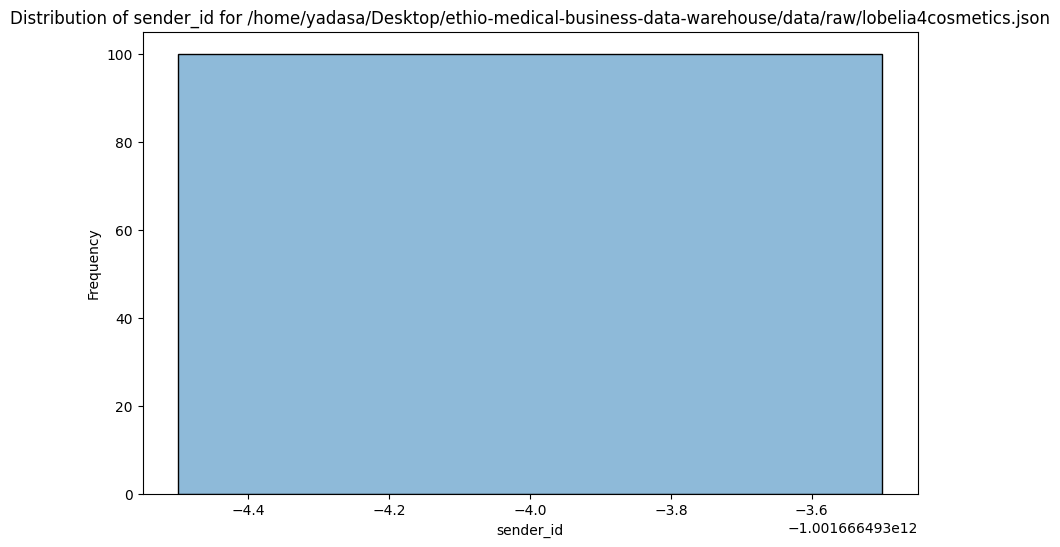

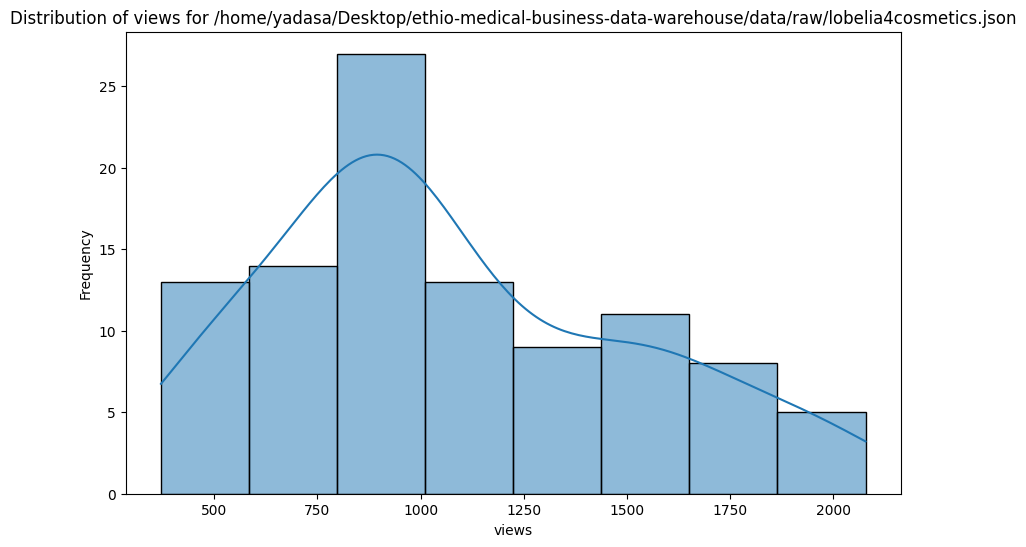

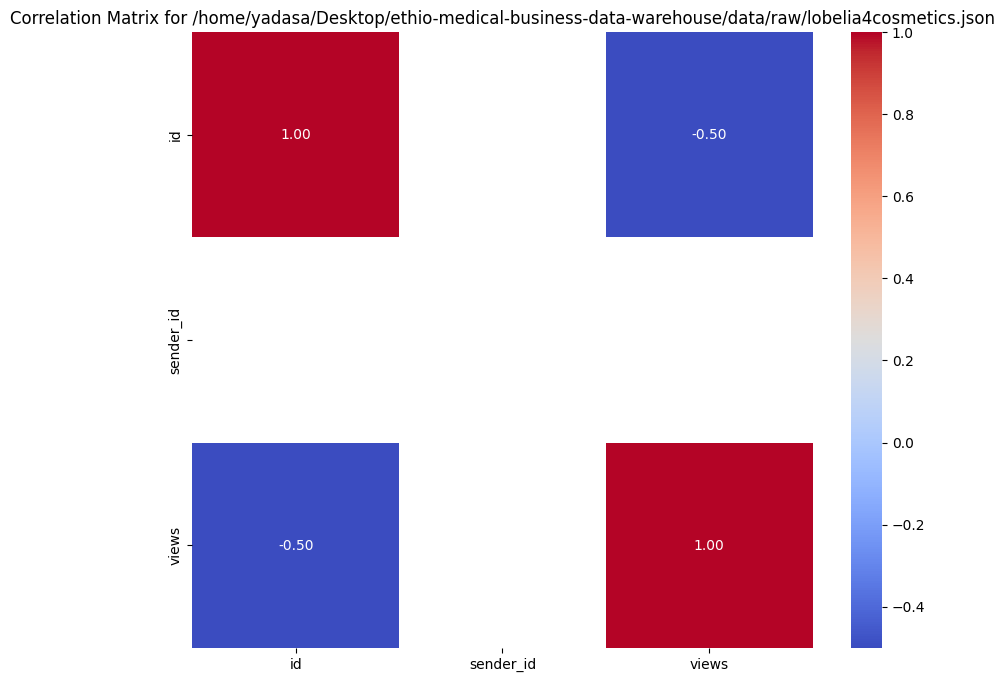

Column 'image' not found in the DataFrame.
Data Information for /home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/raw/yetenaweg.json :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _                        100 non-null    object 
 1   id                       100 non-null    int64  
 2   peer_id                  100 non-null    object 
 3   date                     100 non-null    object 
 4   action                   25 non-null     object 
 5   out                      100 non-null    bool   
 6   mentioned                100 non-null    bool   
 7   media_unread             100 non-null    bool   
 8   silent                   100 non-null    bool   
 9   post                     100 non-null    bool   
 10  legacy                   100 non-null    bool   
 11  from_id                  0 non-null     

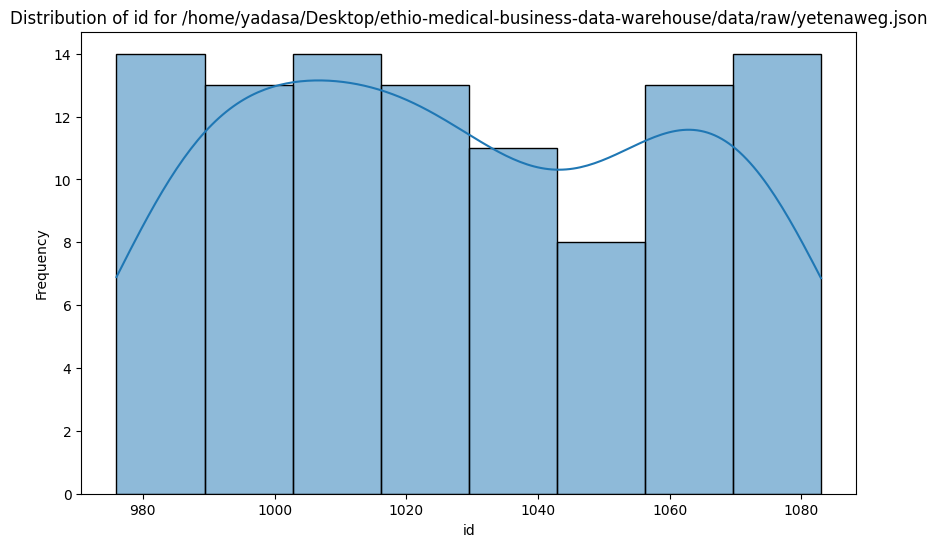

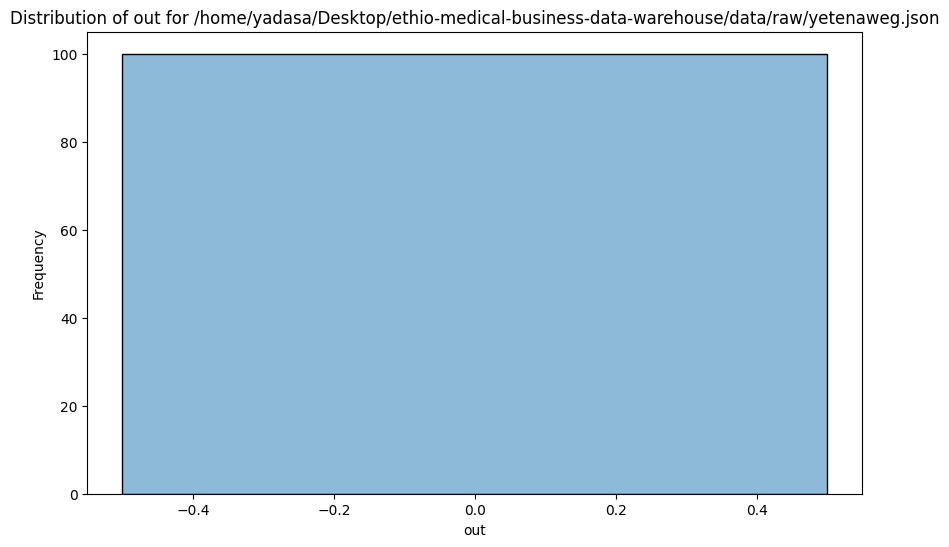

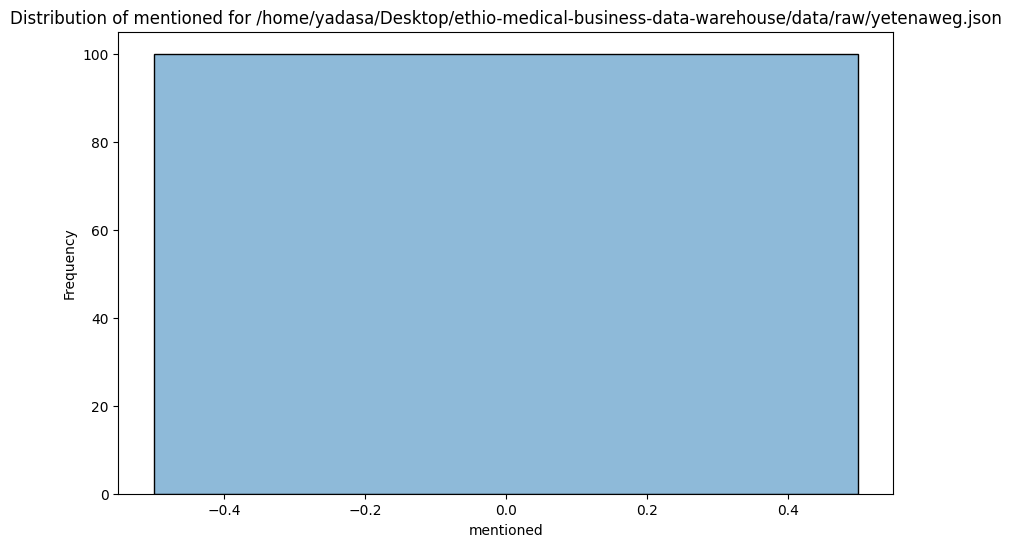

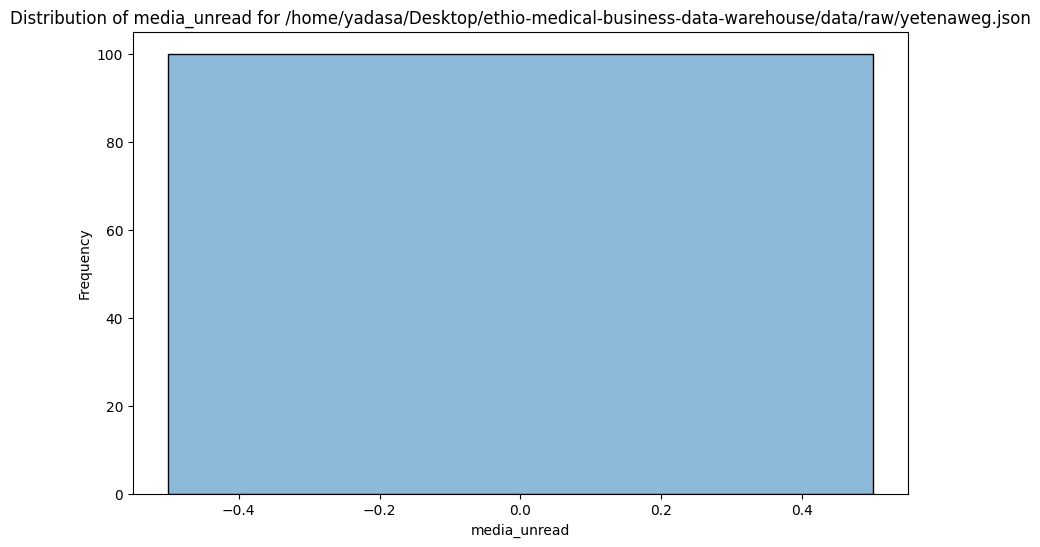

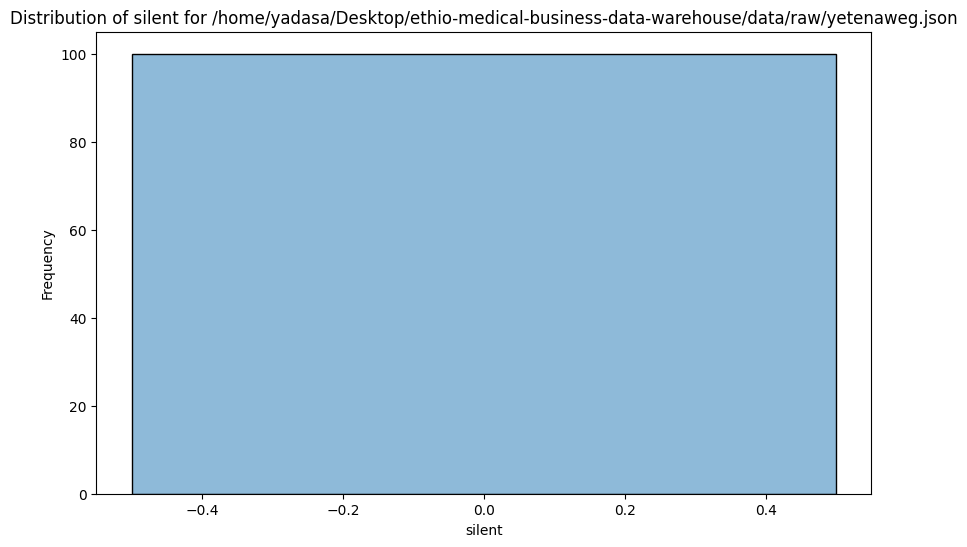

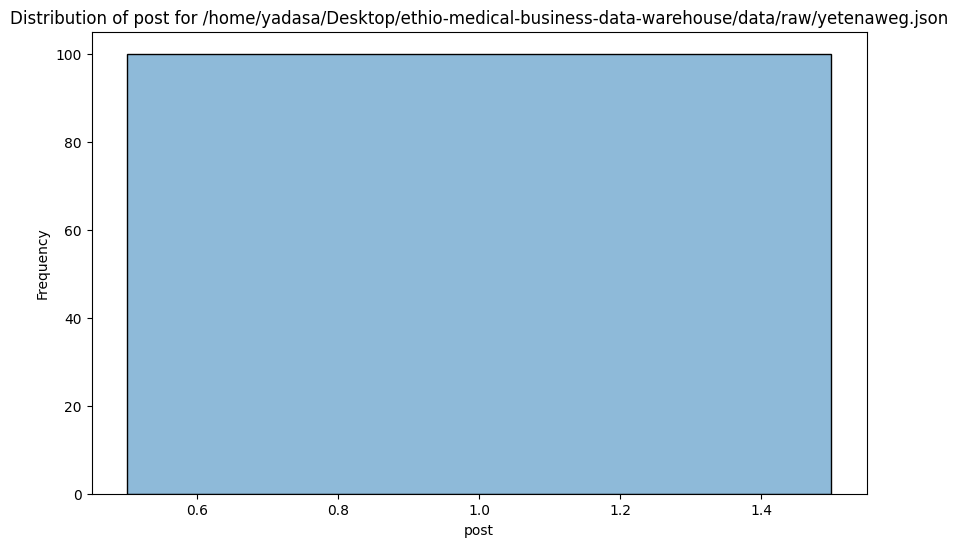

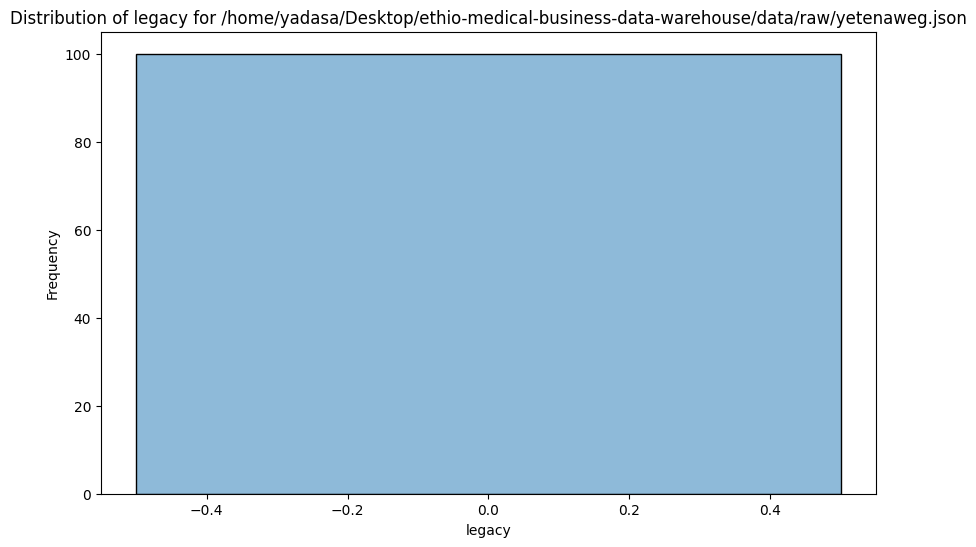

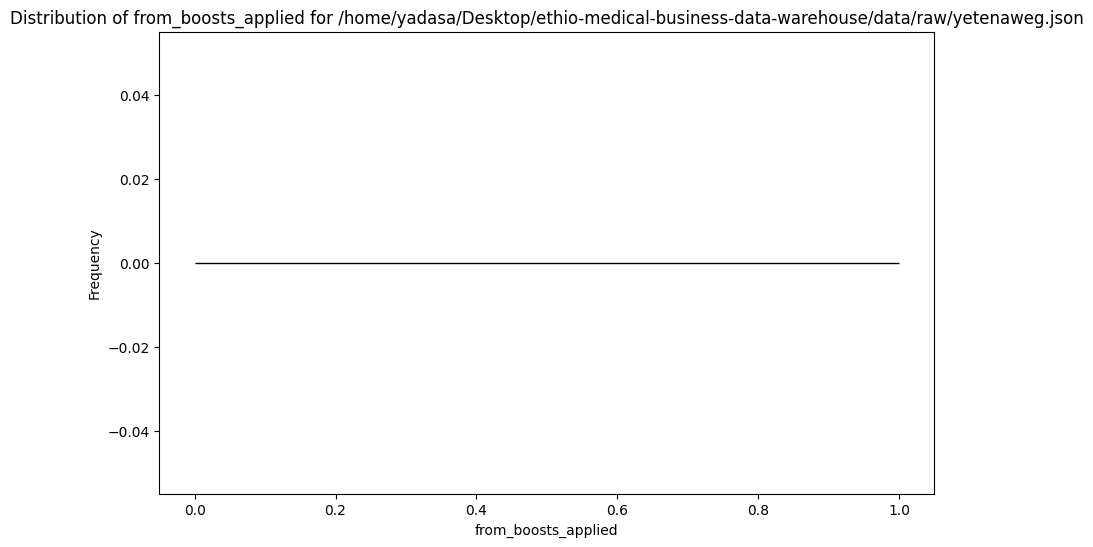

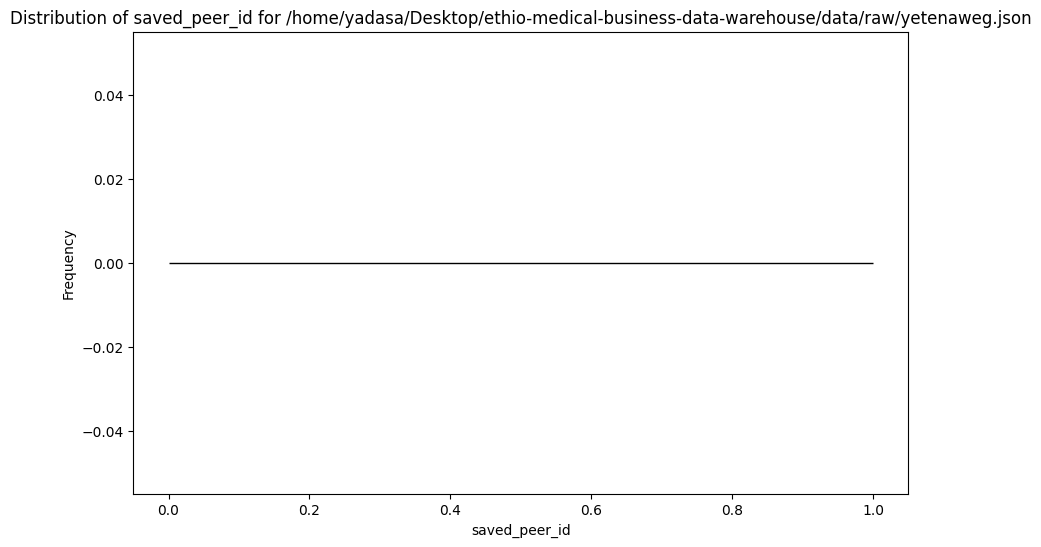

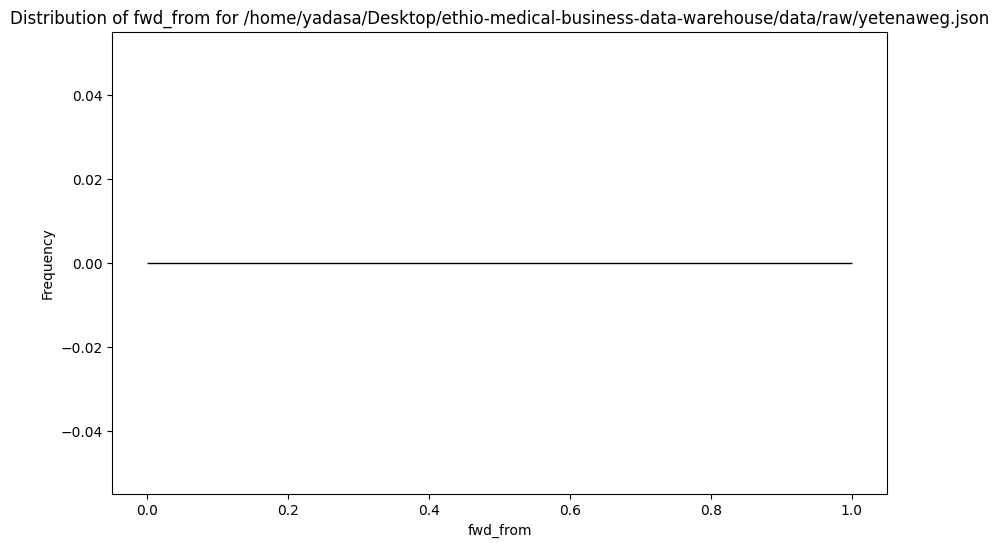

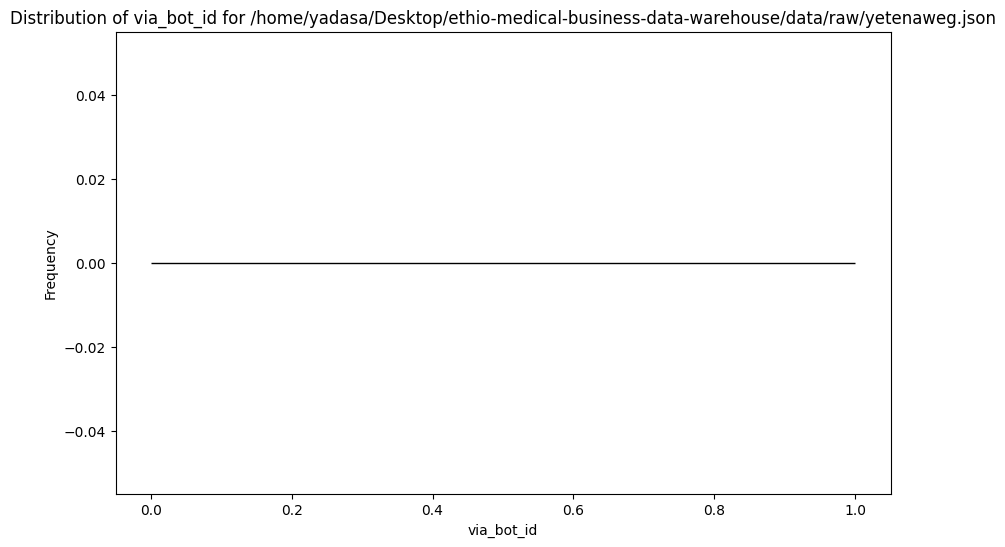

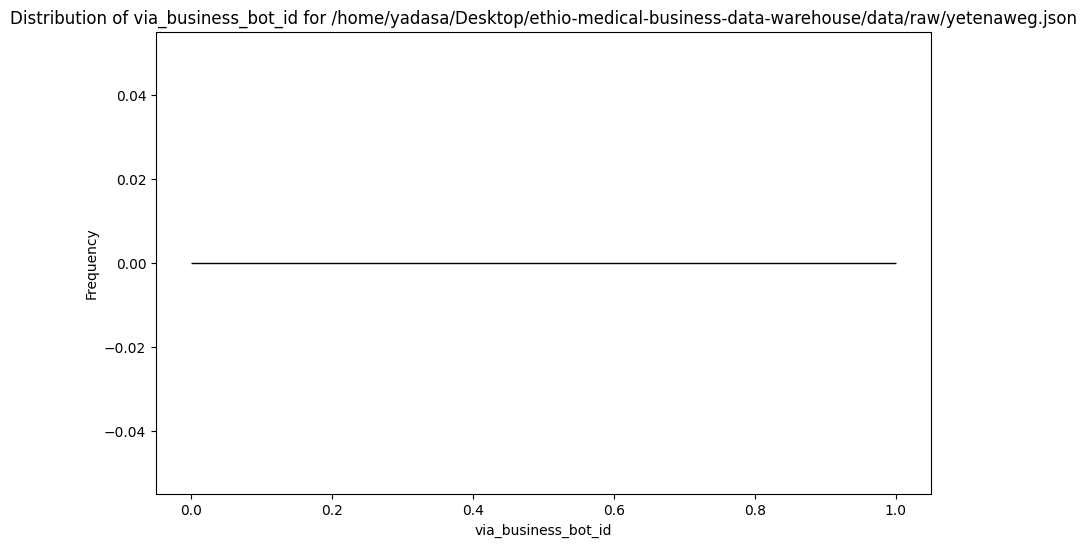

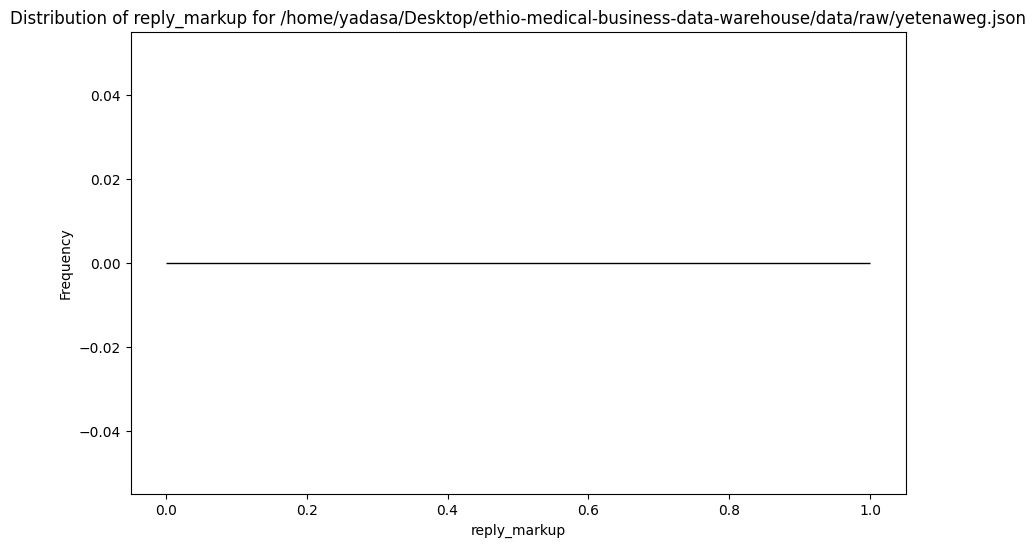

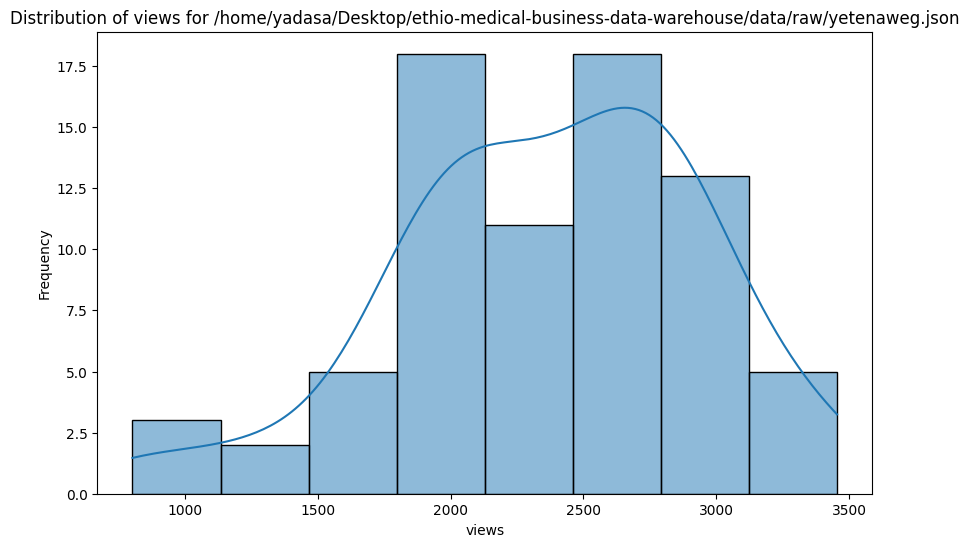

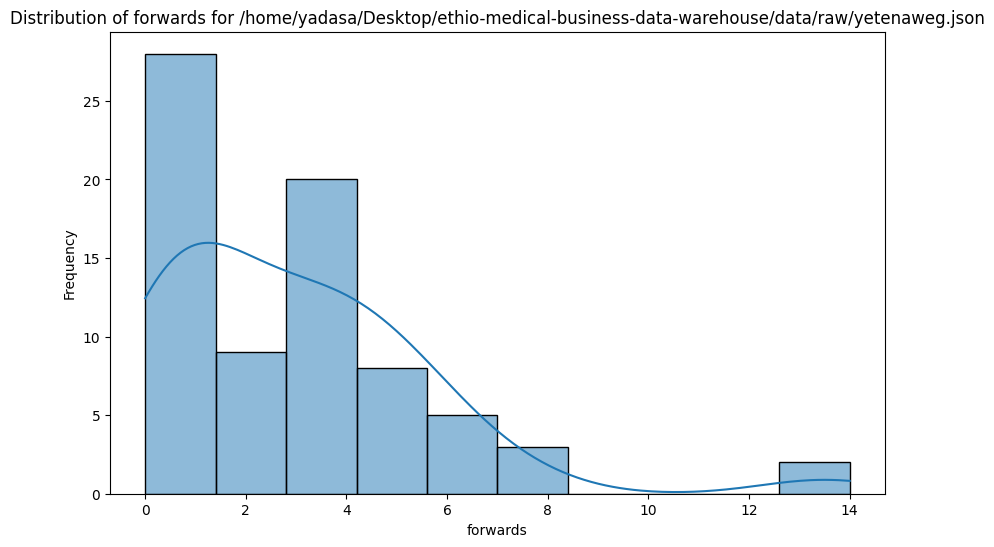

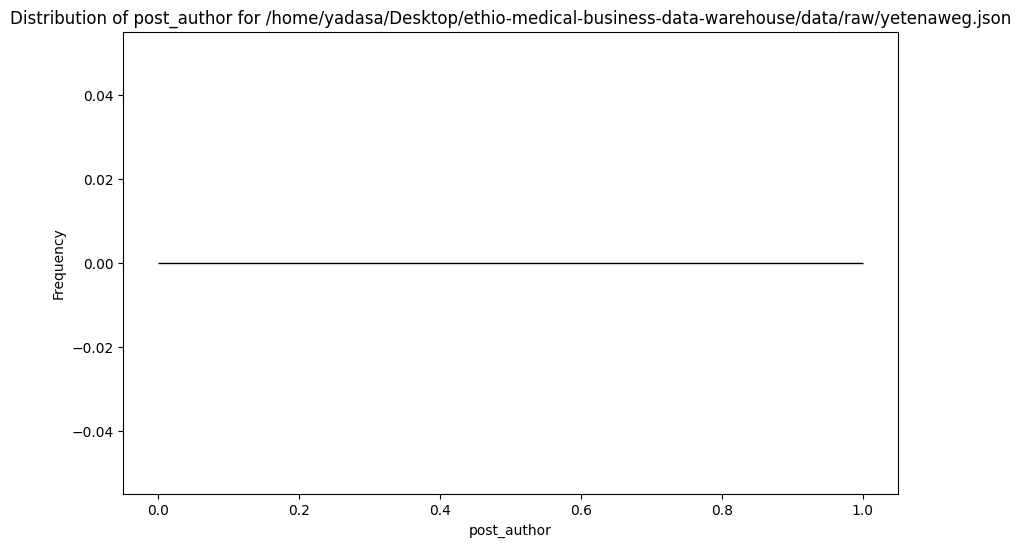

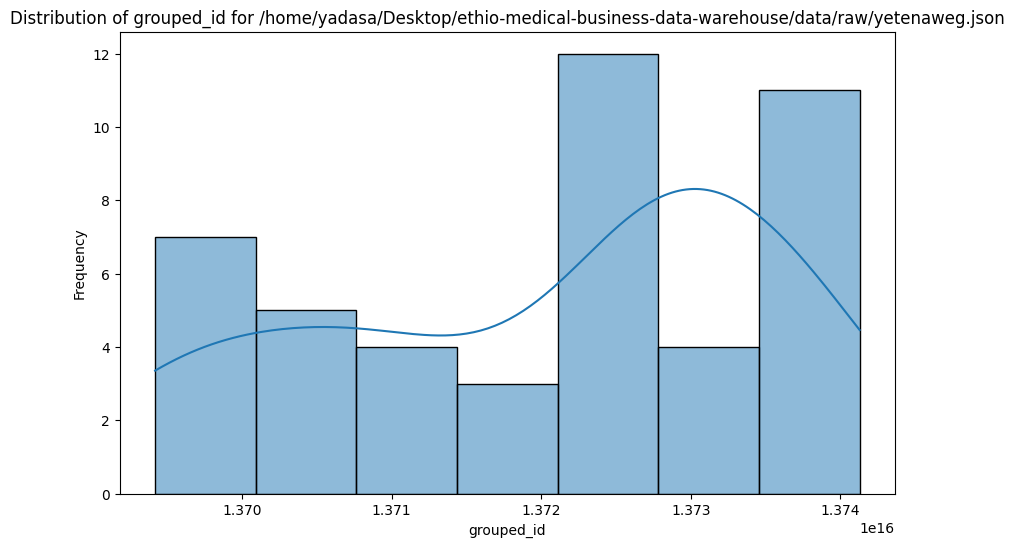

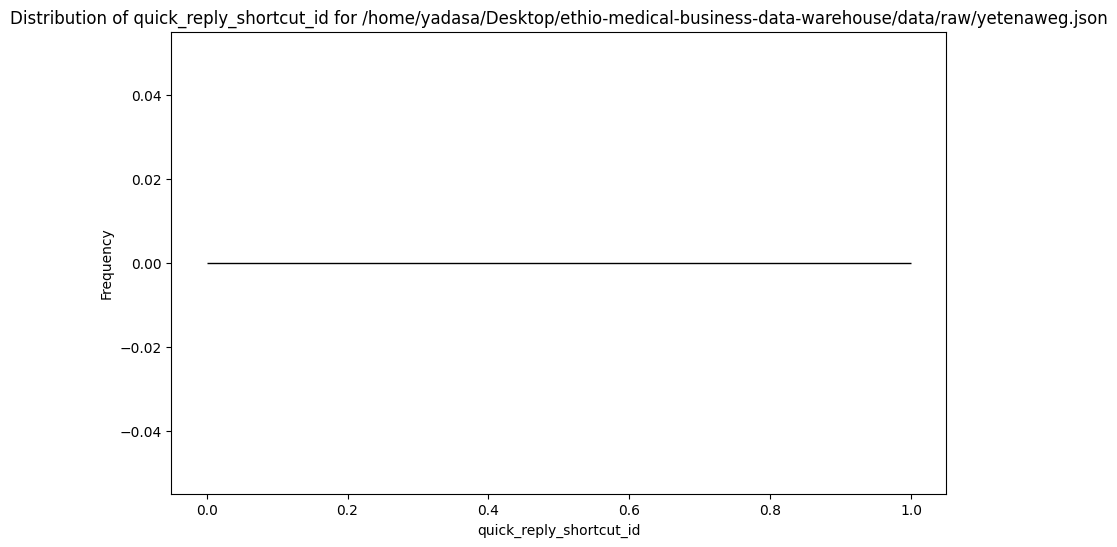

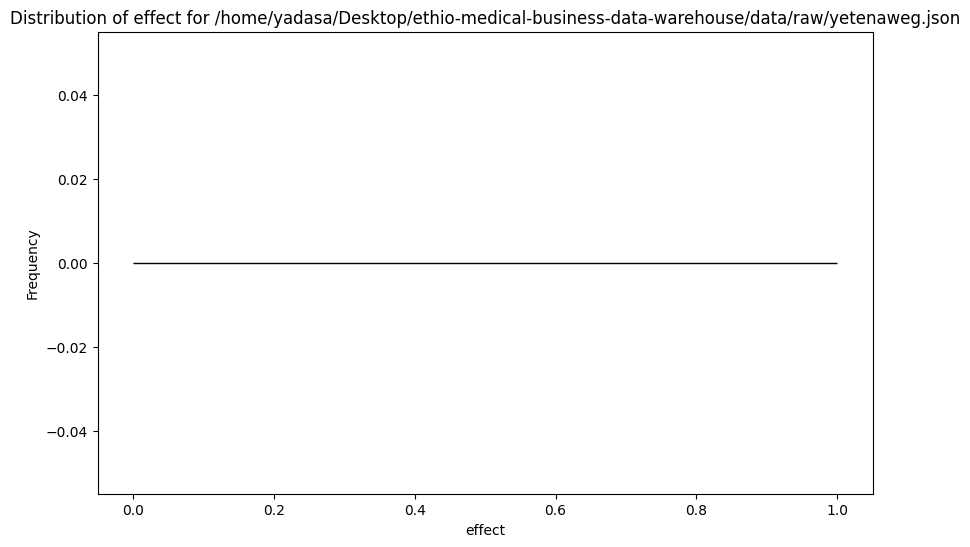

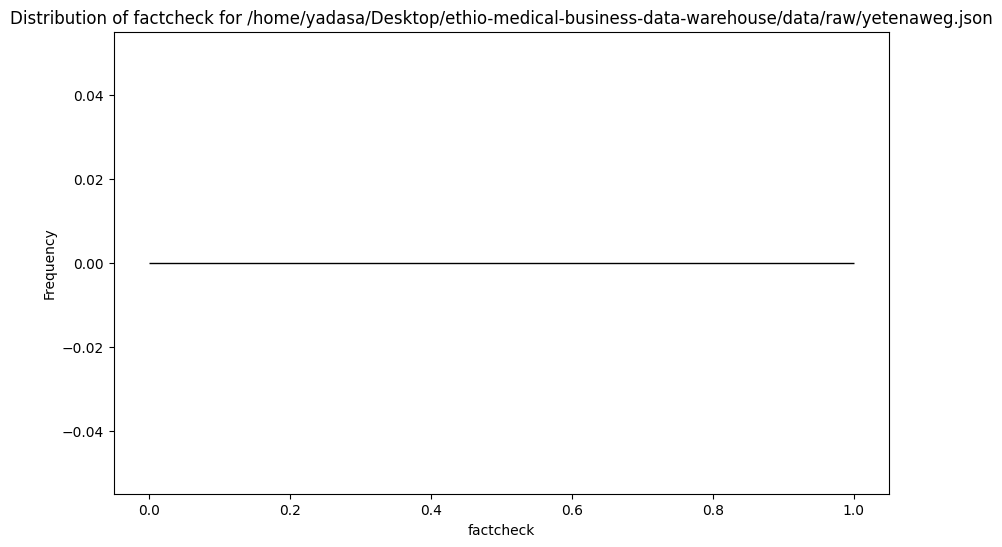

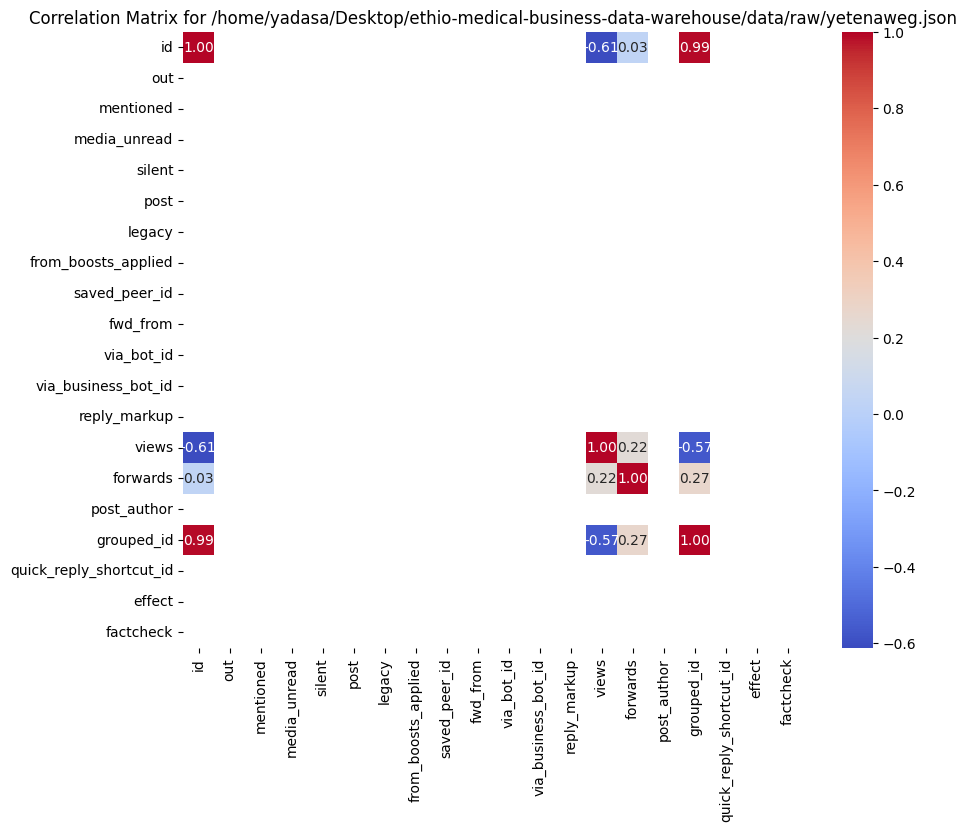

Column 'image' not found in the DataFrame.


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import cv2
import os

# Function to perform EDA on a JSON file
def perform_eda(json_file):
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)

    df = pd.DataFrame(data)

    # Display basic information about the dataset
    print("Data Information for", json_file, ":")
    print(df.info())

    # Summary statistics
    print("\nSummary Statistics for", json_file, ":")
    print(df.describe())

    # Distribution of numerical variables
    num_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
    for col in num_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Distribution of {col} for {json_file}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    # Correlation matrix for numerical variables only
    if len(num_cols) > 1:
        numerical_df = df[num_cols]
        plt.figure(figsize=(10, 8))
        sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix for ' + json_file)
        plt.show()
    else:
        print("Insufficient numerical columns for correlation analysis in", json_file)

    # Image analysis
    image_folder = 'image_folder'
    if 'image' in df.columns:
        sample_images = df['image'].sample(5).tolist()
        display_images(sample_images)
    else:
        print("Column 'image' not found in the DataFrame.")


# Function to display sample images
def display_images(images, num_images=5):
    plt.figure(figsize=(15, 8))
    for i in range(min(num_images, len(images))):
        img = cv2.imread(os.path.join(image_folder, images[i]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, min(num_images, len(images)), i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# List of JSON files
json_files = ['/home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/raw/EAHCI.json', '/home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/EAHCI_cleaned.json', '/home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/raw/lobelia4cosmetics.json', '/home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/raw/yetenaweg.json']

# Perform EDA on each JSON file
for file in json_files:
    perform_eda(file)


Data Information for /home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/DoctorsET_cleaned.json :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   _                        100 non-null    object
 1   id                       100 non-null    int64 
 2   peer_id                  100 non-null    object
 3   date                     100 non-null    int64 
 4   message                  100 non-null    object
 5   out                      100 non-null    bool  
 6   mentioned                100 non-null    bool  
 7   media_unread             100 non-null    bool  
 8   silent                   100 non-null    bool  
 9   post                     100 non-null    bool  
 10  from_scheduled           100 non-null    object
 11  legacy                   100 non-null    bool  
 12  edit_hide                100 no

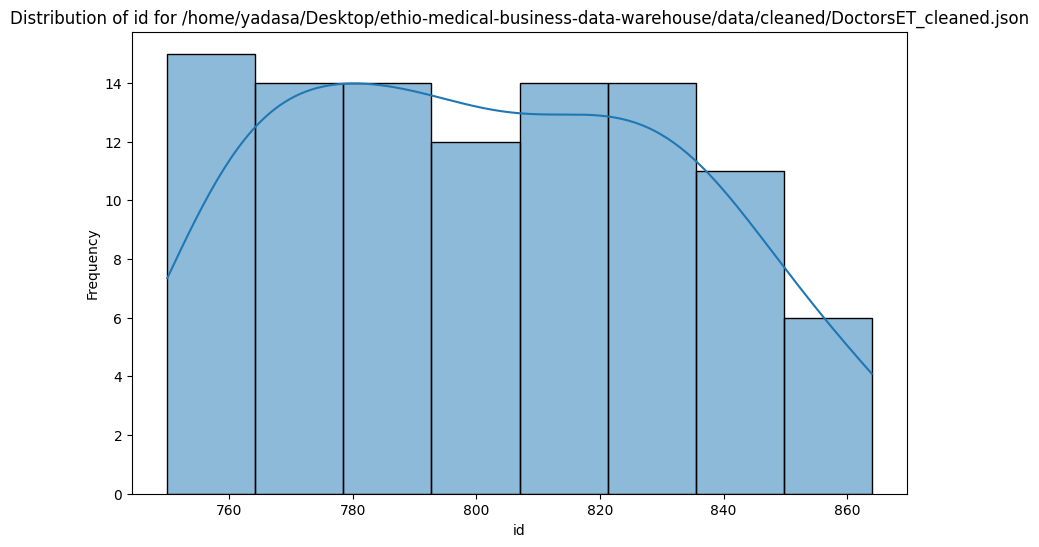

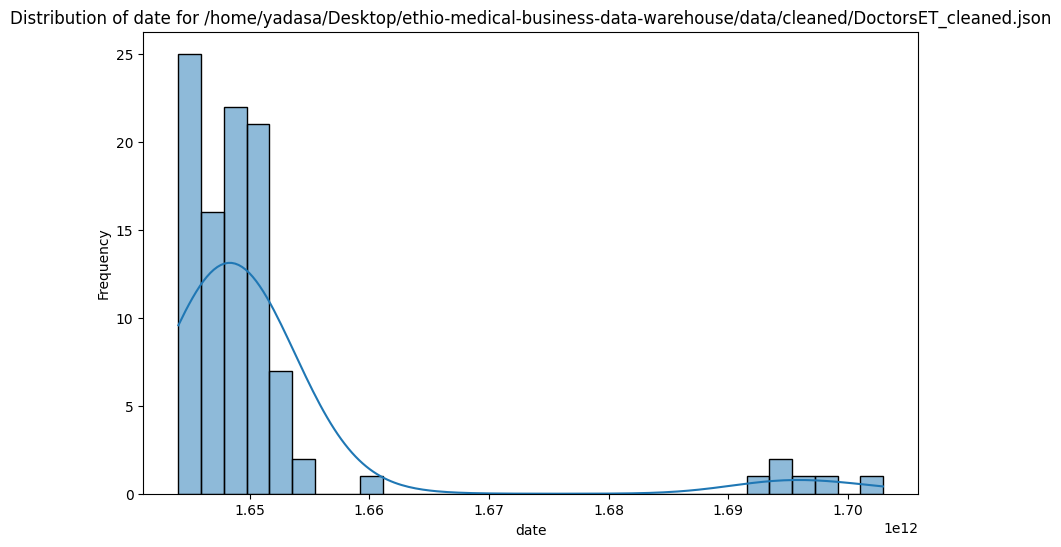

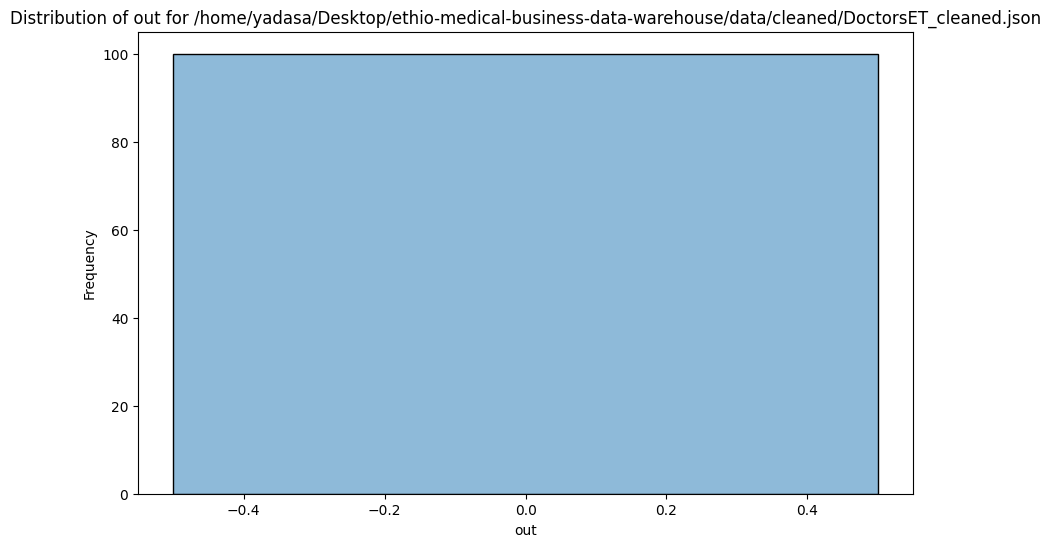

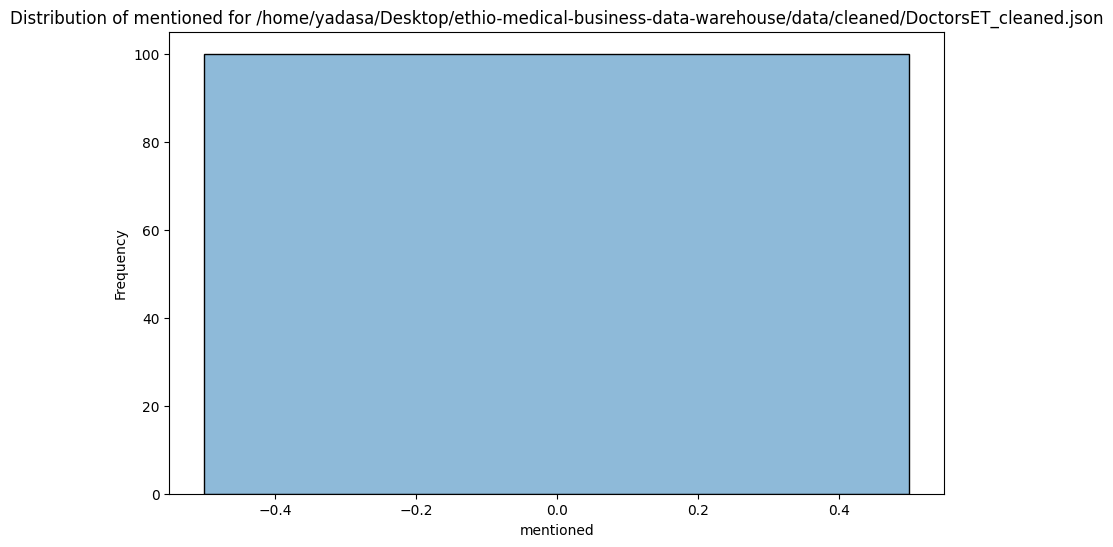

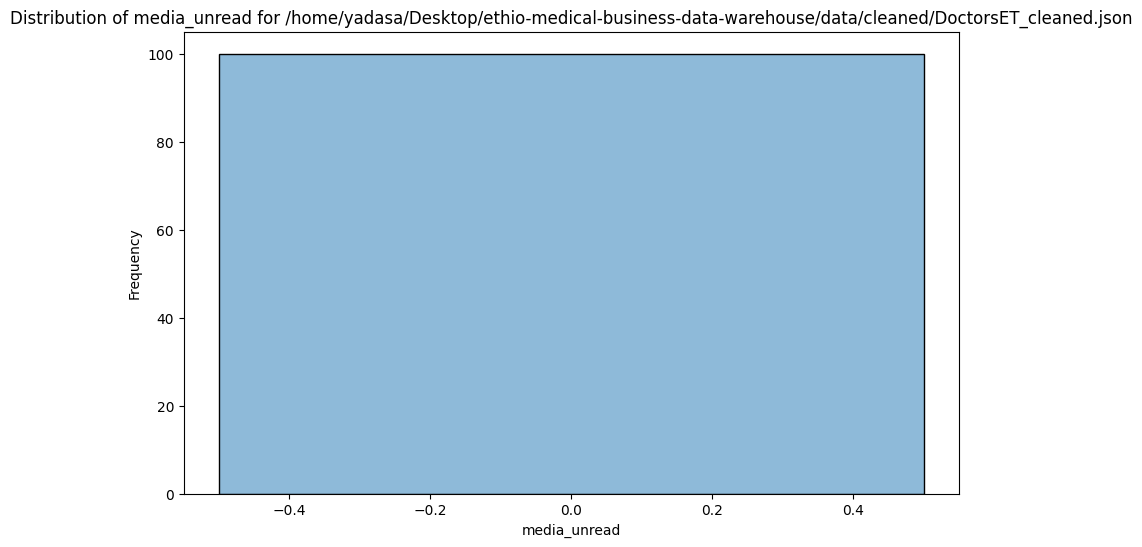

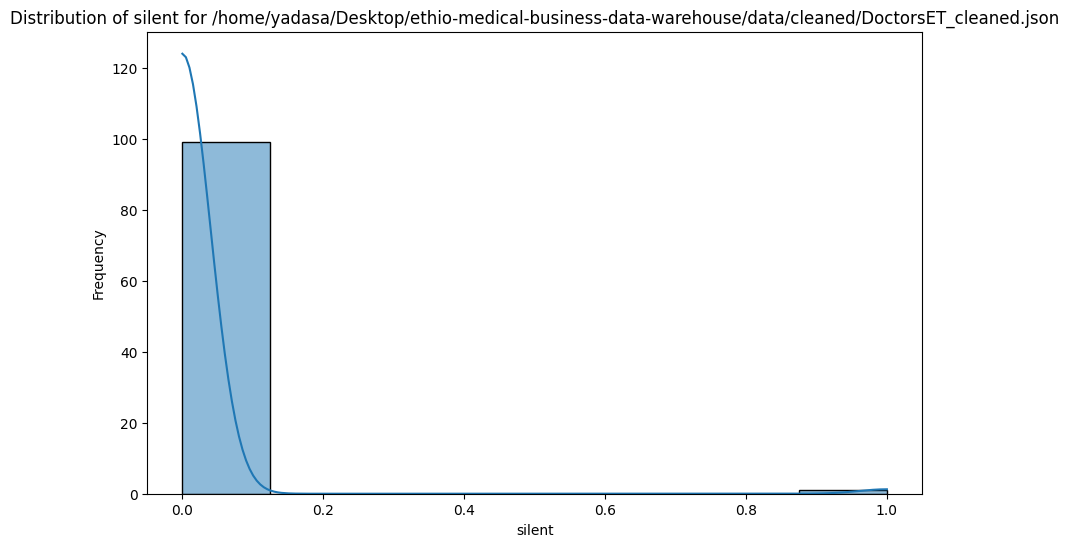

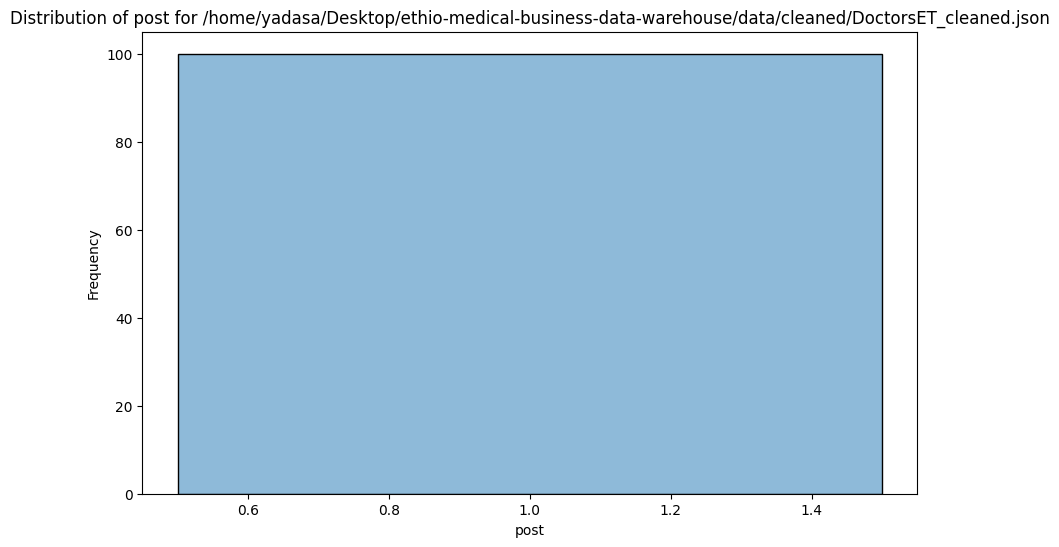

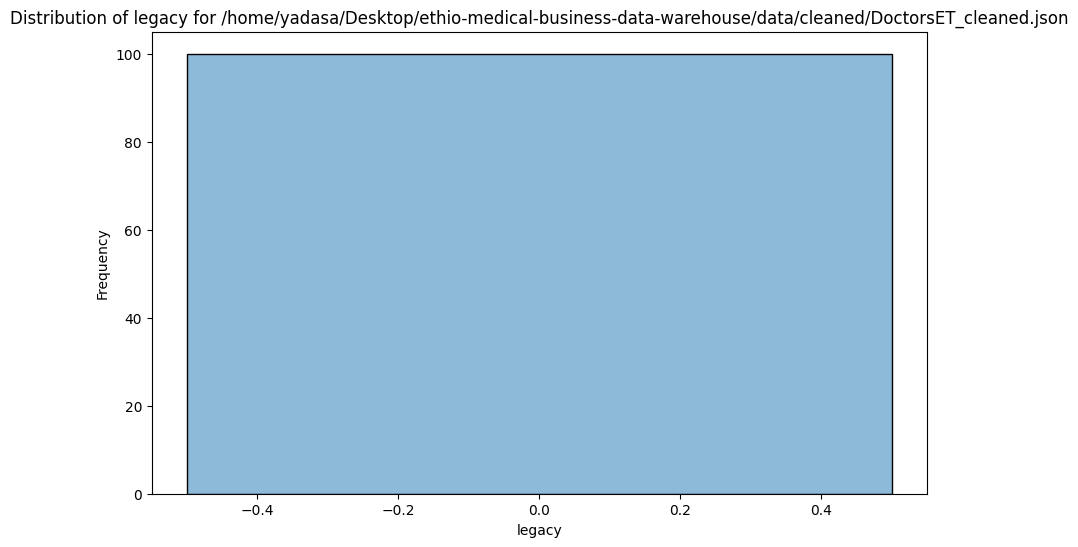

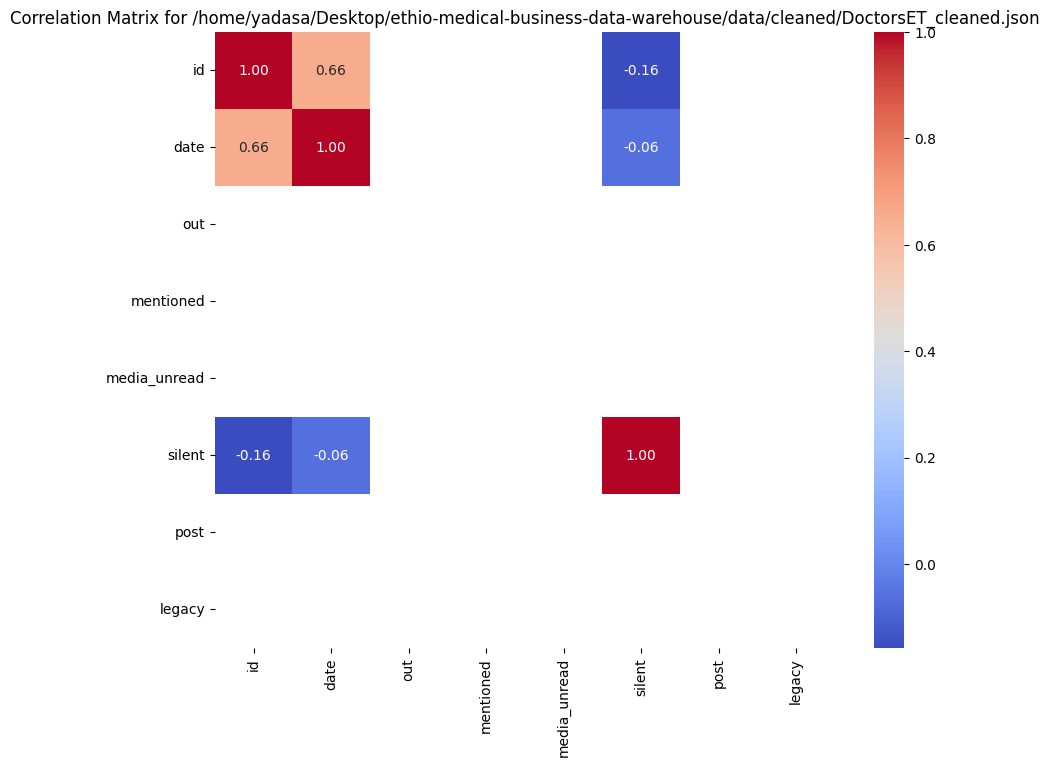

Column 'image' not found in the DataFrame.
Data Information for /home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/EAHCI_cleaned.json :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   _                        100 non-null    object
 1   id                       100 non-null    int64 
 2   peer_id                  100 non-null    object
 3   date                     100 non-null    int64 
 4   message                  100 non-null    object
 5   out                      100 non-null    bool  
 6   mentioned                100 non-null    bool  
 7   media_unread             100 non-null    bool  
 8   silent                   100 non-null    bool  
 9   post                     100 non-null    bool  
 10  from_scheduled           100 non-null    object
 11  legacy                   100 non-null    bool

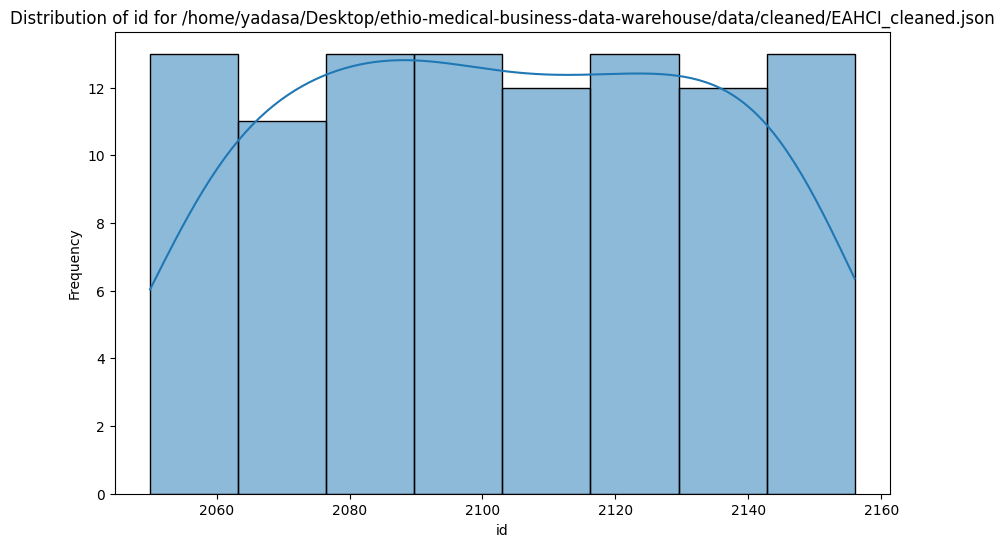

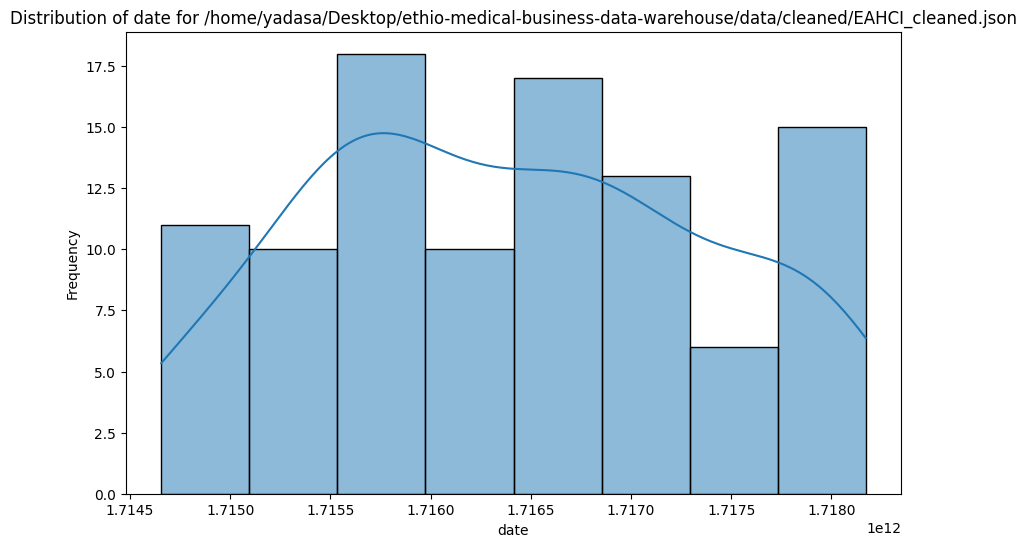

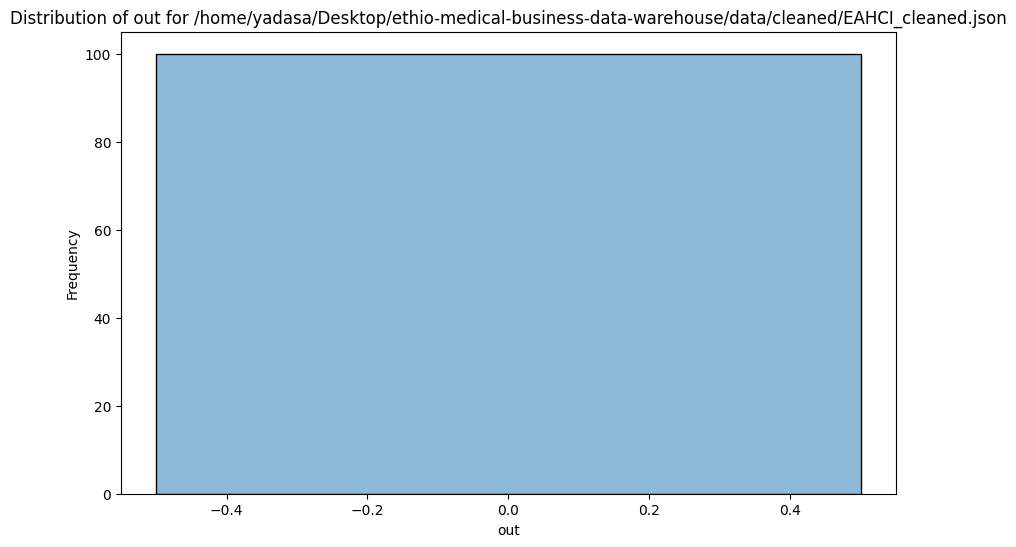

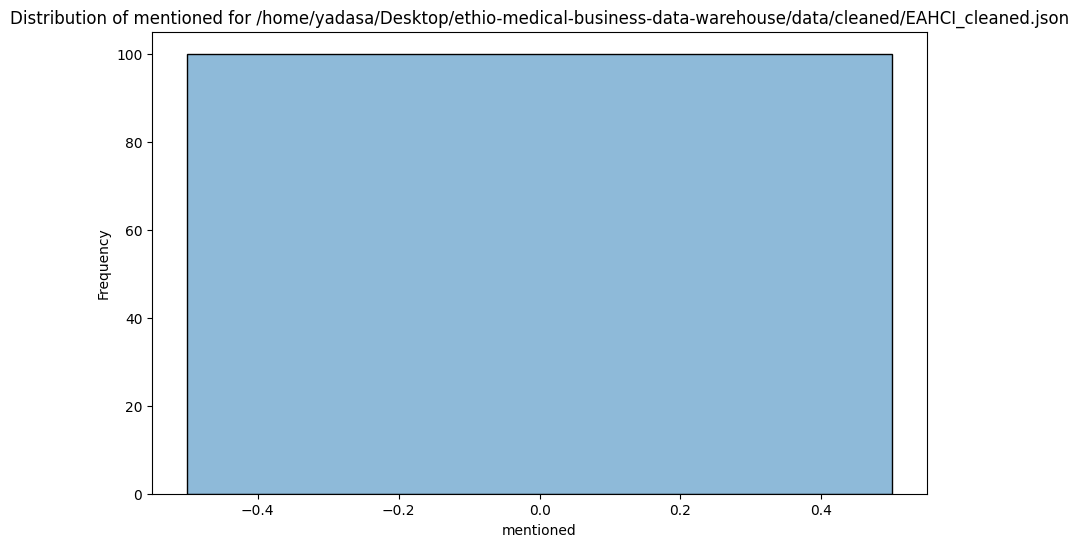

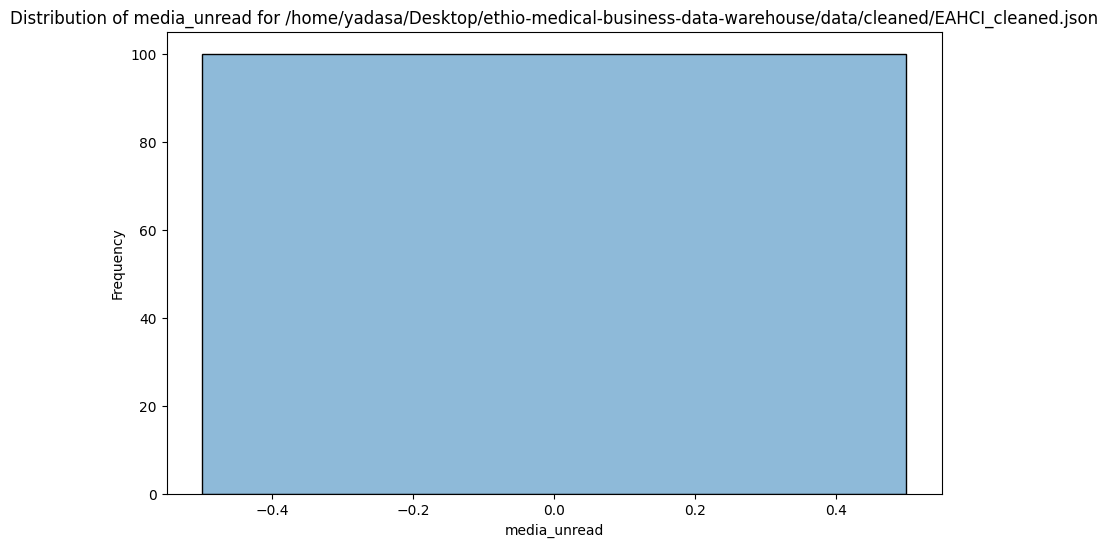

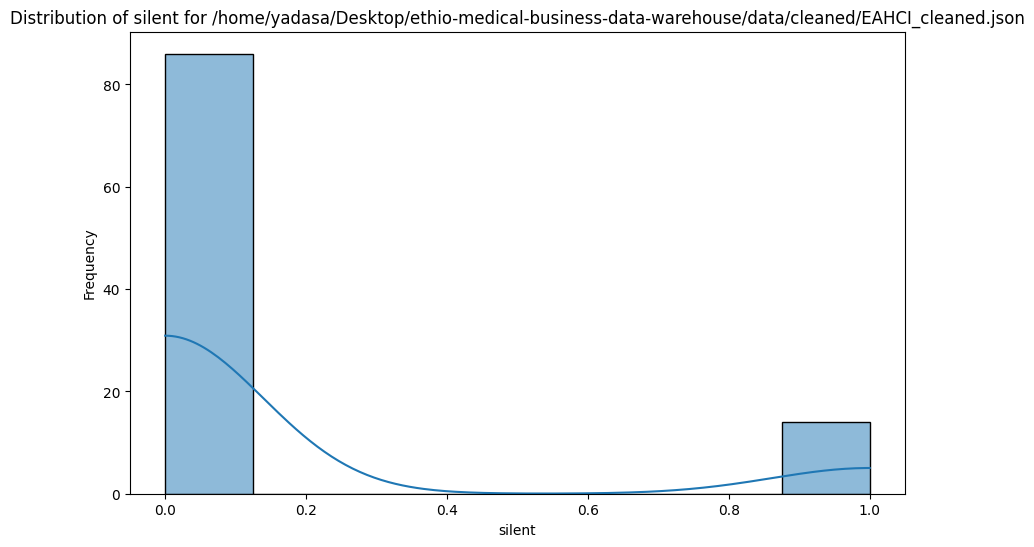

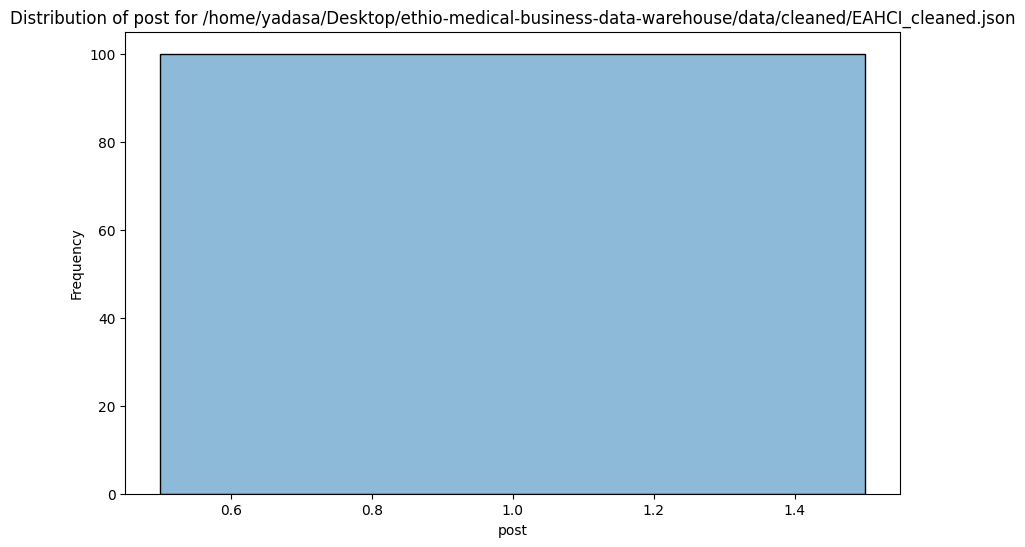

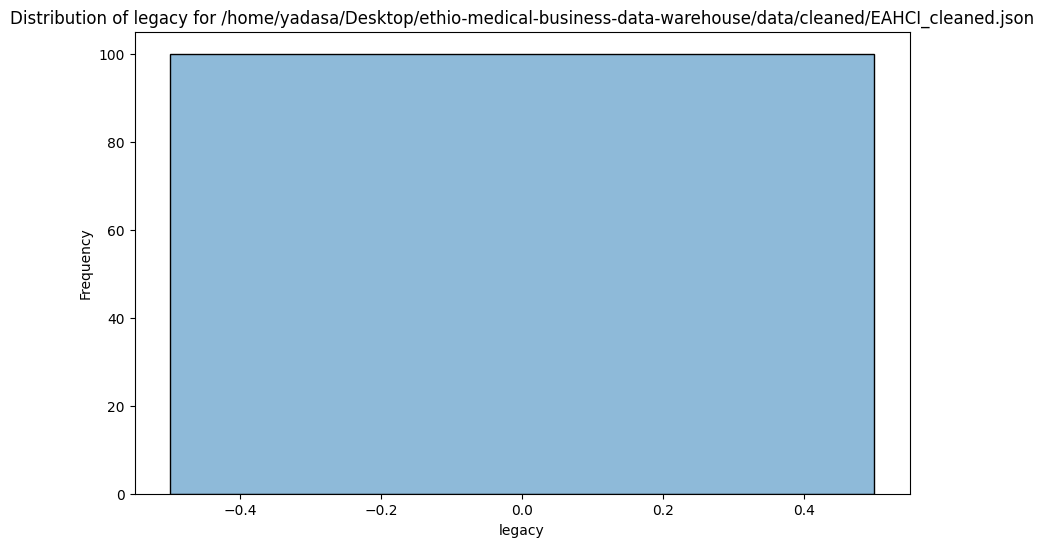

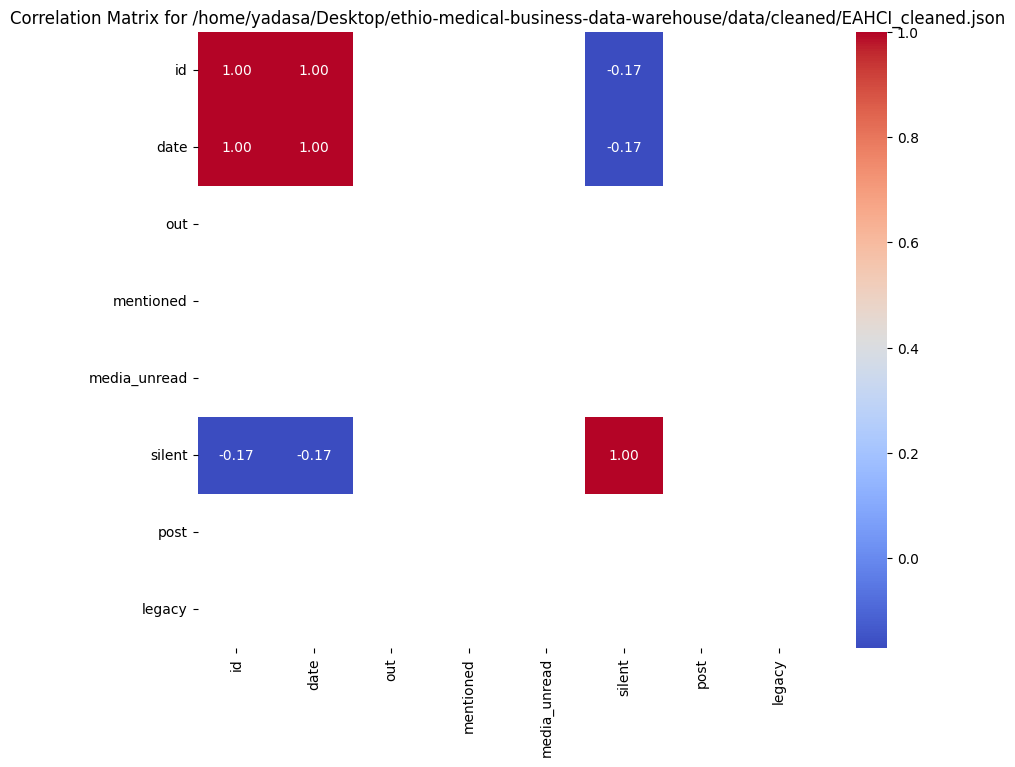

Column 'image' not found in the DataFrame.
Data Information for /home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/lobelia4cosmetics_cleaned.json :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         100 non-null    int64 
 1   date       100 non-null    int64 
 2   text       100 non-null    object
 3   sender_id  100 non-null    int64 
 4   views      100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB
None

Summary Statistics for /home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/lobelia4cosmetics_cleaned.json :
                id          date     sender_id        views
count   100.000000  1.000000e+02  1.000000e+02   100.000000
mean   9381.660000  1.717860e+12 -1.001666e+12  1070.240000
std      30.113999  1.972379e+08  0.000000e+00   437.365463
min    9328.000000  1.717515e+1

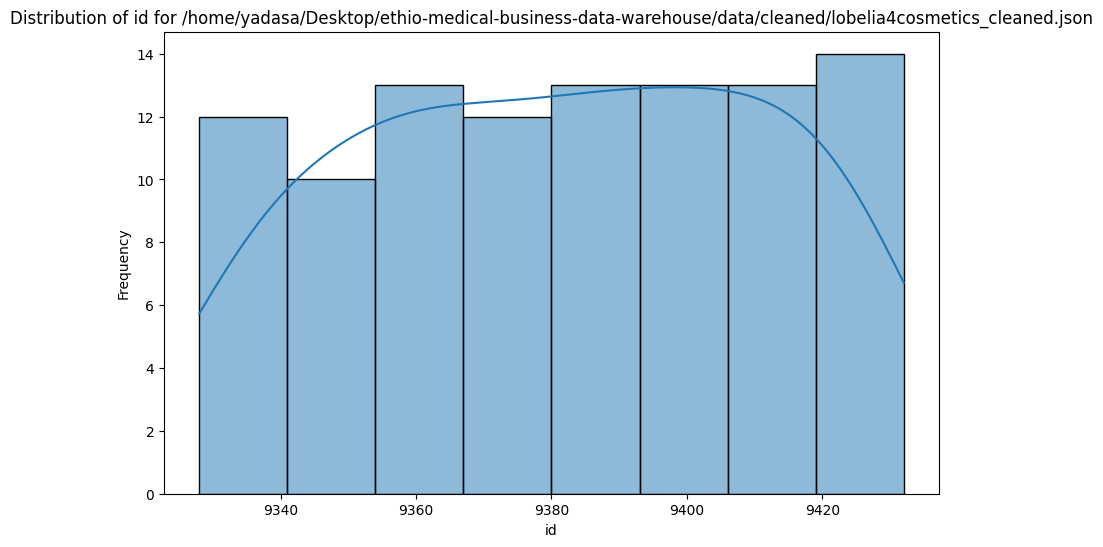

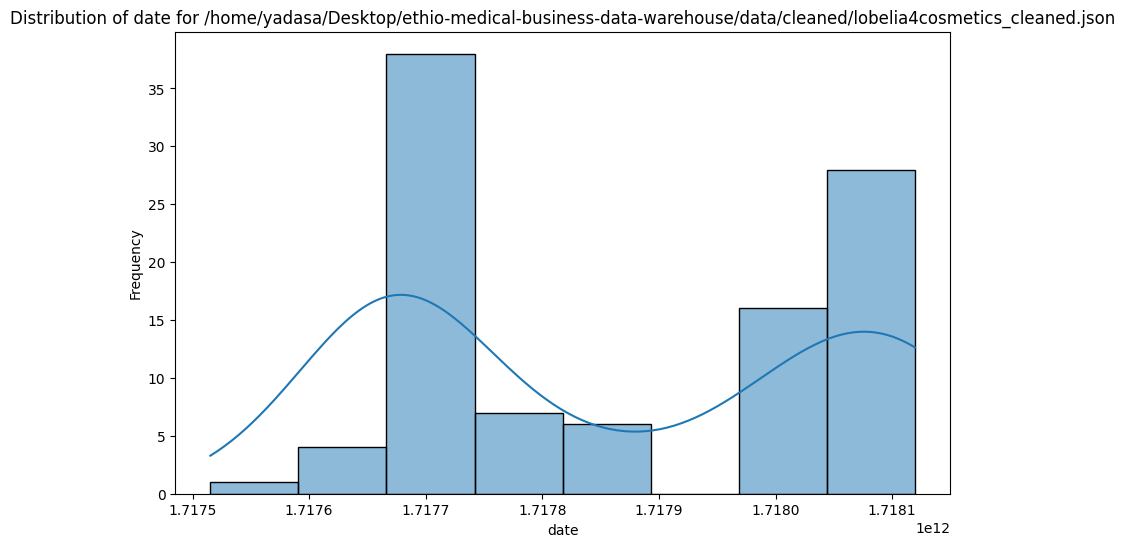

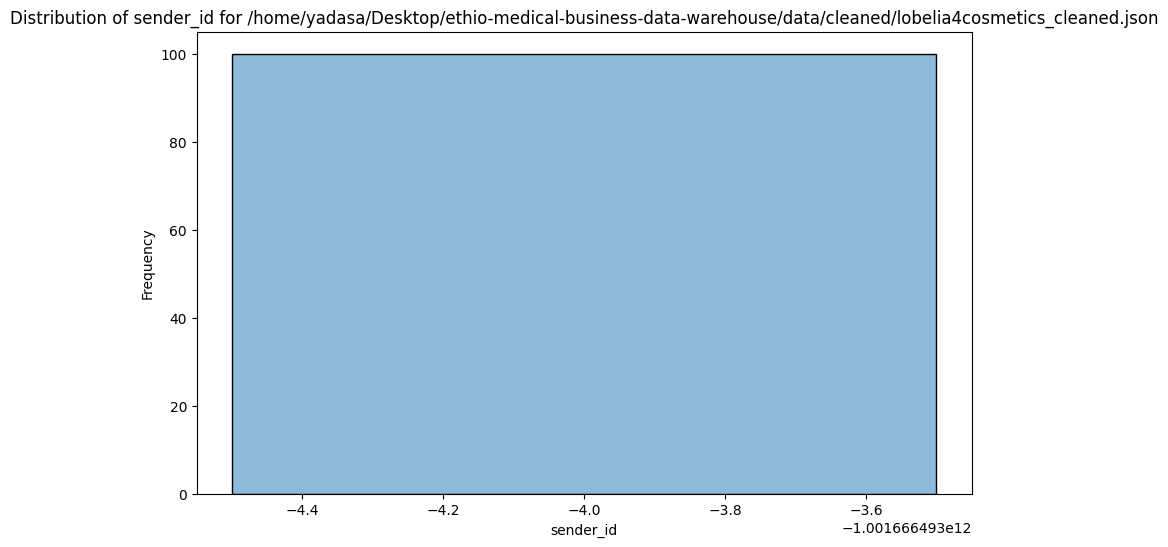

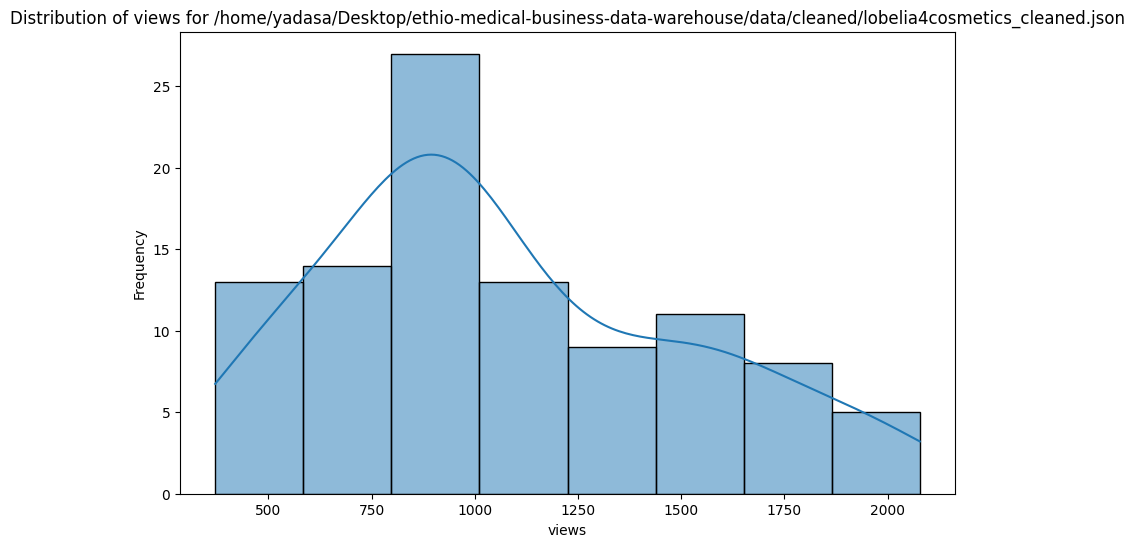

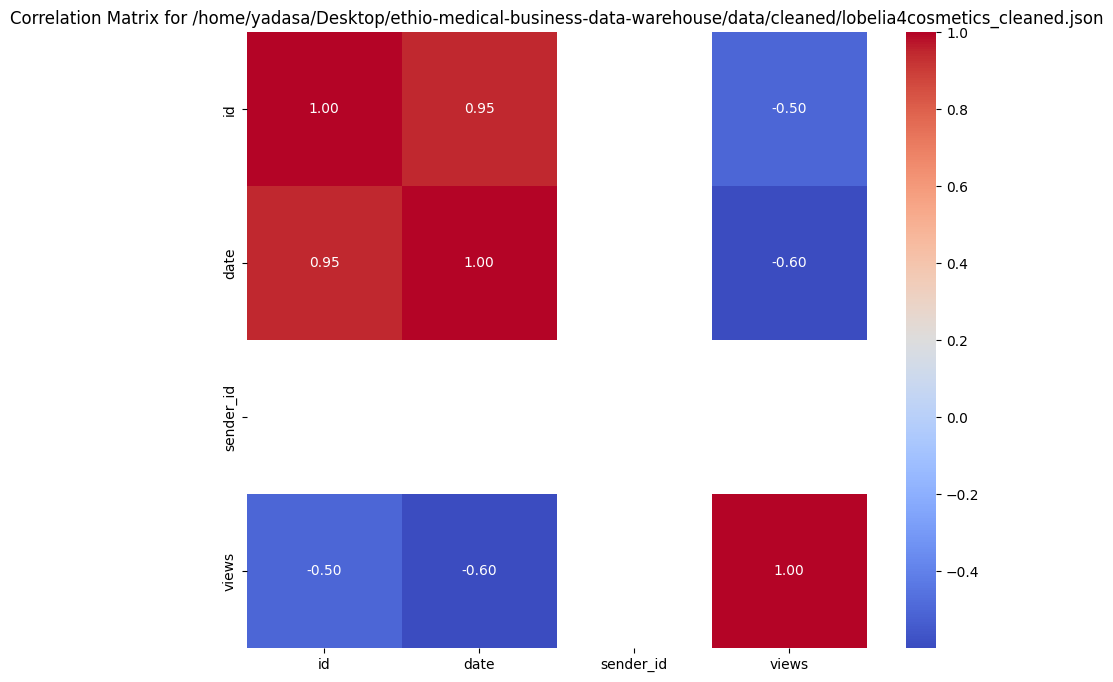

Column 'image' not found in the DataFrame.
Data Information for /home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/lobelia4cosmetics.json :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         100 non-null    int64 
 1   date       100 non-null    int64 
 2   text       100 non-null    object
 3   sender_id  100 non-null    int64 
 4   views      100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB
None

Summary Statistics for /home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/lobelia4cosmetics.json :
                id          date     sender_id        views
count   100.000000  1.000000e+02  1.000000e+02   100.000000
mean   9381.660000  1.717860e+12 -1.001666e+12  1070.240000
std      30.113999  1.972379e+08  0.000000e+00   437.365463
min    9328.000000  1.717515e+12 -1.001666e+12 

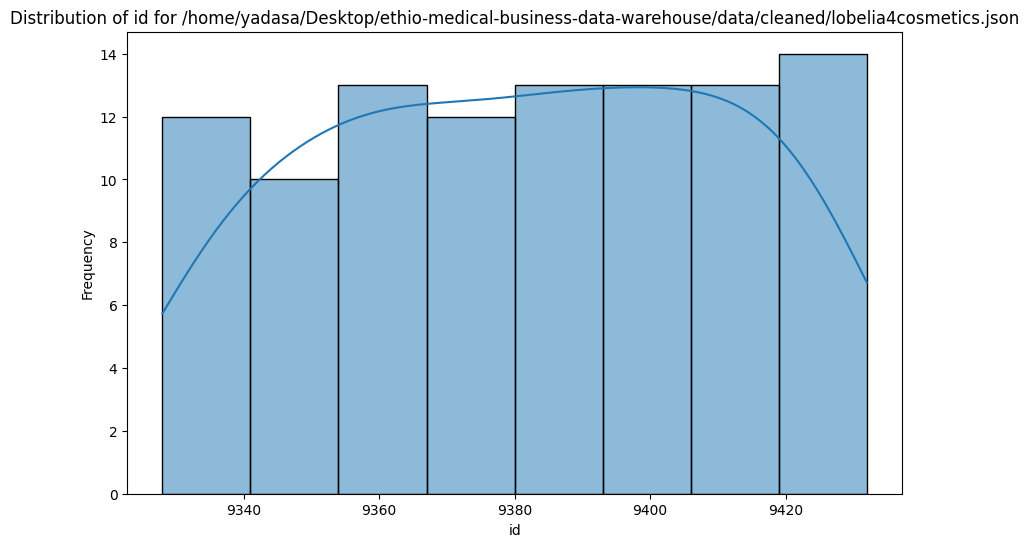

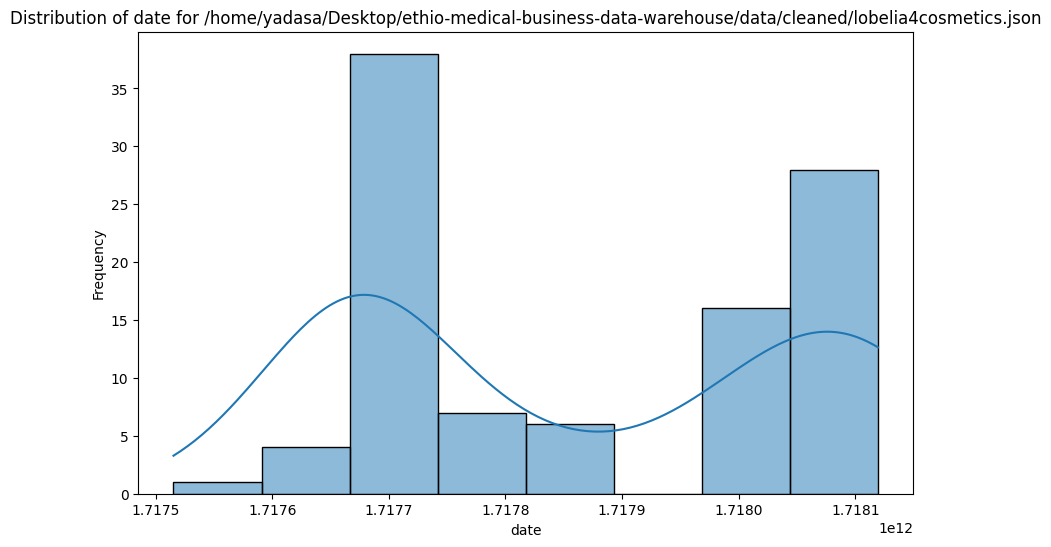

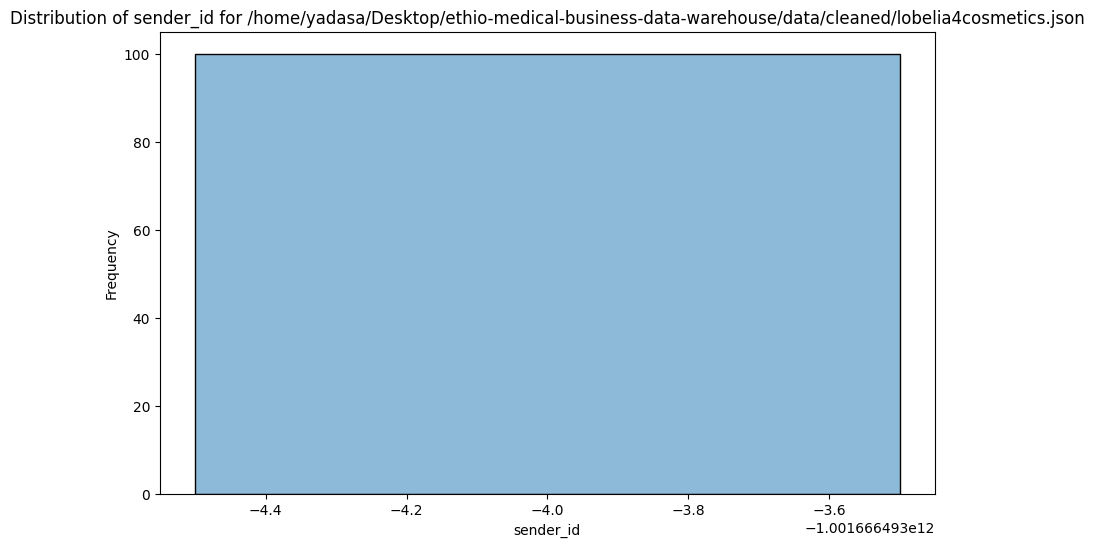

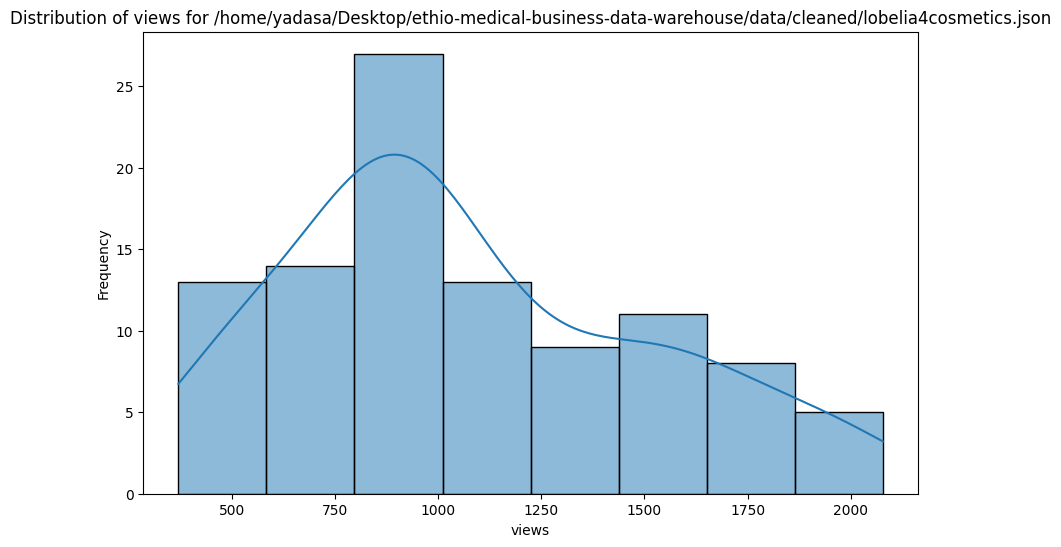

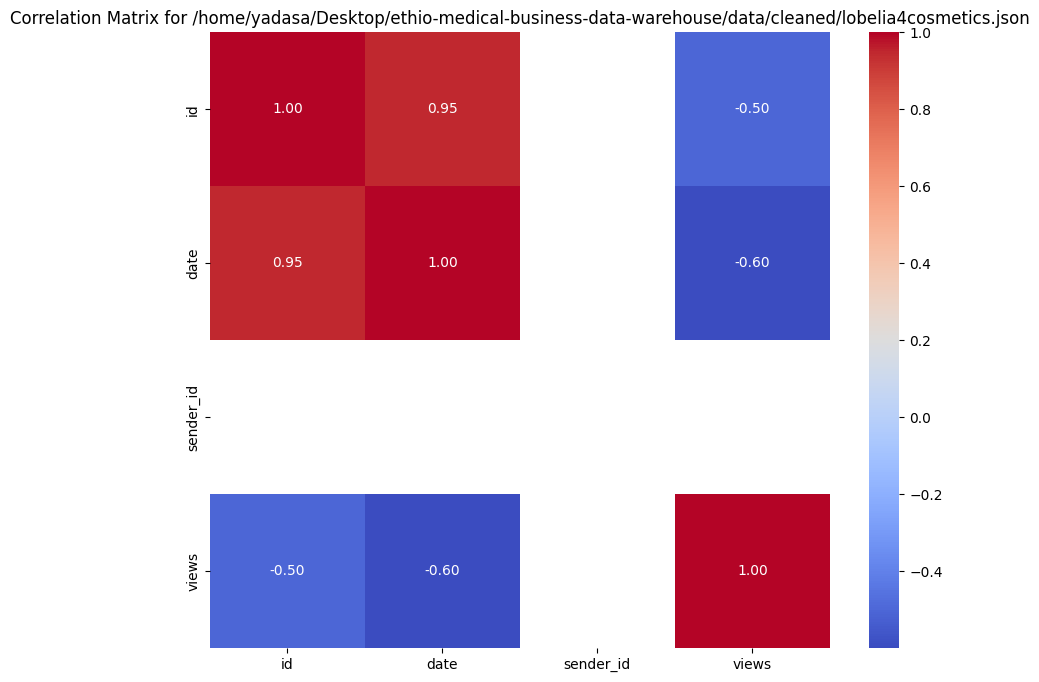

Column 'image' not found in the DataFrame.
Data Information for /home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/yetenaweg_cleaned.json :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   _                        100 non-null    object
 1   id                       100 non-null    int64 
 2   peer_id                  100 non-null    object
 3   date                     100 non-null    int64 
 4   action                   100 non-null    object
 5   out                      100 non-null    bool  
 6   mentioned                100 non-null    bool  
 7   media_unread             100 non-null    bool  
 8   silent                   100 non-null    bool  
 9   post                     100 non-null    bool  
 10  legacy                   100 non-null    bool  
 11  from_id                  100 non-null    

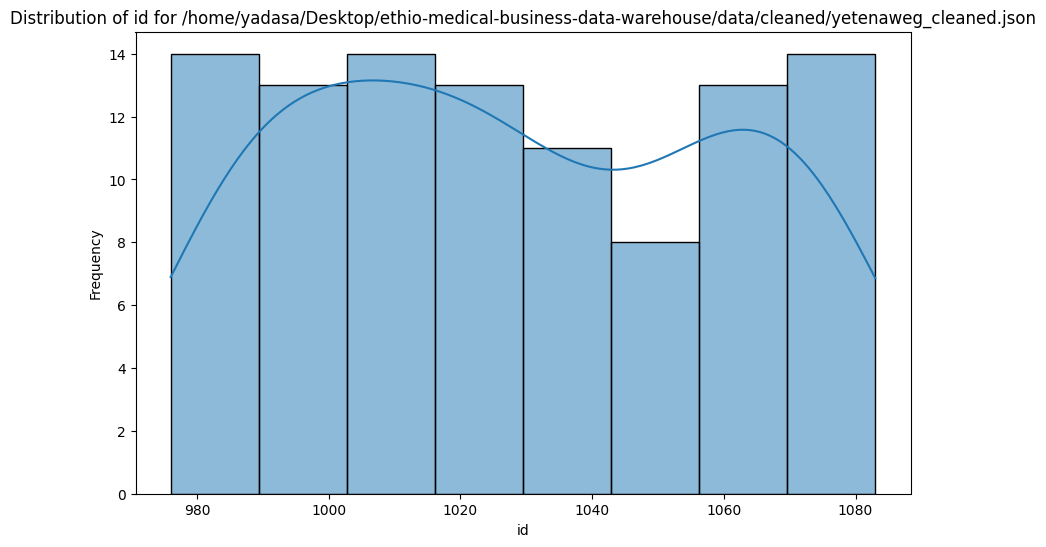

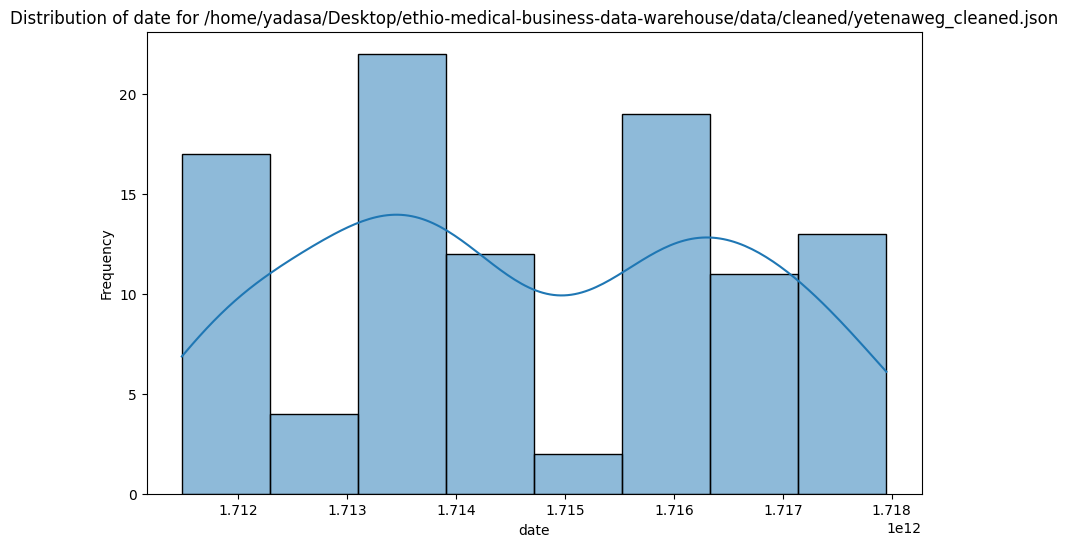

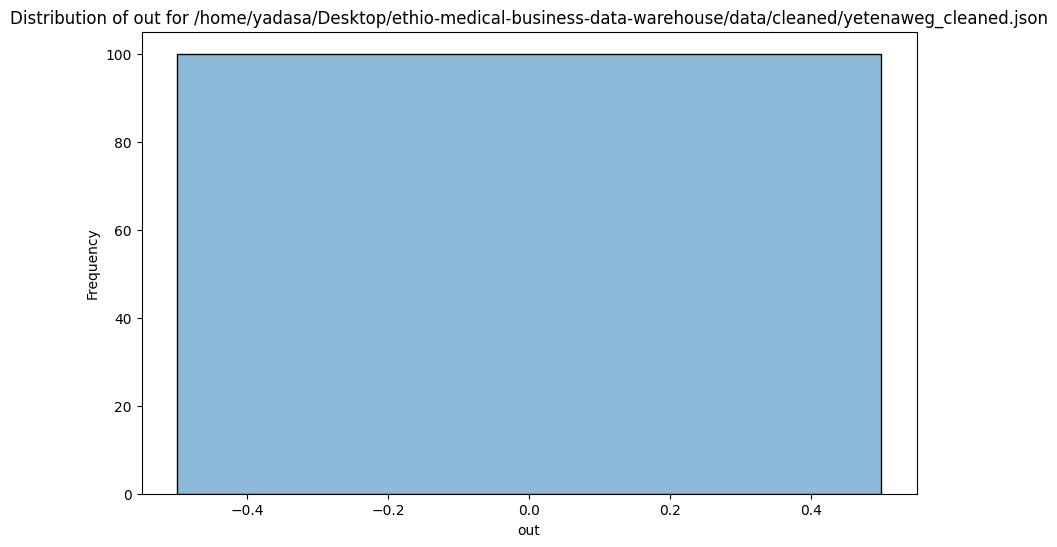

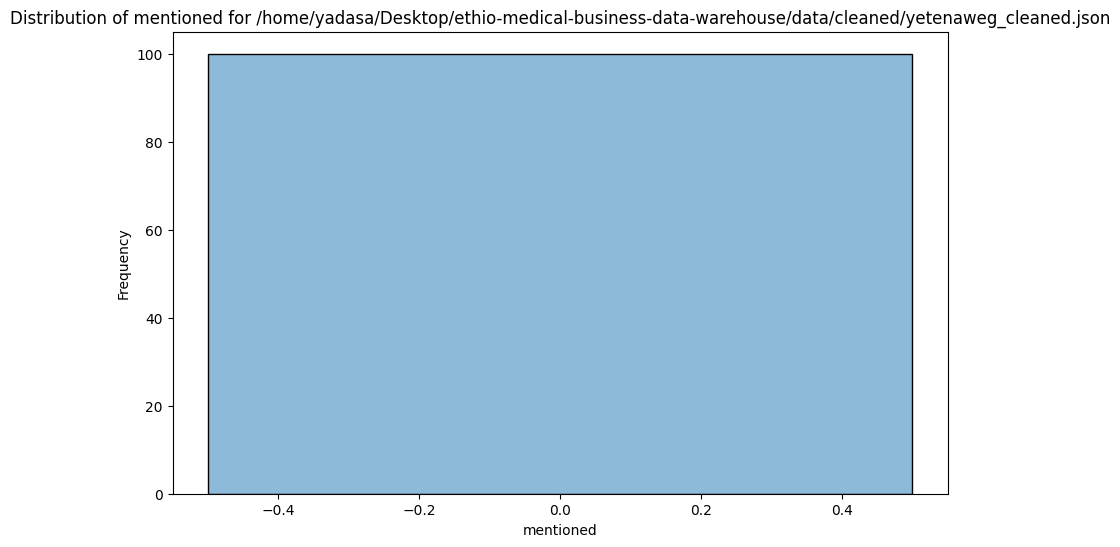

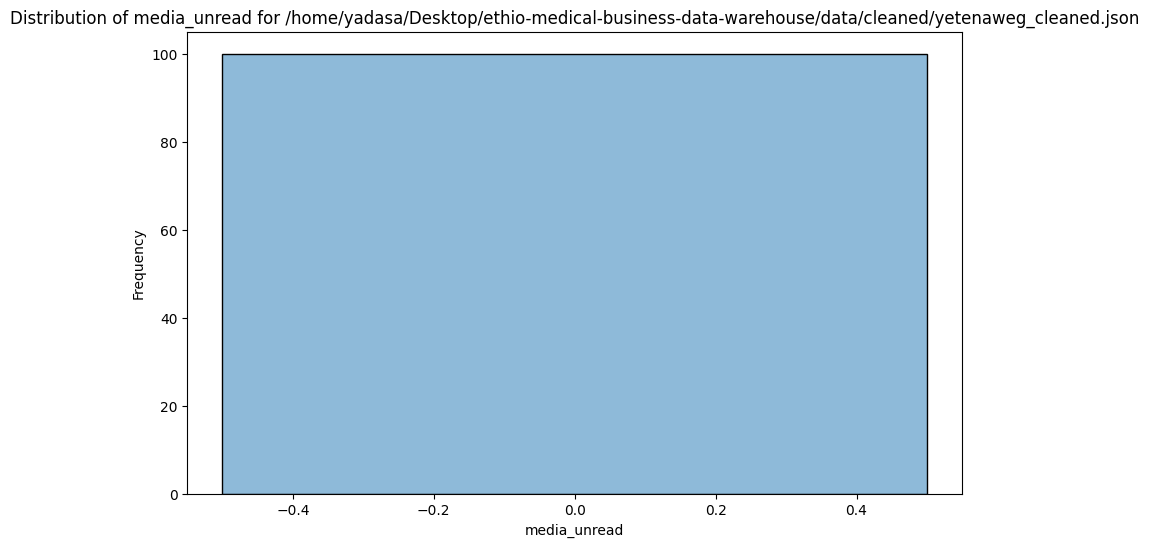

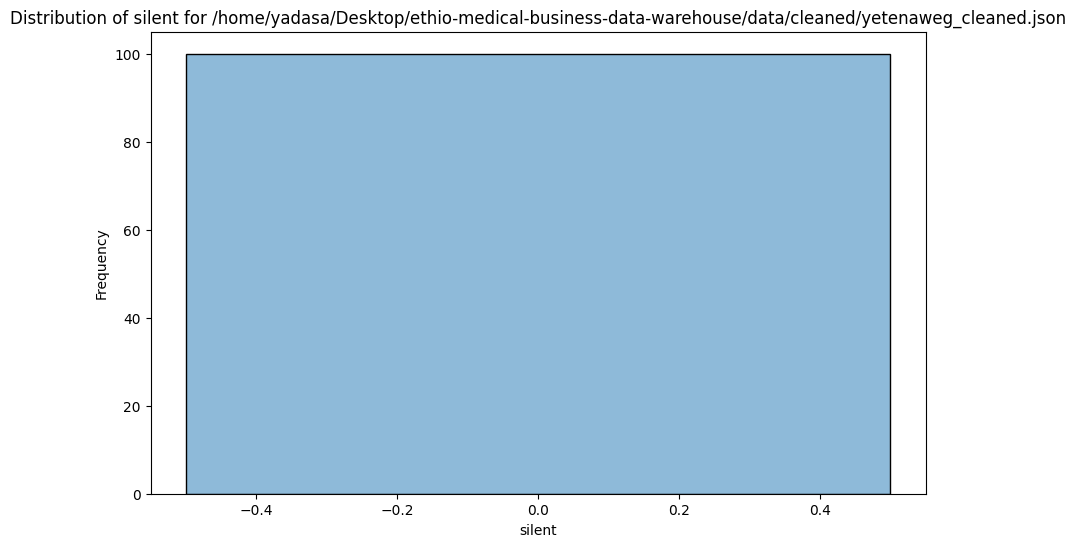

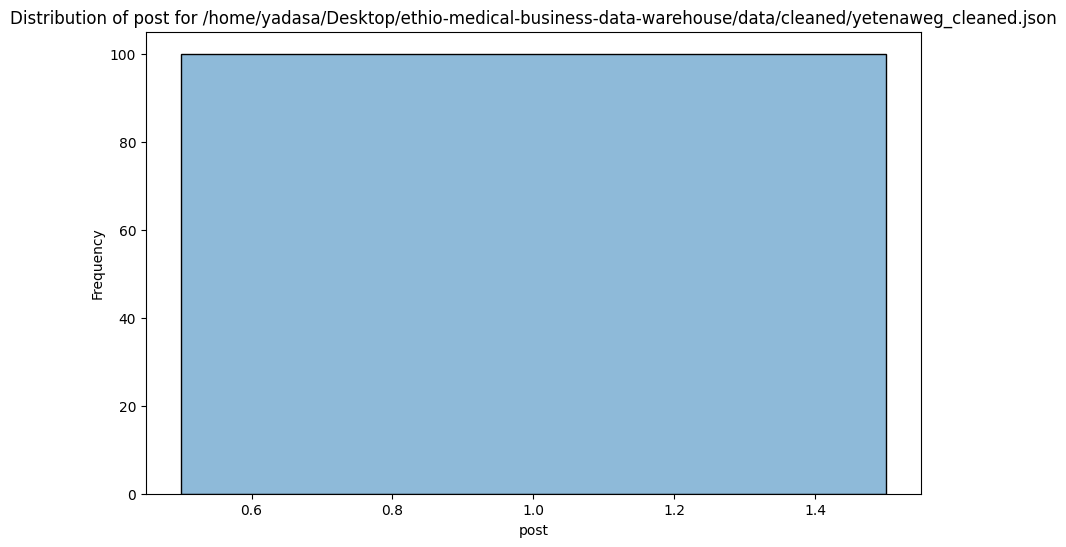

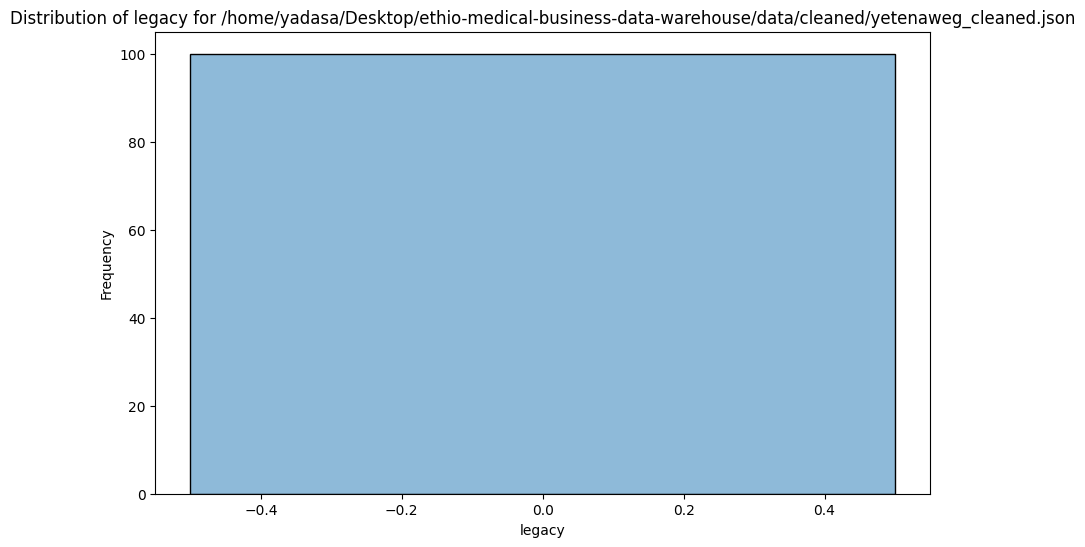

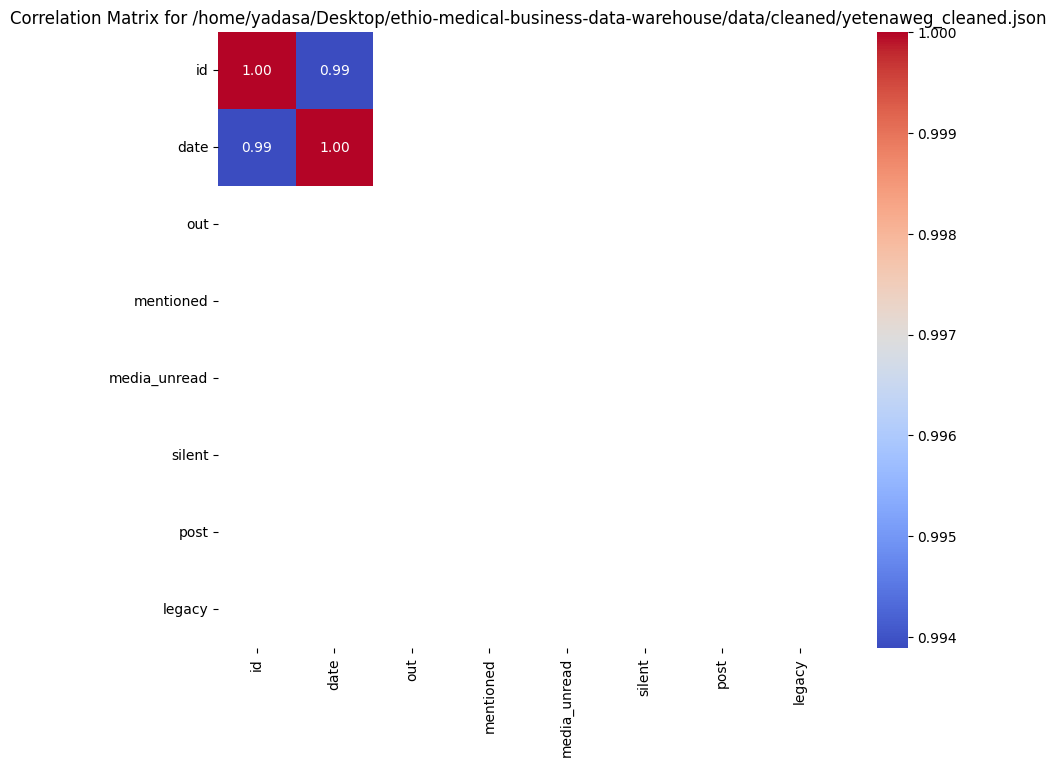

Column 'image' not found in the DataFrame.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import cv2
import os

# Function to perform EDA on a JSON file
def perform_eda(json_file):
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)

    df = pd.DataFrame(data)

    # Display basic information about the dataset
    print("Data Information for", json_file, ":")
    print(df.info())

    # Summary statistics
    print("\nSummary Statistics for", json_file, ":")
    print(df.describe())

    # Distribution of numerical variables
    num_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
    for col in num_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Distribution of {col} for {json_file}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    # Correlation matrix for numerical variables only
    if len(num_cols) > 1:
        numerical_df = df[num_cols]
        plt.figure(figsize=(10, 8))
        sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix for ' + json_file)
        plt.show()
    else:
        print("Insufficient numerical columns for correlation analysis in", json_file)

    # Image analysis
    image_folder = 'image_folder'
    if 'image' in df.columns:
        sample_images = df['image'].sample(5).tolist()
        display_images(sample_images)
    else:
        print("Column 'image' not found in the DataFrame.")


# Function to display sample images
def display_images(images, num_images=5):
    plt.figure(figsize=(15, 8))
    for i in range(min(num_images, len(images))):
        img = cv2.imread(os.path.join(image_folder, images[i]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, min(num_images, len(images)), i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# List of JSON files
json_files = ['/home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/DoctorsET_cleaned.json', '/home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/EAHCI_cleaned.json', '/home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/lobelia4cosmetics_cleaned.json', '/home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/lobelia4cosmetics.json', '/home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/yetenaweg_cleaned.json']

# Perform EDA on each JSON file
for file in json_files:
    perform_eda(file)


<Figure size 1000x600 with 0 Axes>

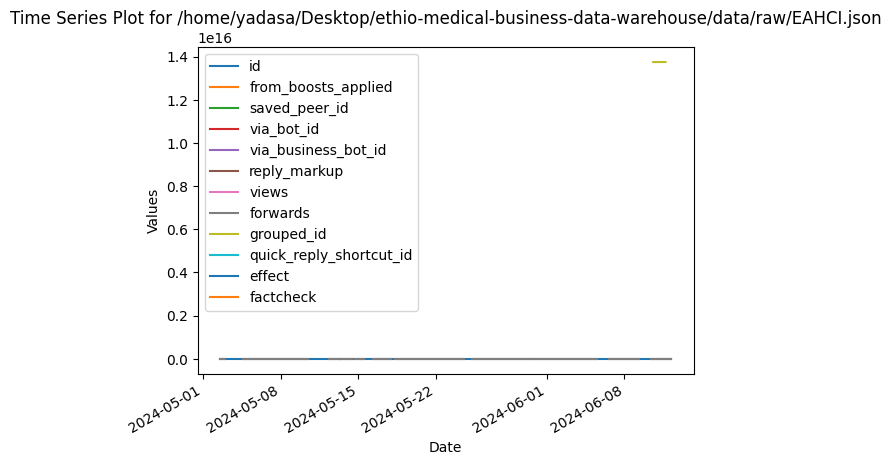

<Figure size 1000x600 with 0 Axes>

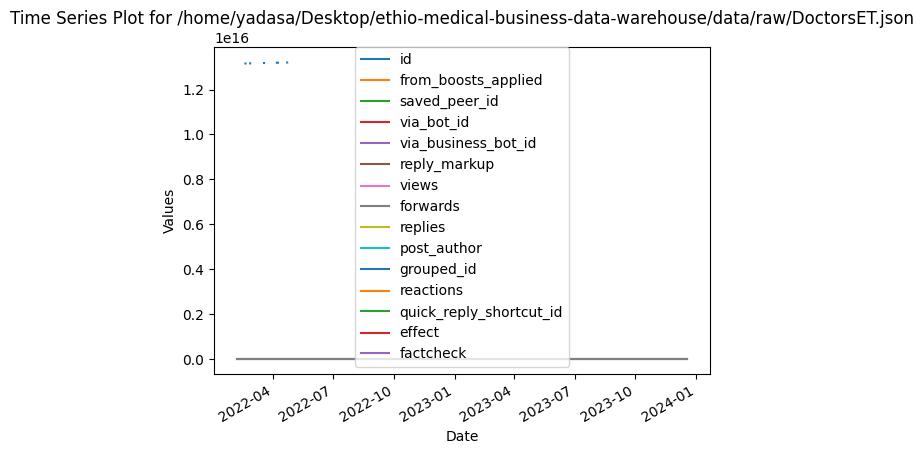

<Figure size 1000x600 with 0 Axes>

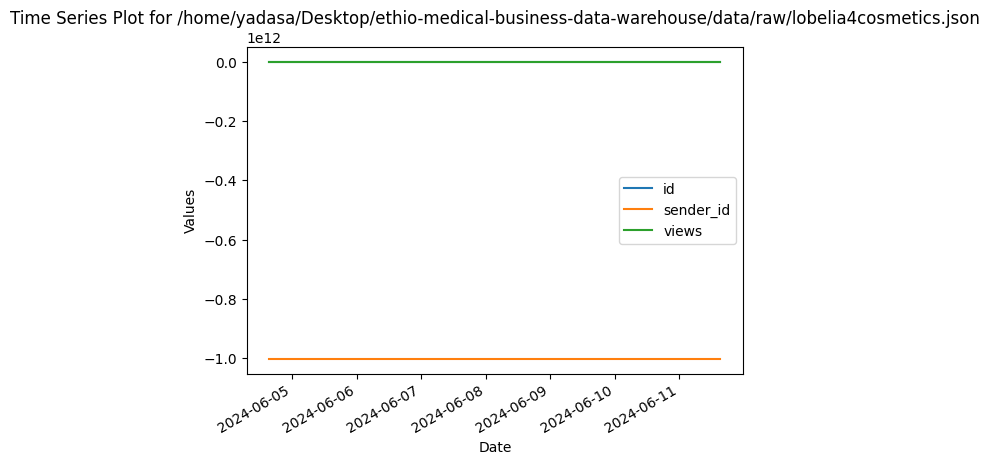

<Figure size 1000x600 with 0 Axes>

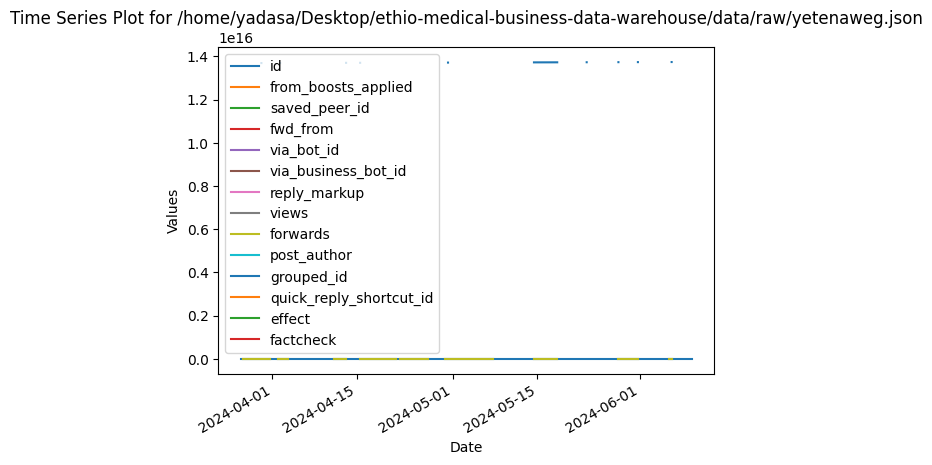

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import cv2
import os

# Function to perform time series analysis on a JSON file
def perform_time_series_analysis(json_file):
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)

    df = pd.DataFrame(data)

    # Convert 'date' column to datetime type if it exists
    if 'date' in df.columns:
        try:
            # Convert date column to datetime format
            df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%dT%H:%M:%S%z')  # Specify the correct format
        except ValueError:
            print("Error converting date column to datetime in", json_file)
            return

        # Set 'date' column as the index
        df.set_index('date', inplace=True)

        # Time series plot
        plt.figure(figsize=(10, 6))
        df.plot()
        plt.title('Time Series Plot for ' + json_file)
        plt.xlabel('Date')
        plt.ylabel('Values')
        plt.show()
    else:
        print("No 'date' column found in the DataFrame for", json_file)

# List of JSON files
json_files = [
    '/home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/raw/EAHCI.json',
    '/home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/raw/DoctorsET.json',
    '/home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/raw/lobelia4cosmetics.json',
    '/home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/raw/yetenaweg.json'
]

# Perform time series analysis on each JSON file
for file in json_files:
    perform_time_series_analysis(file)


Data Information for /home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/DoctorsET_cleaned.json :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   _                        100 non-null    object
 1   id                       100 non-null    int64 
 2   peer_id                  100 non-null    object
 3   date                     100 non-null    int64 
 4   message                  100 non-null    object
 5   out                      100 non-null    bool  
 6   mentioned                100 non-null    bool  
 7   media_unread             100 non-null    bool  
 8   silent                   100 non-null    bool  
 9   post                     100 non-null    bool  
 10  from_scheduled           100 non-null    object
 11  legacy                   100 non-null    bool  
 12  edit_hide                100 no

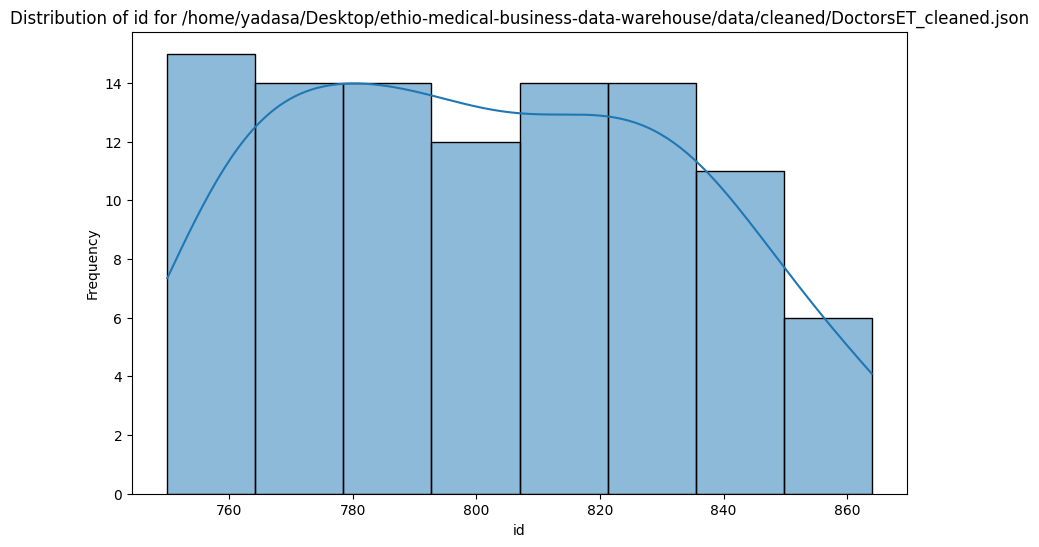

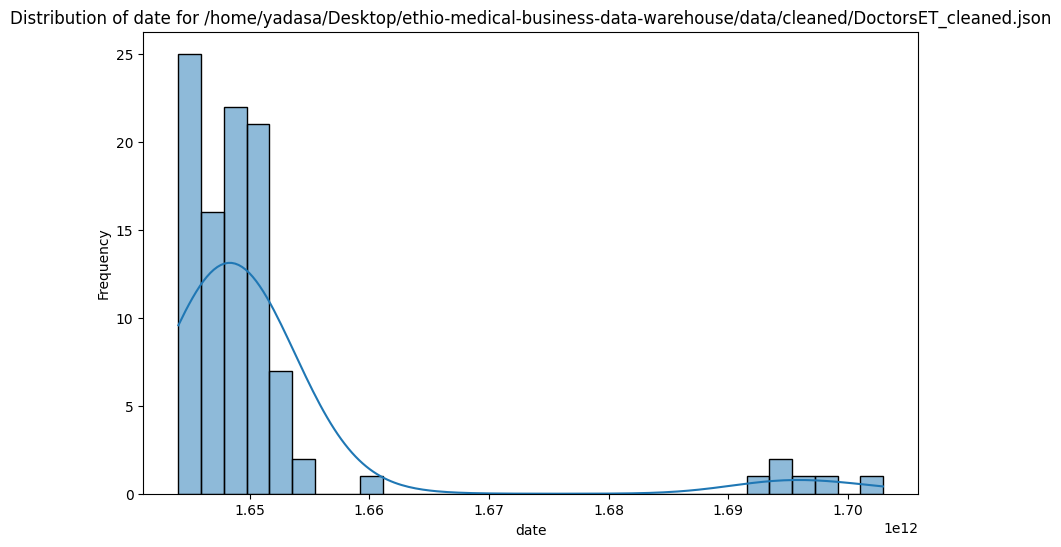

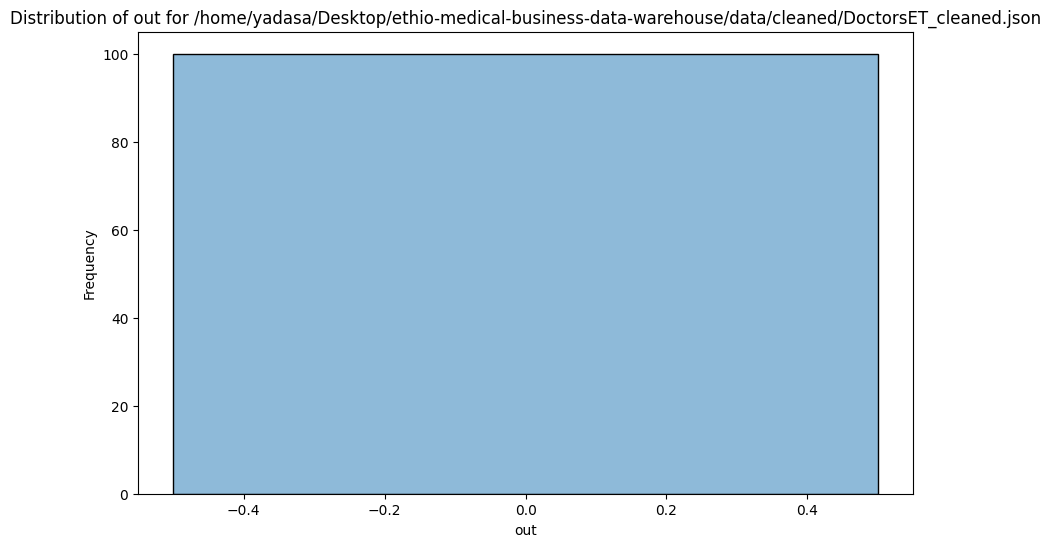

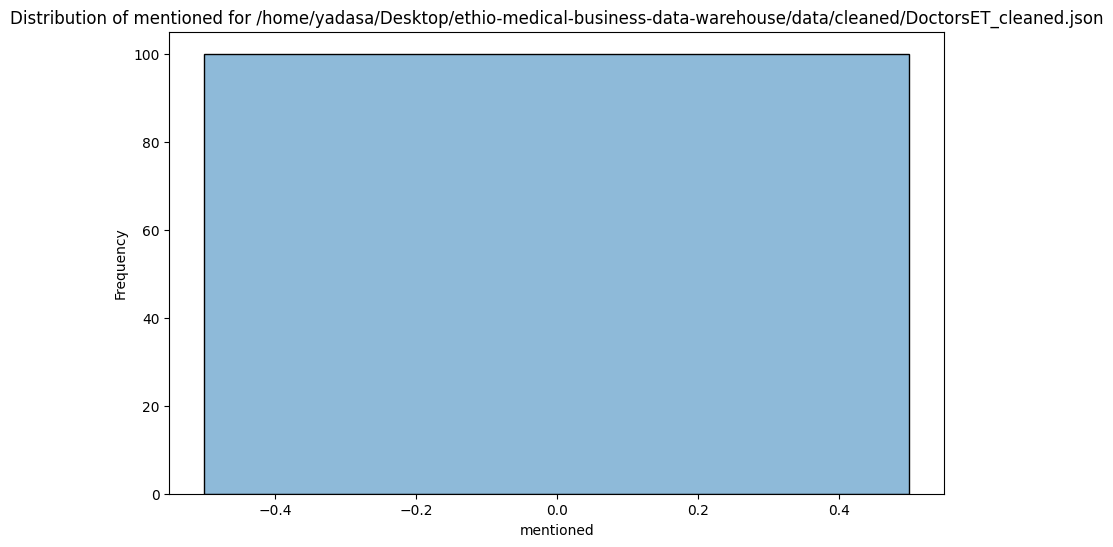

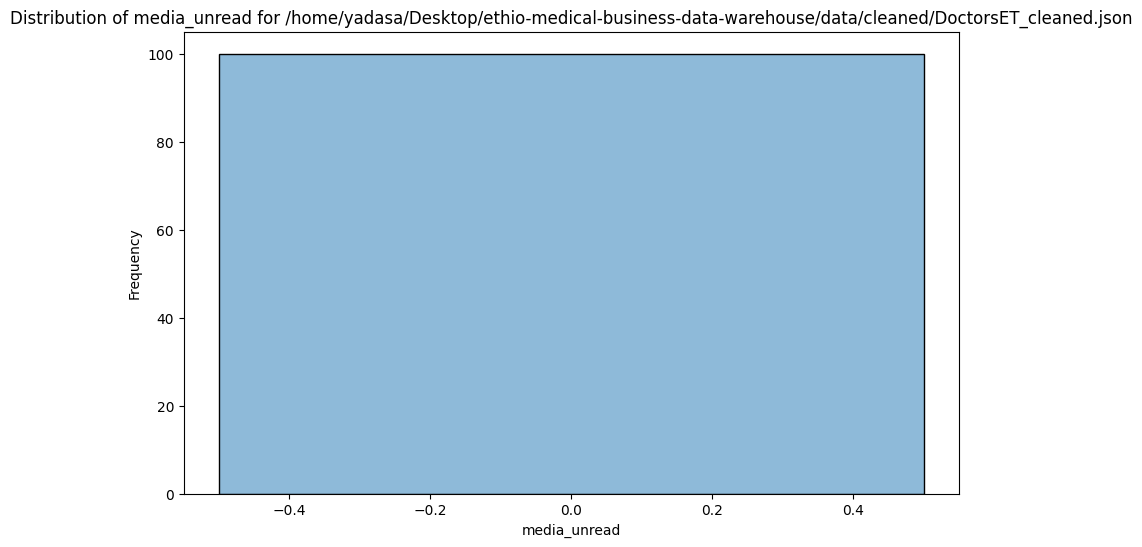

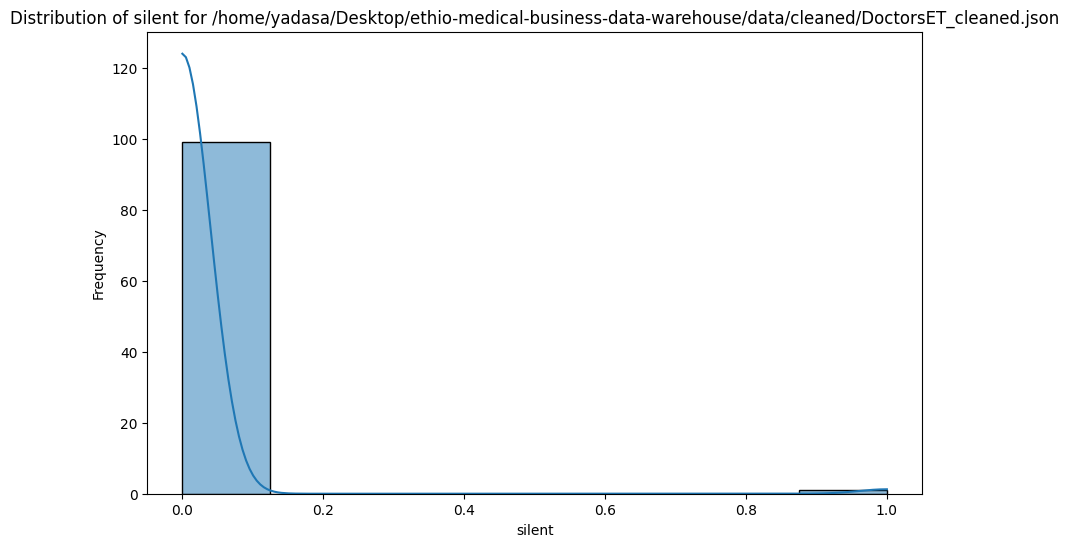

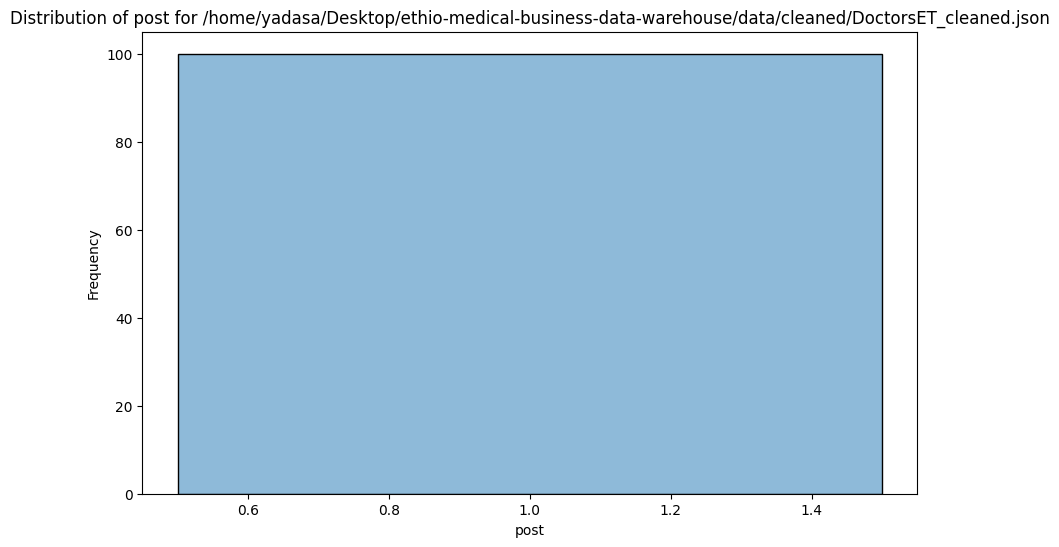

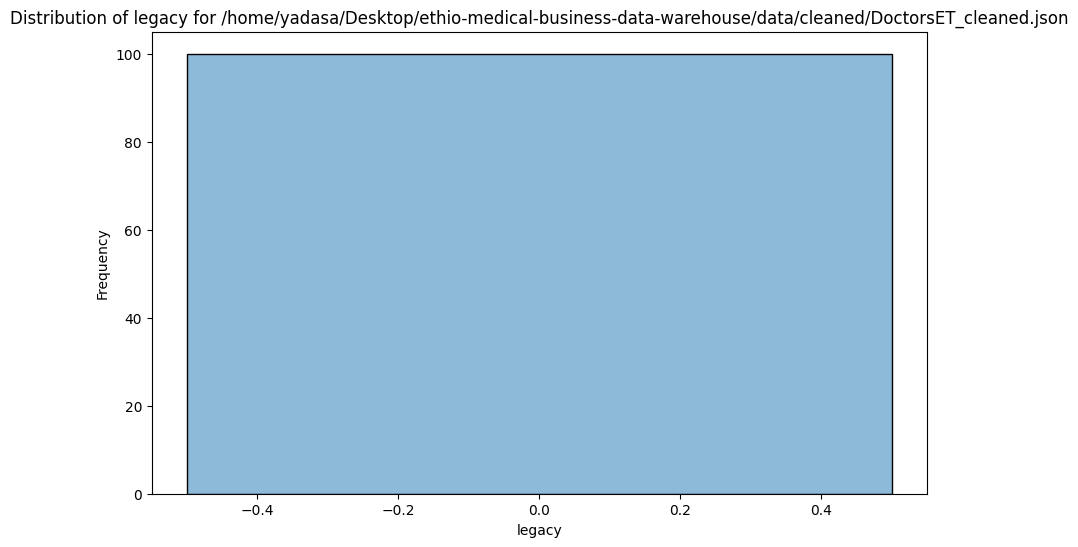

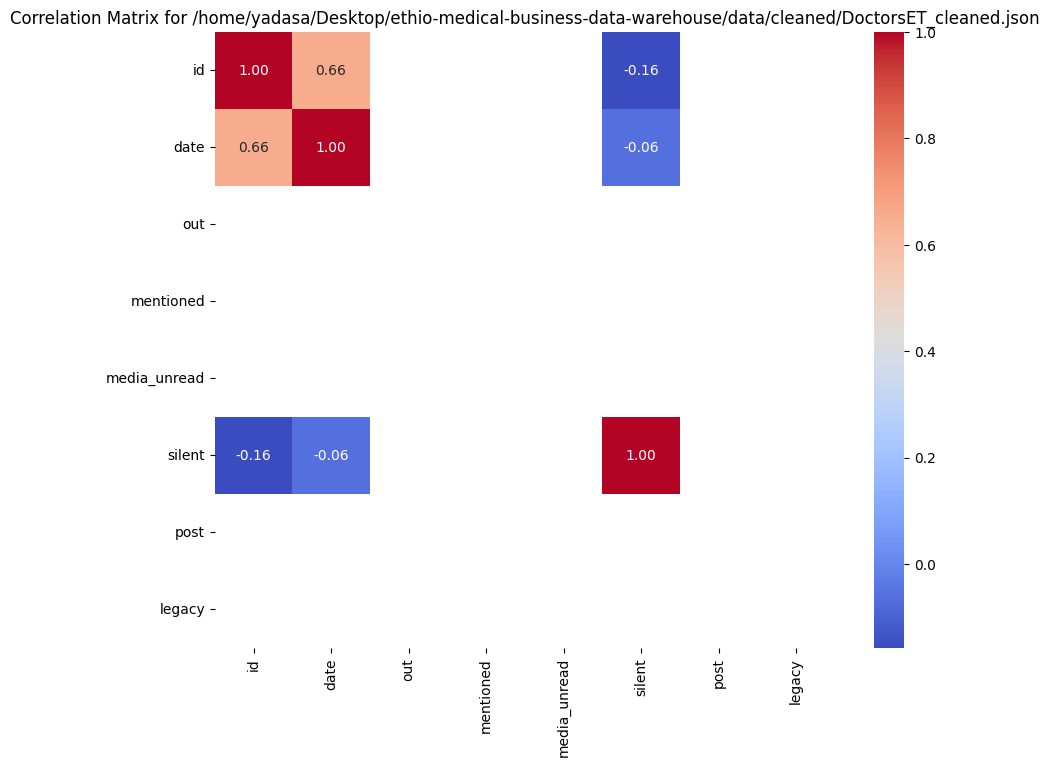

Data Information for /home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/EAHCI_cleaned.json :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   _                        100 non-null    object
 1   id                       100 non-null    int64 
 2   peer_id                  100 non-null    object
 3   date                     100 non-null    int64 
 4   message                  100 non-null    object
 5   out                      100 non-null    bool  
 6   mentioned                100 non-null    bool  
 7   media_unread             100 non-null    bool  
 8   silent                   100 non-null    bool  
 9   post                     100 non-null    bool  
 10  from_scheduled           100 non-null    object
 11  legacy                   100 non-null    bool  
 12  edit_hide                100 non-nu

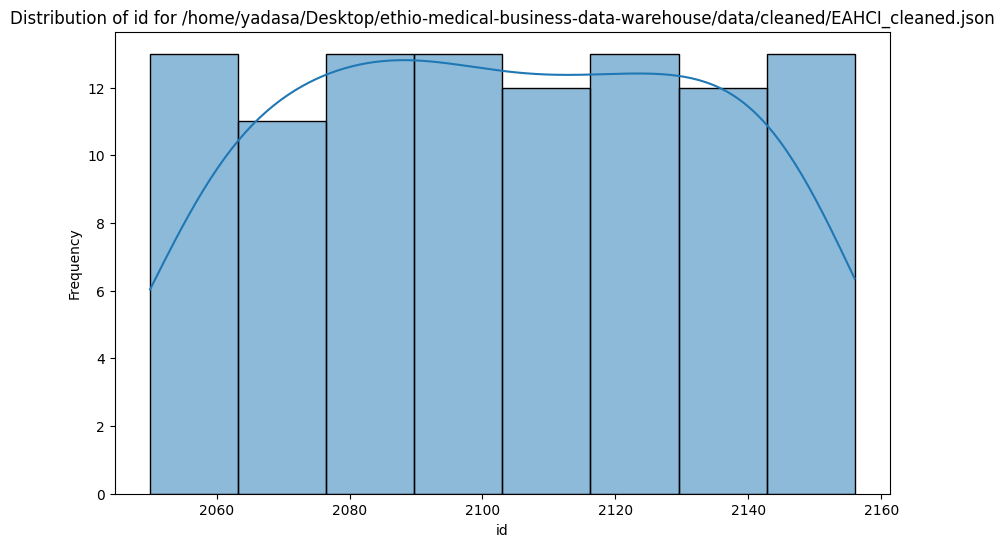

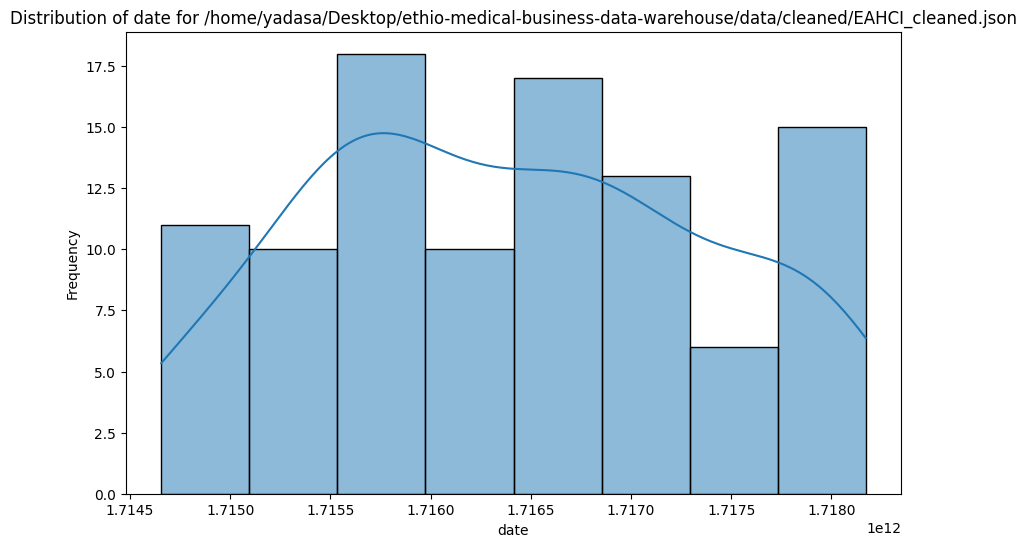

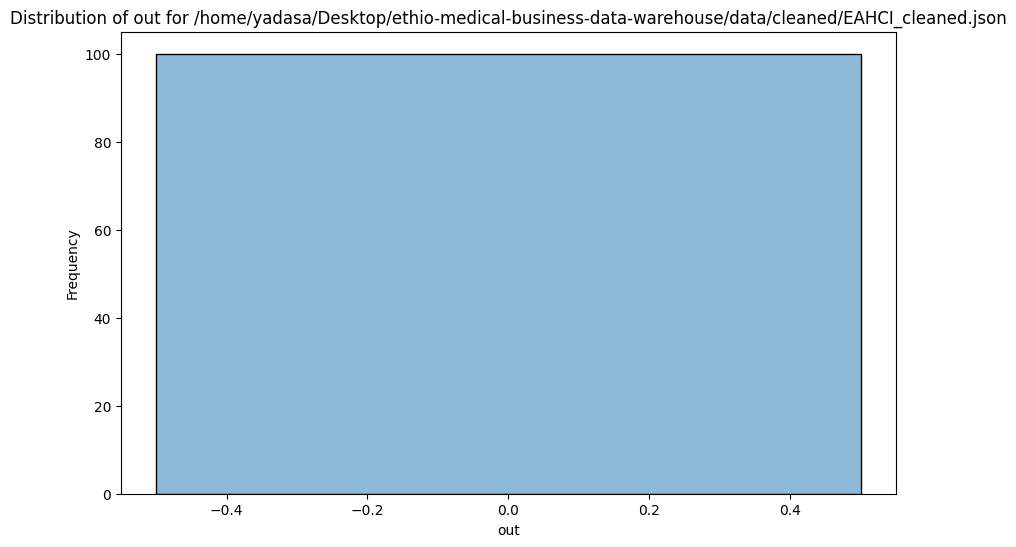

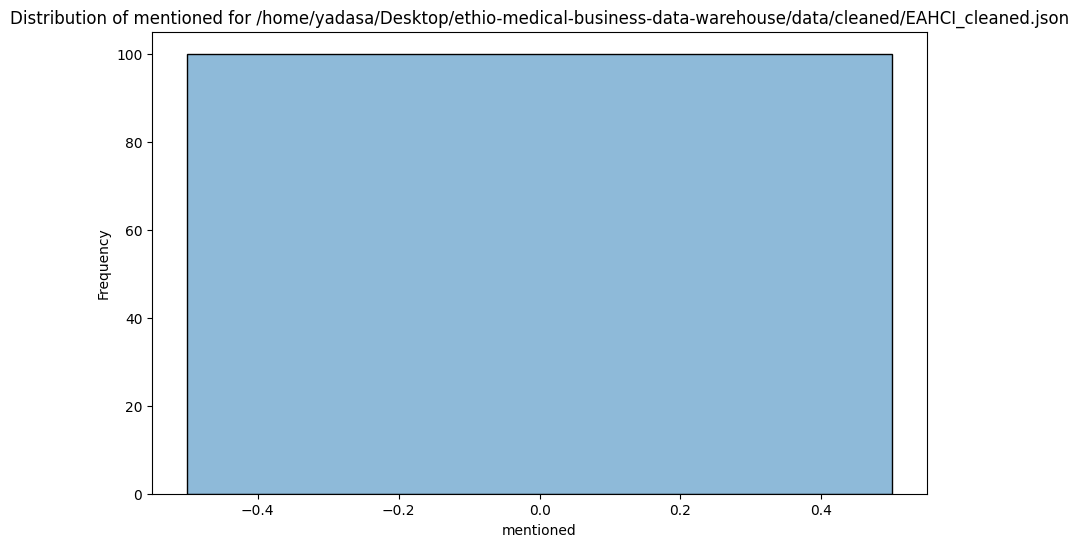

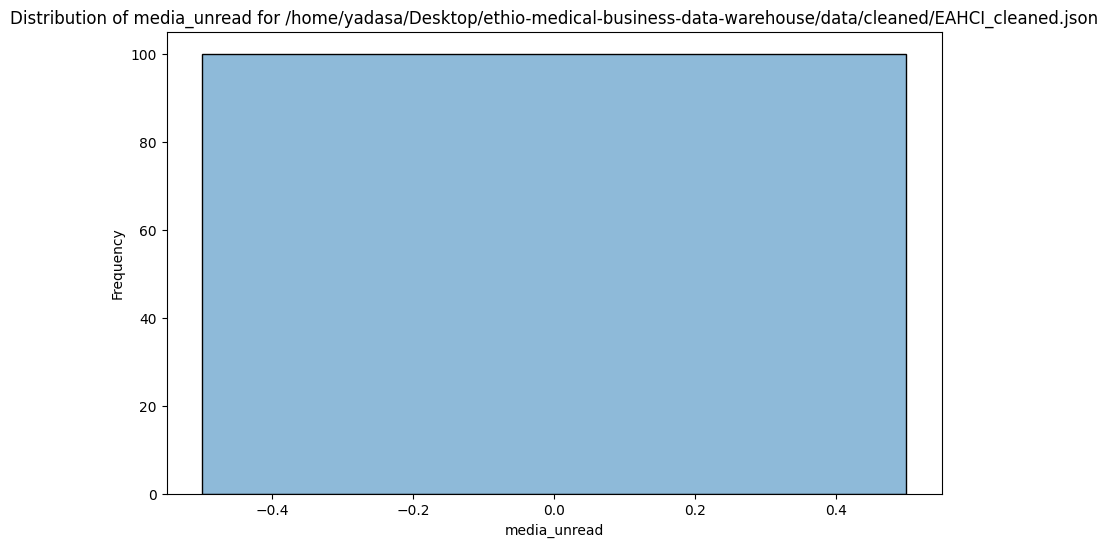

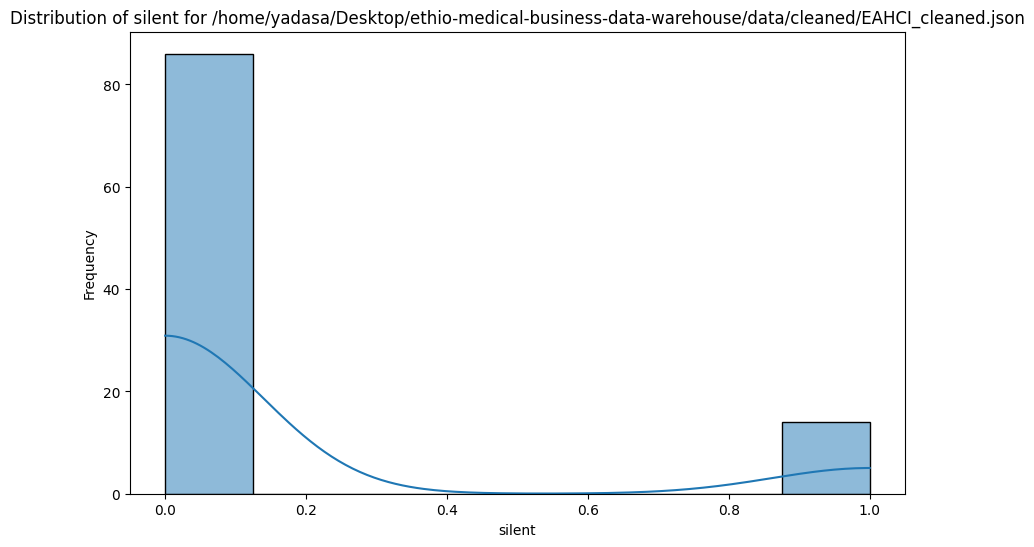

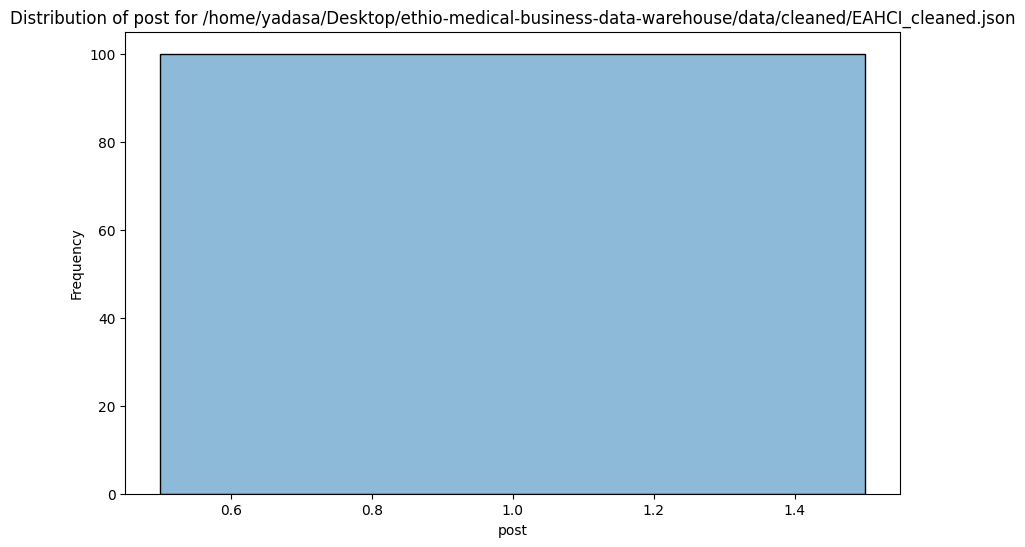

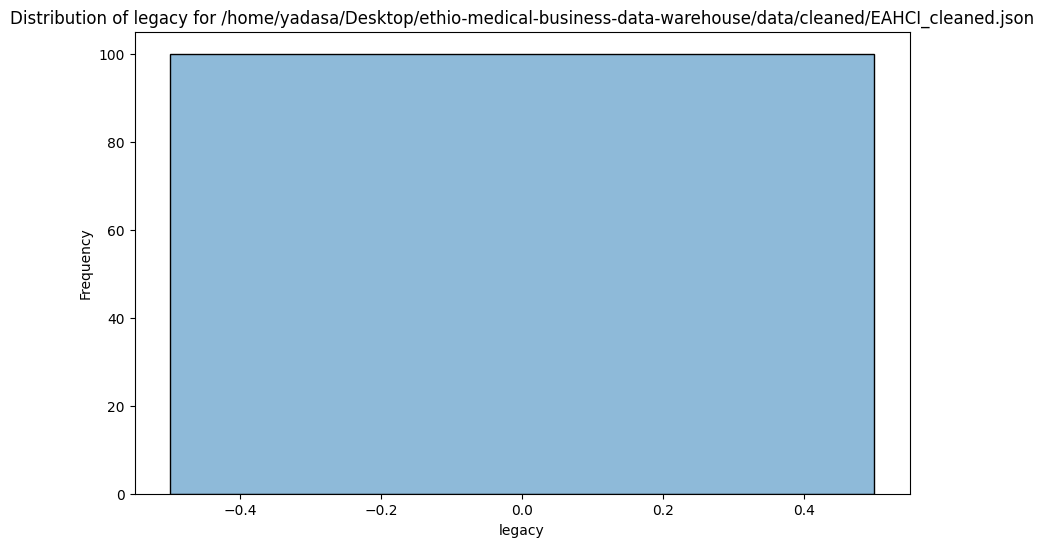

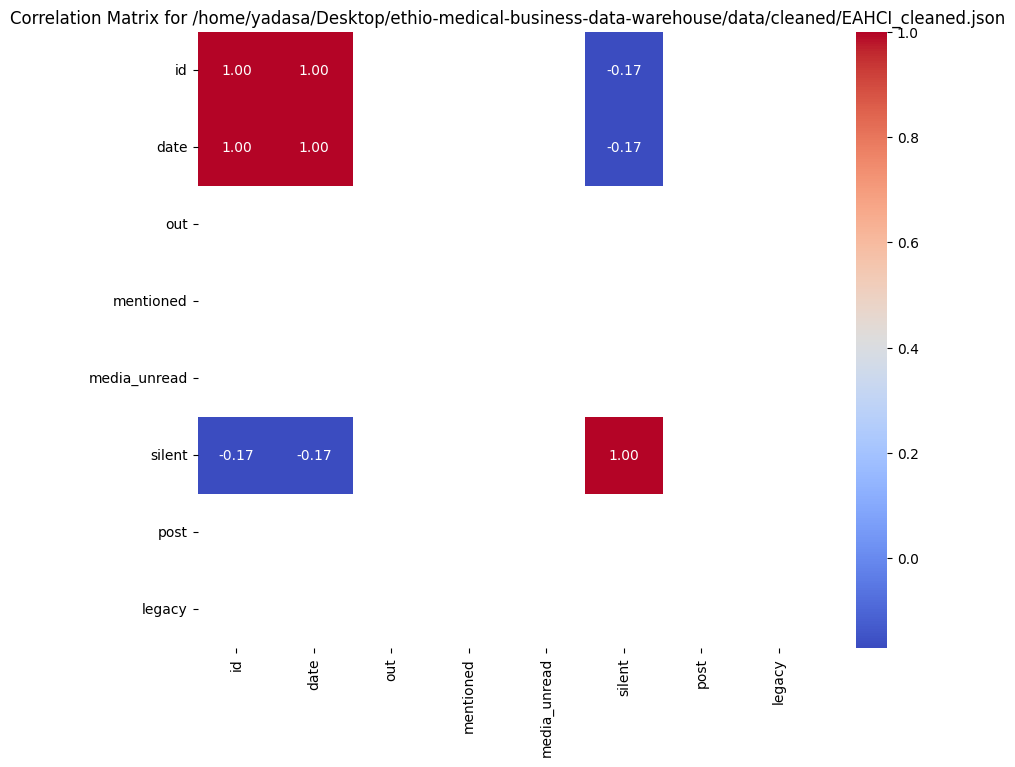

Data Information for /home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/lobelia4cosmetics_cleaned.json :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         100 non-null    int64 
 1   date       100 non-null    int64 
 2   text       100 non-null    object
 3   sender_id  100 non-null    int64 
 4   views      100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB
None

Summary Statistics for /home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/lobelia4cosmetics_cleaned.json :
                id          date     sender_id        views
count   100.000000  1.000000e+02  1.000000e+02   100.000000
mean   9381.660000  1.717860e+12 -1.001666e+12  1070.240000
std      30.113999  1.972379e+08  0.000000e+00   437.365463
min    9328.000000  1.717515e+12 -1.001666e+12   371.000000
25%    9356.75

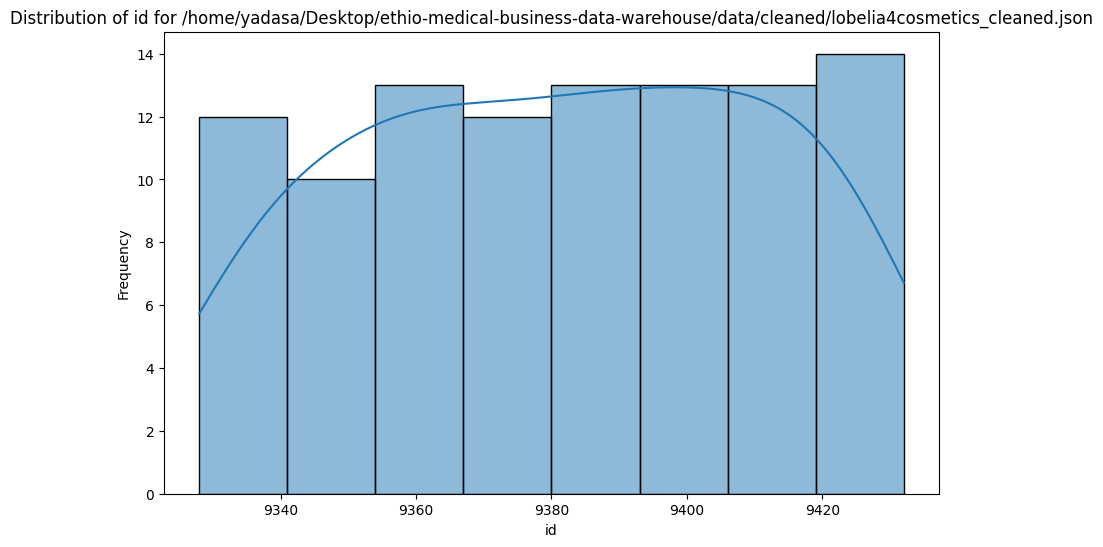

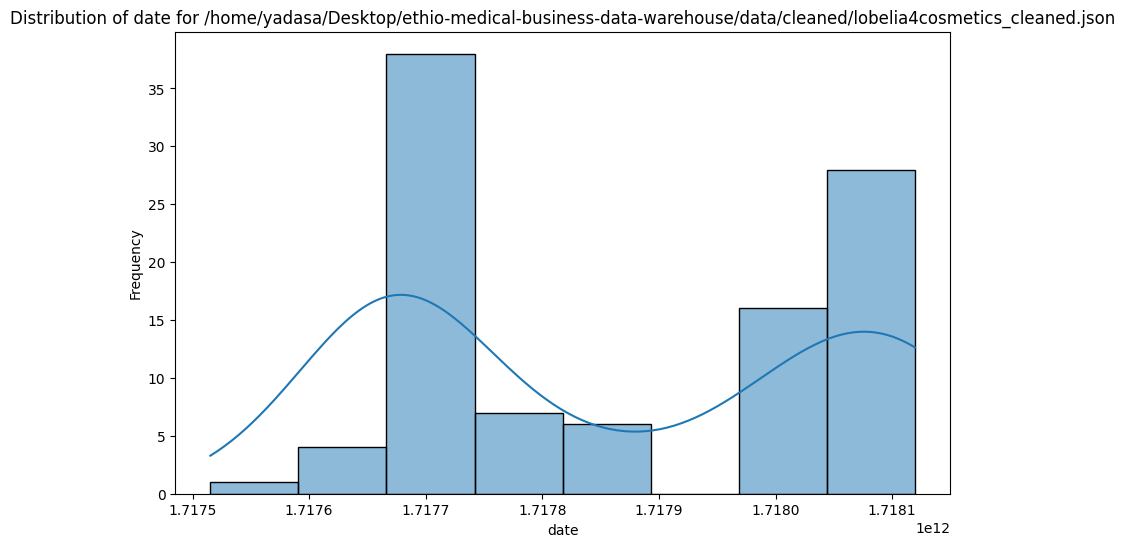

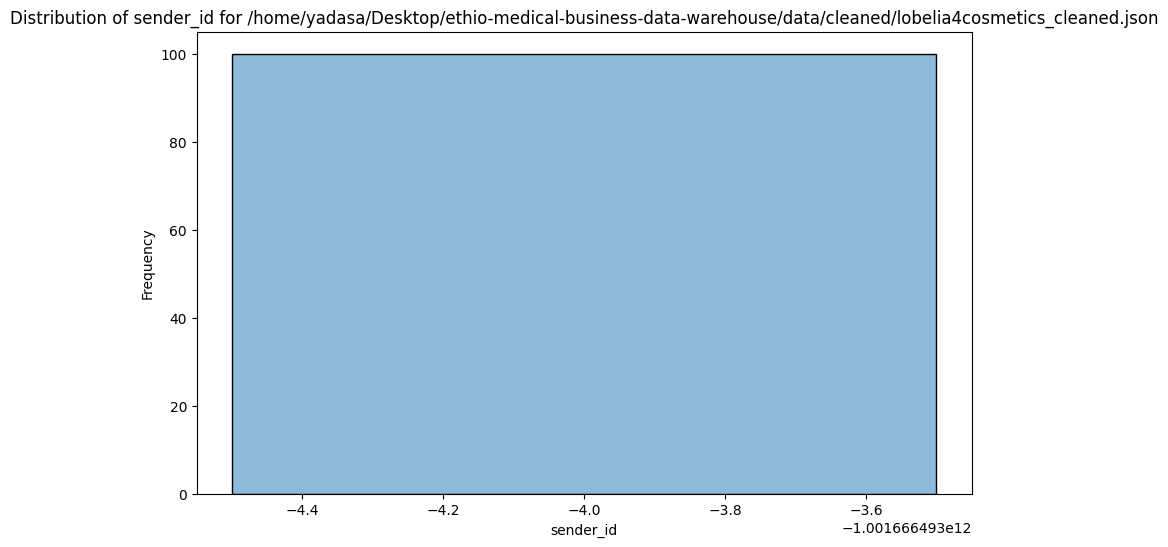

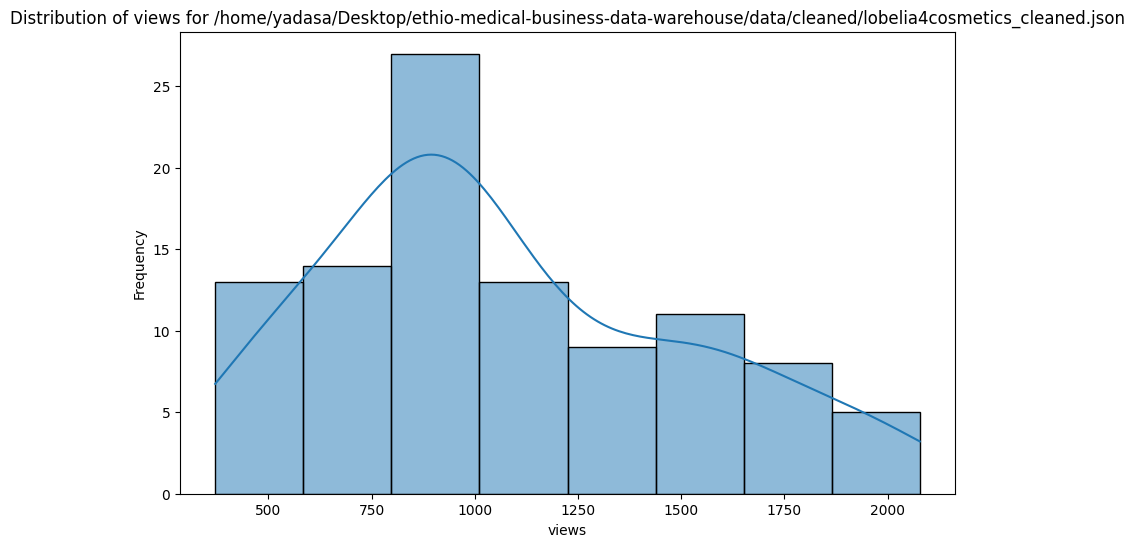

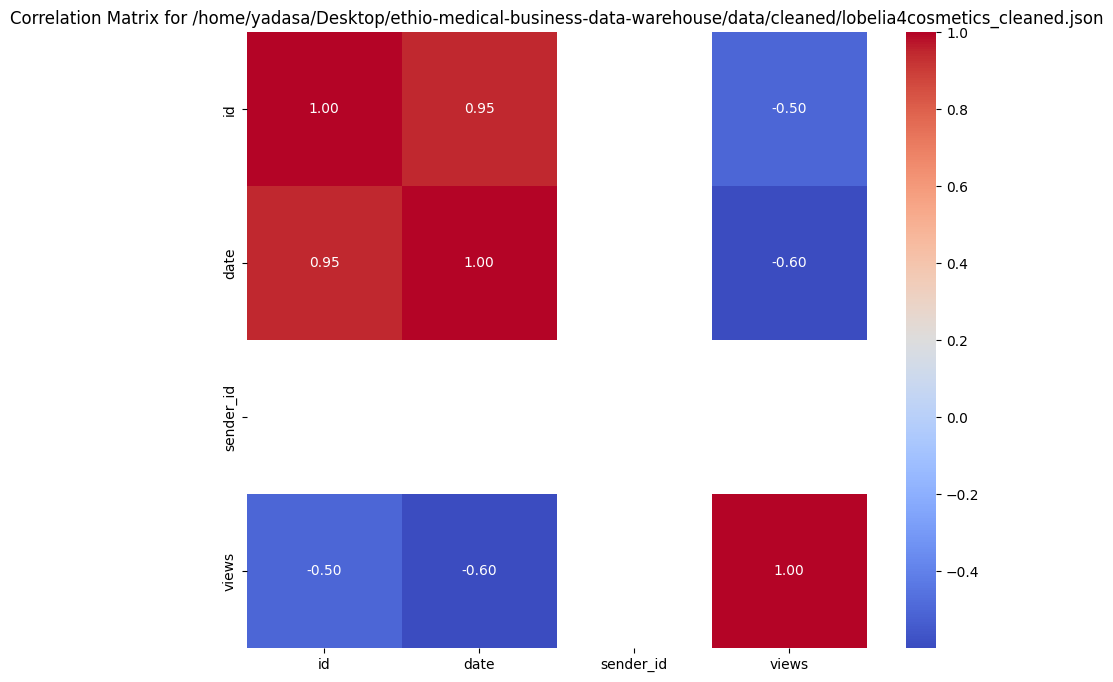

Data Information for /home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/lobelia4cosmetics.json :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         100 non-null    int64 
 1   date       100 non-null    int64 
 2   text       100 non-null    object
 3   sender_id  100 non-null    int64 
 4   views      100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB
None

Summary Statistics for /home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/lobelia4cosmetics.json :
                id          date     sender_id        views
count   100.000000  1.000000e+02  1.000000e+02   100.000000
mean   9381.660000  1.717860e+12 -1.001666e+12  1070.240000
std      30.113999  1.972379e+08  0.000000e+00   437.365463
min    9328.000000  1.717515e+12 -1.001666e+12   371.000000
25%    9356.750000  1.717671e+

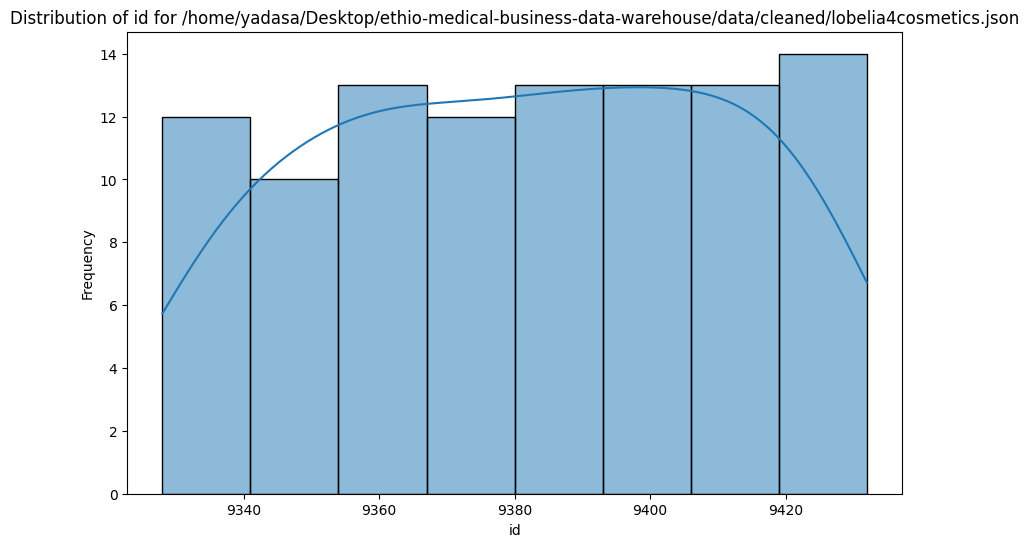

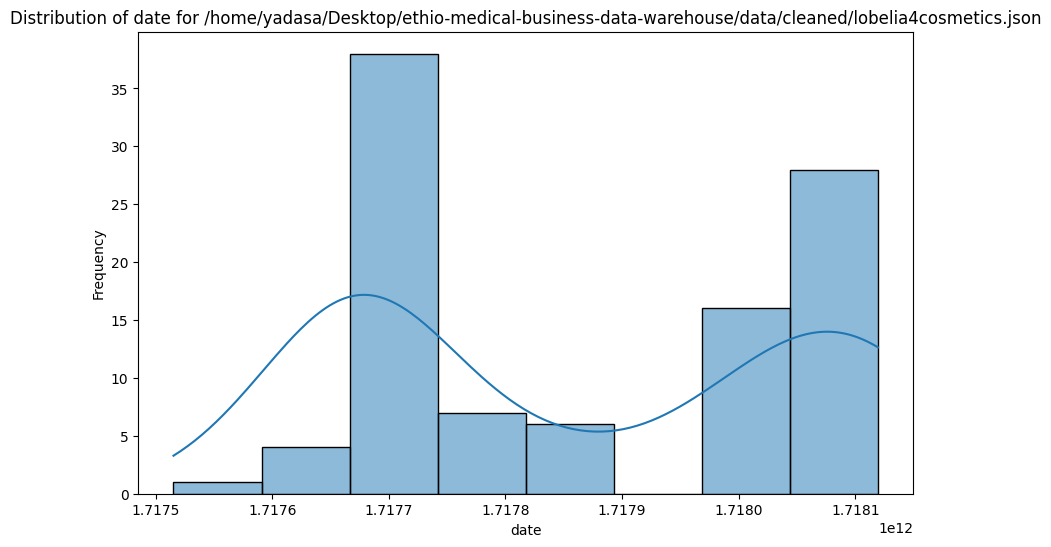

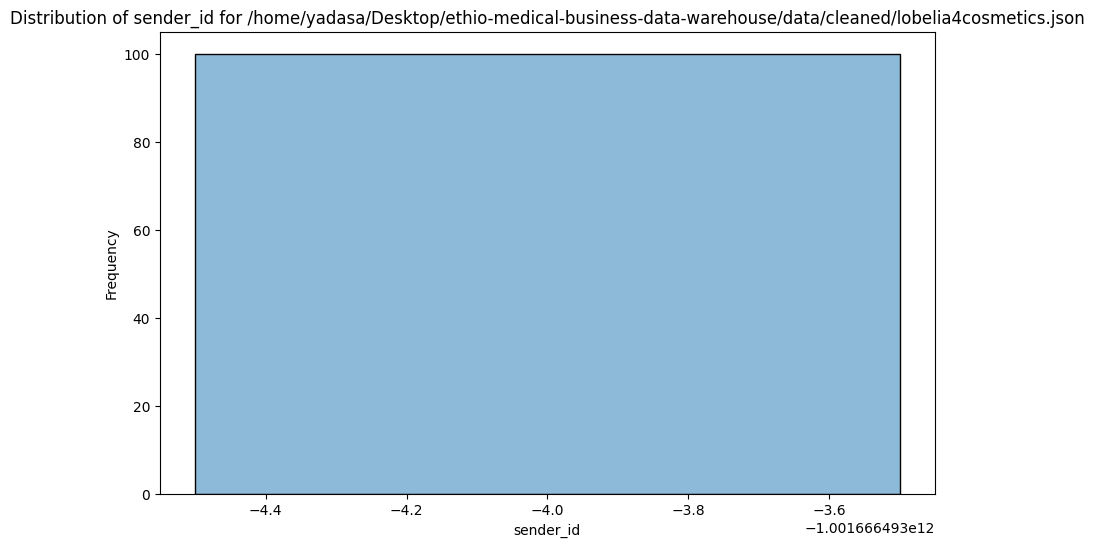

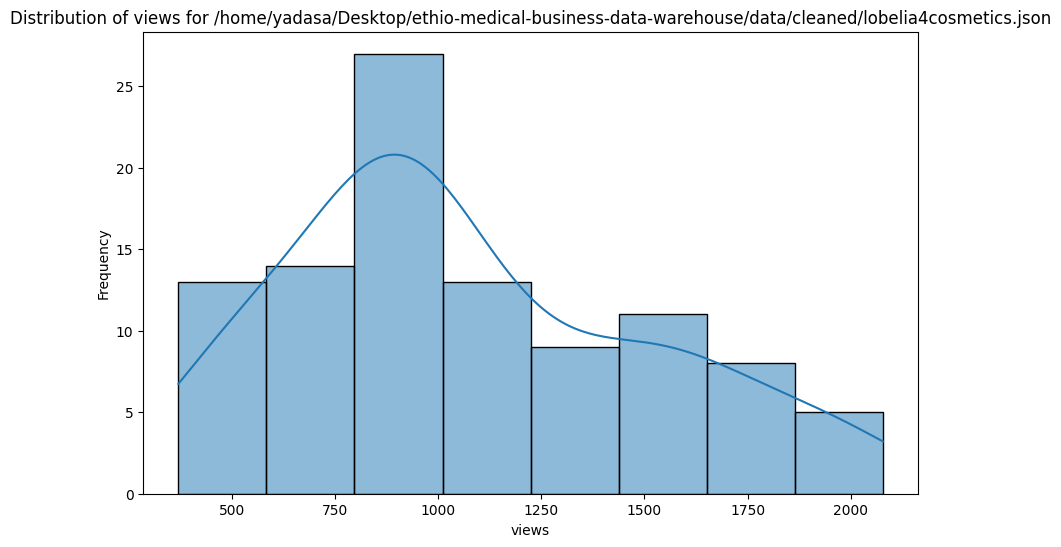

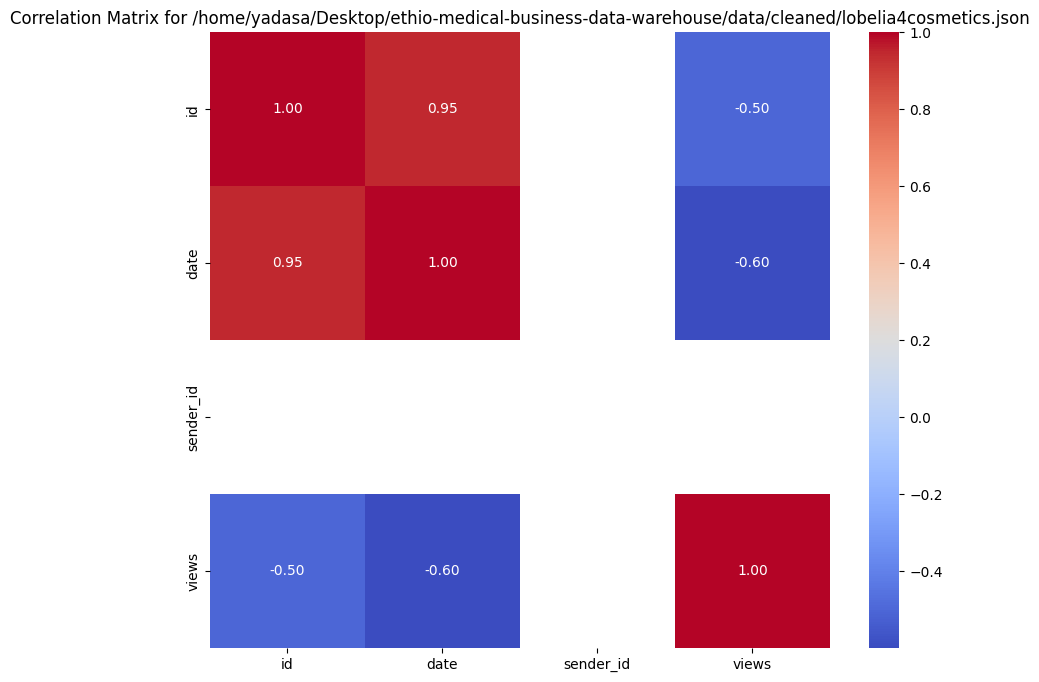

Data Information for /home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/yetenaweg_cleaned.json :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   _                        100 non-null    object
 1   id                       100 non-null    int64 
 2   peer_id                  100 non-null    object
 3   date                     100 non-null    int64 
 4   action                   100 non-null    object
 5   out                      100 non-null    bool  
 6   mentioned                100 non-null    bool  
 7   media_unread             100 non-null    bool  
 8   silent                   100 non-null    bool  
 9   post                     100 non-null    bool  
 10  legacy                   100 non-null    bool  
 11  from_id                  100 non-null    object
 12  reply_to                 100 no

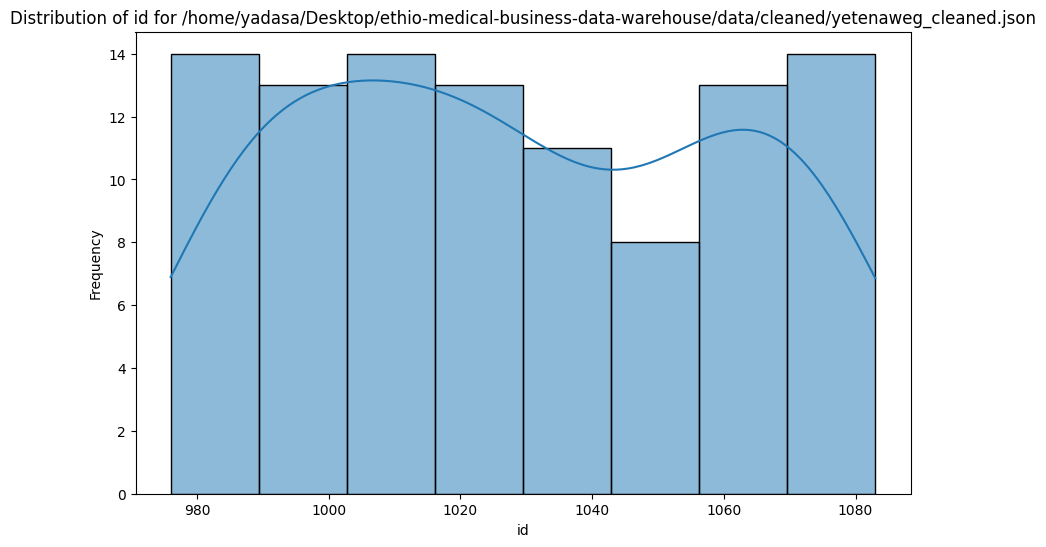

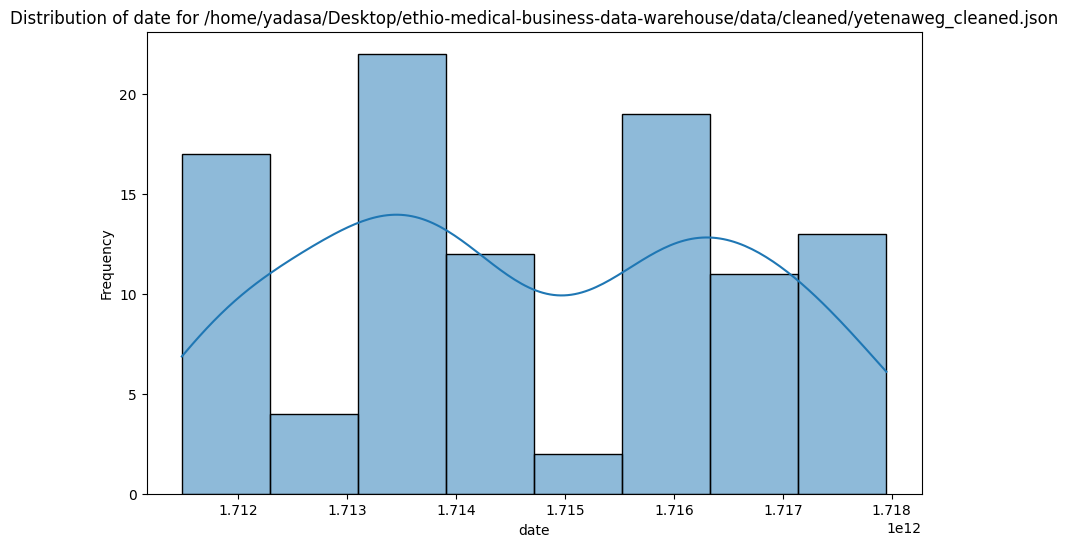

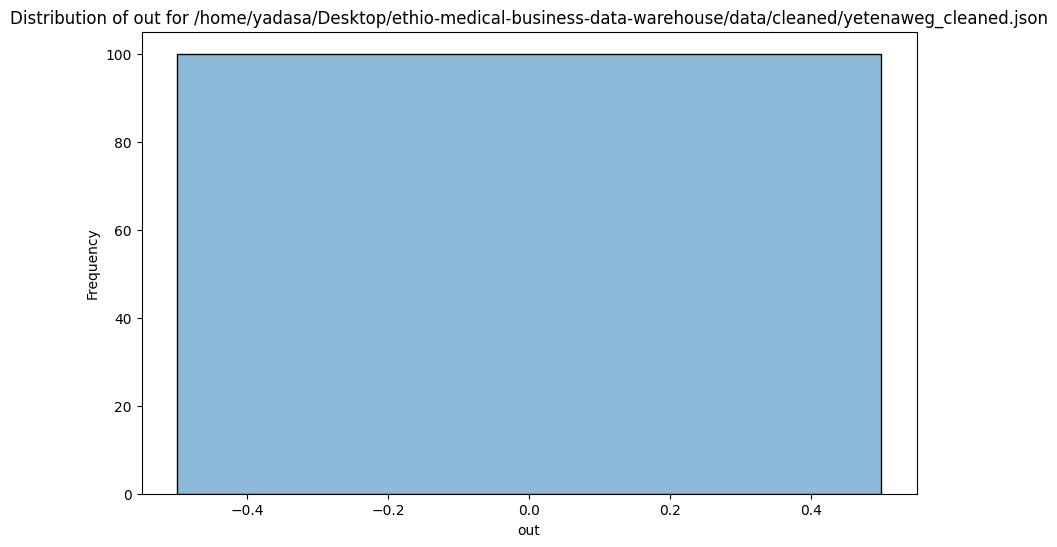

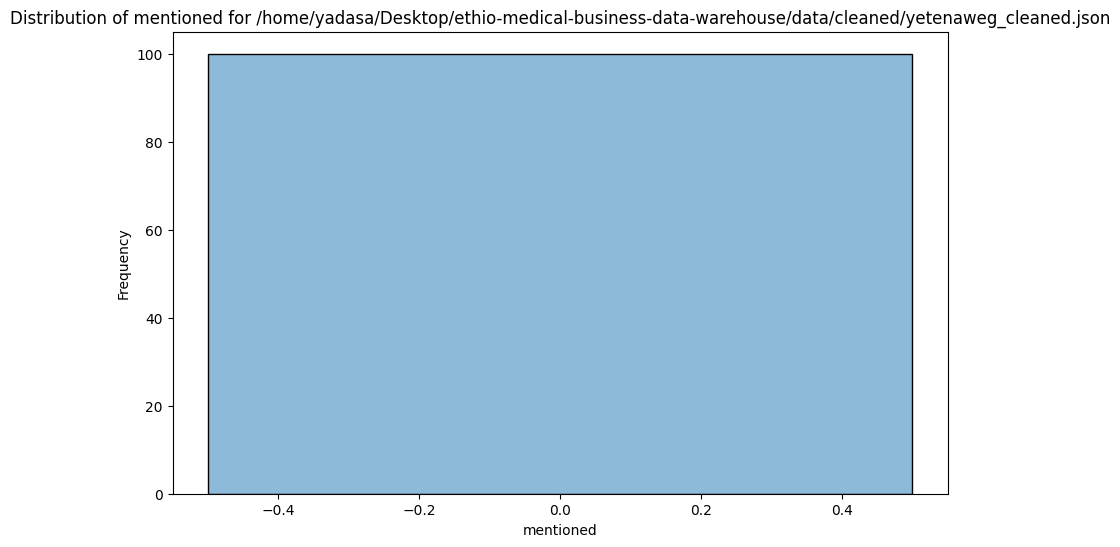

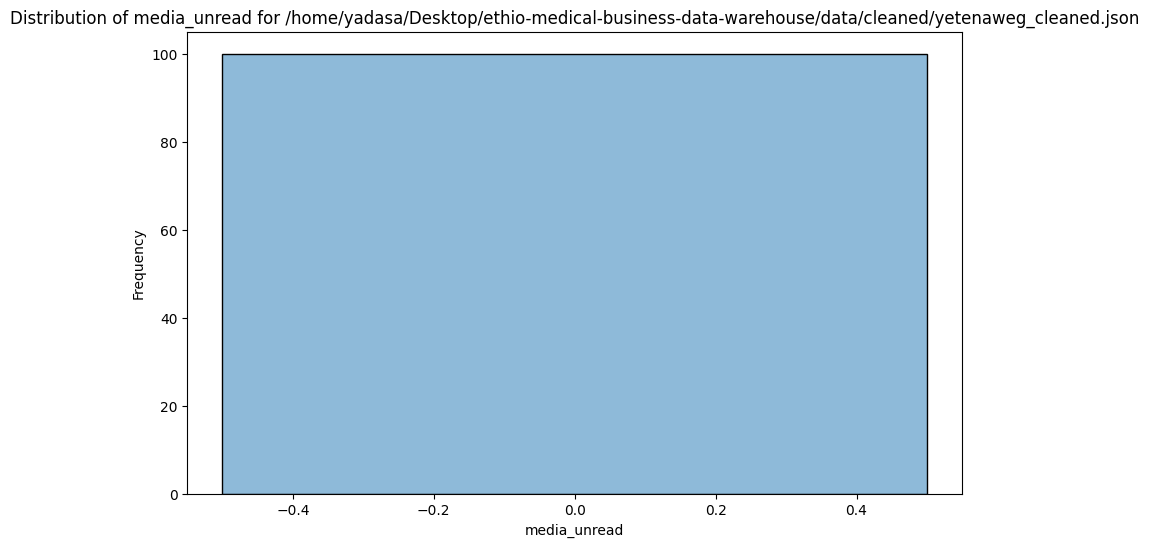

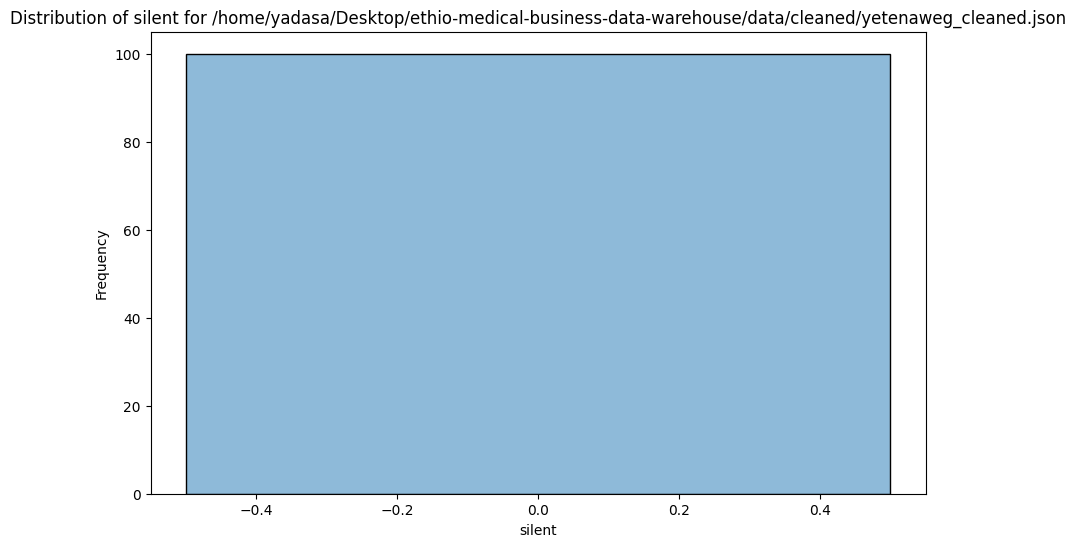

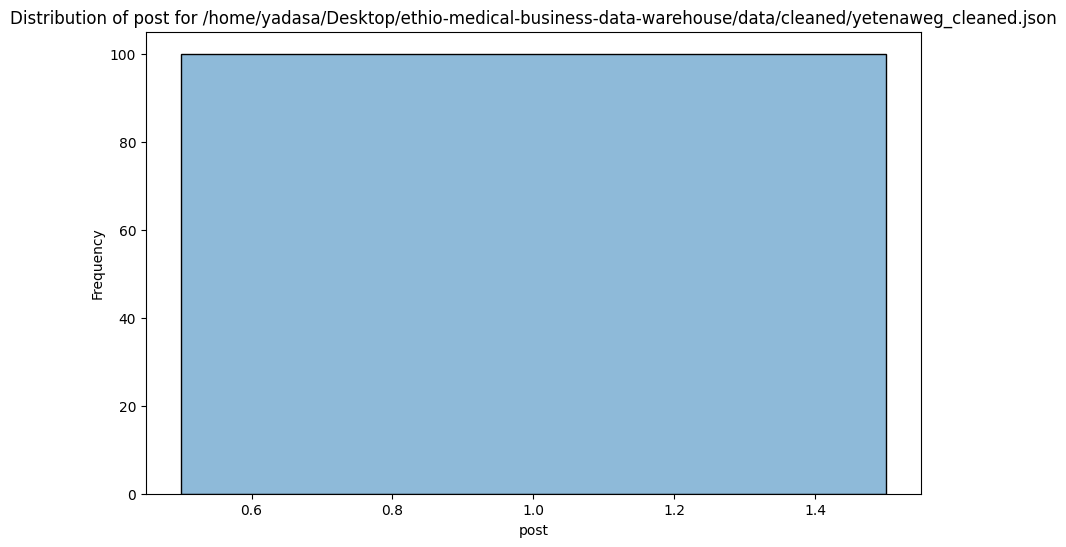

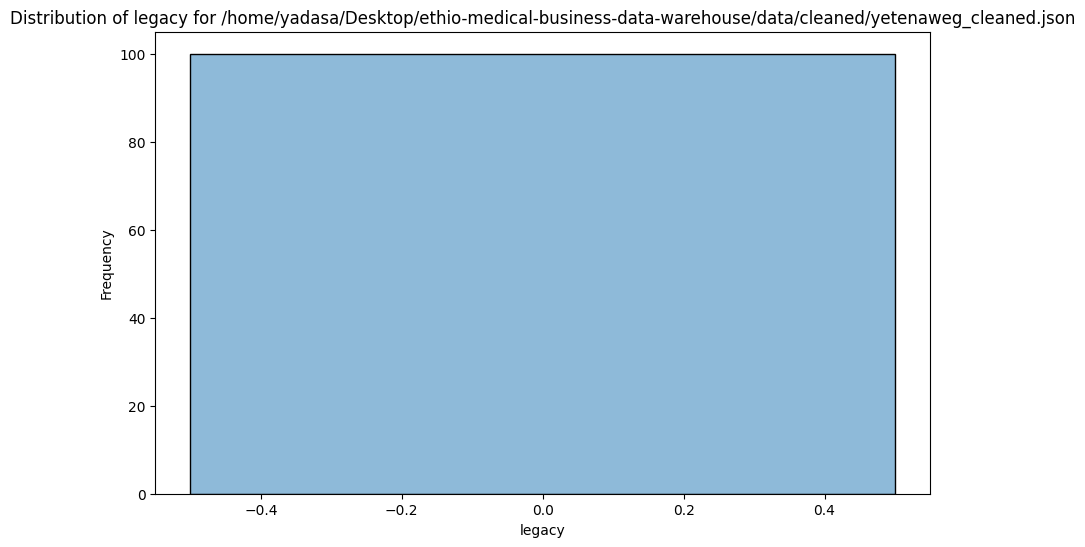

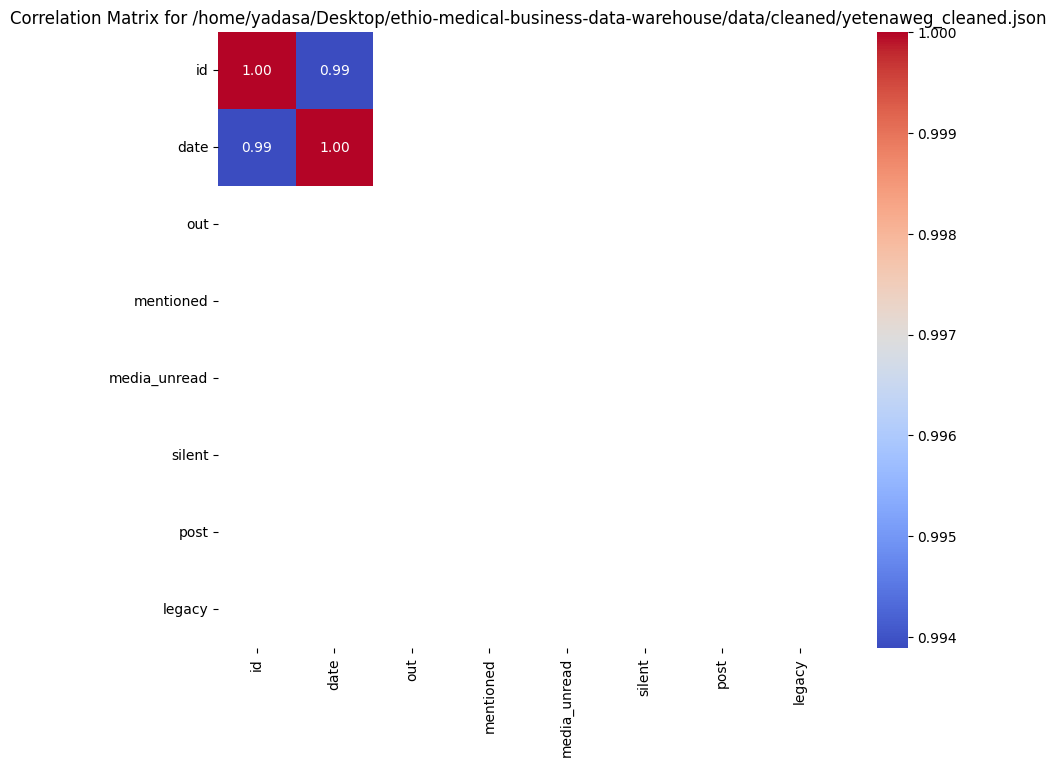

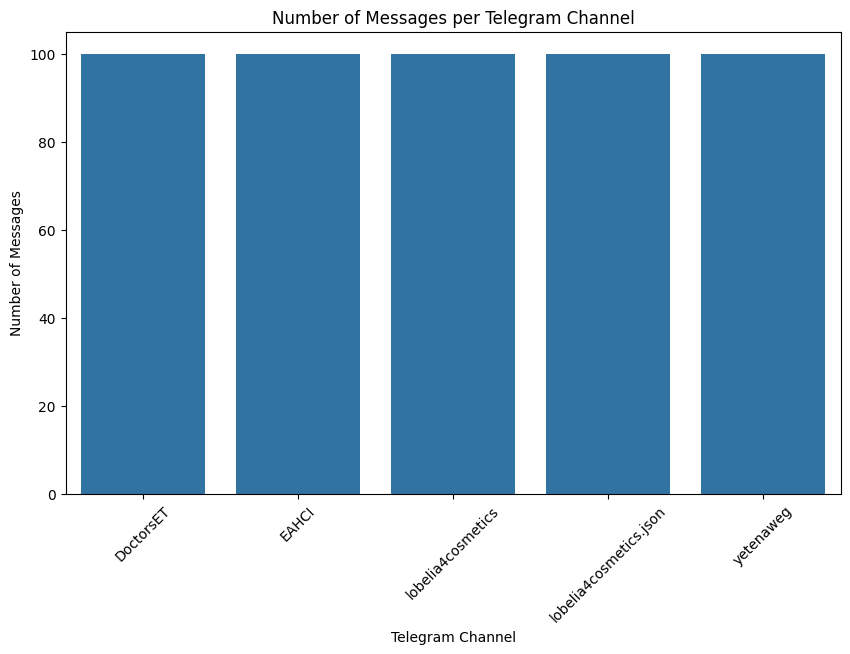

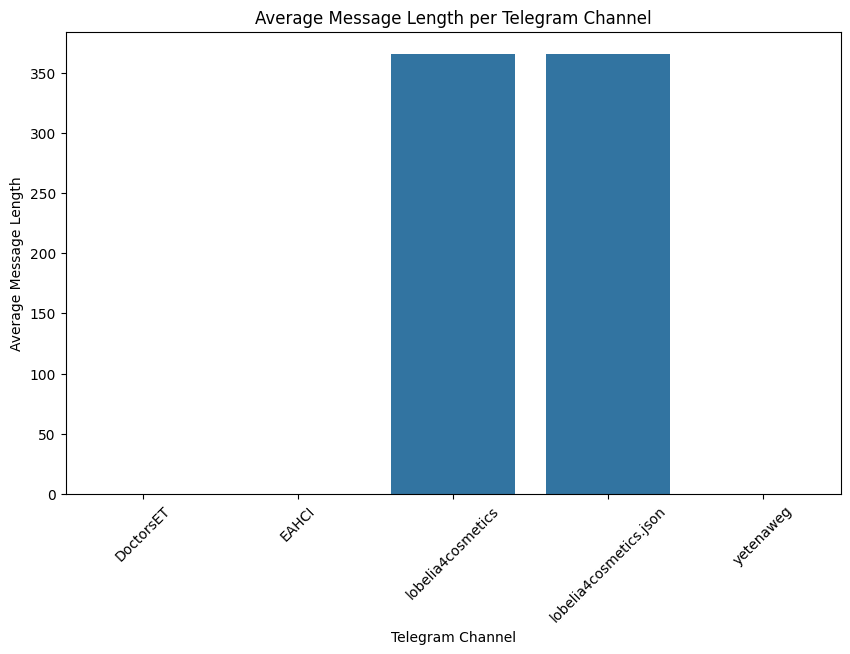

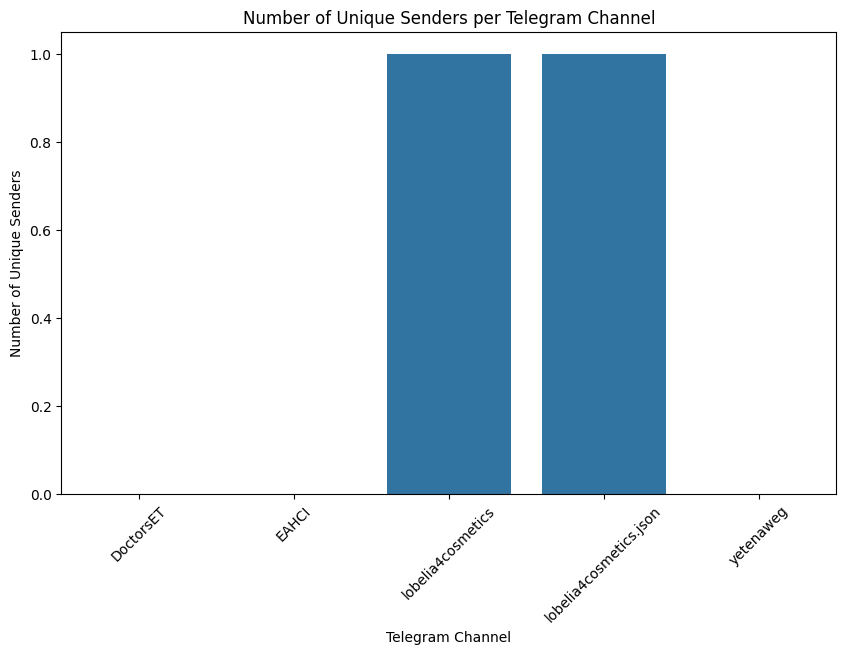

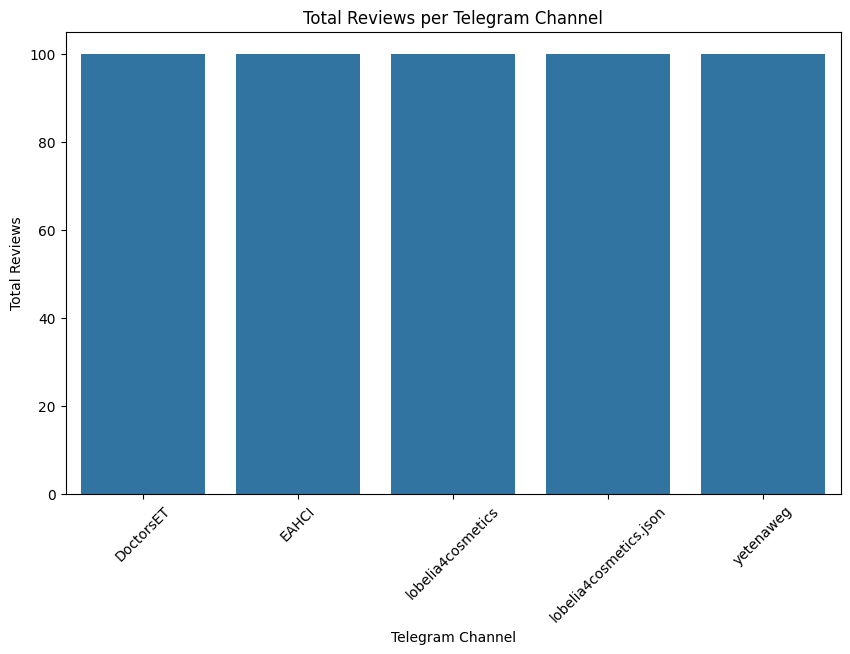

The Telegram channel with the most reviews is DoctorsET with 100.0 reviews.


In [24]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

# Function to perform EDA on a JSON file
def perform_eda(json_file):
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)

    df = pd.DataFrame(data)

    # Display basic information about the dataset
    print("Data Information for", json_file, ":")
    print(df.info())

    # Summary statistics
    print("\nSummary Statistics for", json_file, ":")
    print(df.describe())

    # Distribution of numerical variables
    num_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
    for col in num_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Distribution of {col} for {json_file}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    # Correlation matrix for numerical variables only
    if len(num_cols) > 1:
        numerical_df = df[num_cols]
        plt.figure(figsize=(10, 8))
        sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix for ' + json_file)
        plt.show()
    else:
        print("Insufficient numerical columns for correlation analysis in", json_file)

    return df

# Function to display sample images
def display_images(images, image_folder, num_images=5):
    plt.figure(figsize=(15, 8))
    for i in range(min(num_images, len(images))):
        img = cv2.imread(os.path.join(image_folder, images[i]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, min(num_images, len(images)), i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Function to compare channels and gather insights
def compare_channels(json_files):
    comparison_metrics = {}

    for file in json_files:
        df = perform_eda(file)
        channel_name = os.path.basename(file).split('_cleaned')[0]

        # Calculate metrics
        num_messages = len(df)
        avg_message_length = df['text'].str.len().mean() if 'text' in df.columns else 0
        num_unique_senders = df['sender_id'].nunique() if 'sender_id' in df.columns else 0
        total_reviews = df['review_count'].sum() if 'review_count' in df.columns else len(df)

        comparison_metrics[channel_name] = {
            'num_messages': num_messages,
            'avg_message_length': avg_message_length,
            'num_unique_senders': num_unique_senders,
            'total_reviews': total_reviews
        }

    return comparison_metrics

# Function to display insights
def display_insights(comparison_metrics):
    metrics_df = pd.DataFrame(comparison_metrics).T

    # Plot the number of messages per channel
    plt.figure(figsize=(10, 6))
    sns.barplot(x=metrics_df.index, y=metrics_df['num_messages'])
    plt.title('Number of Messages per Telegram Channel')
    plt.xlabel('Telegram Channel')
    plt.ylabel('Number of Messages')
    plt.xticks(rotation=45)
    plt.show()

    # Plot the average message length per channel
    plt.figure(figsize=(10, 6))
    sns.barplot(x=metrics_df.index, y=metrics_df['avg_message_length'])
    plt.title('Average Message Length per Telegram Channel')
    plt.xlabel('Telegram Channel')
    plt.ylabel('Average Message Length')
    plt.xticks(rotation=45)
    plt.show()

    # Plot the number of unique senders per channel
    plt.figure(figsize=(10, 6))
    sns.barplot(x=metrics_df.index, y=metrics_df['num_unique_senders'])
    plt.title('Number of Unique Senders per Telegram Channel')
    plt.xlabel('Telegram Channel')
    plt.ylabel('Number of Unique Senders')
    plt.xticks(rotation=45)
    plt.show()

    # Plot the total reviews per channel
    plt.figure(figsize=(10, 6))
    sns.barplot(x=metrics_df.index, y=metrics_df['total_reviews'])
    plt.title('Total Reviews per Telegram Channel')
    plt.xlabel('Telegram Channel')
    plt.ylabel('Total Reviews')
    plt.xticks(rotation=45)
    plt.show()

    # Print the channel with the most reviews
    most_reviews_channel = metrics_df['total_reviews'].idxmax()
    print(f'The Telegram channel with the most reviews is {most_reviews_channel} with {metrics_df.loc[most_reviews_channel, "total_reviews"]} reviews.')

# List of JSON files
json_files = [
    '/home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/DoctorsET_cleaned.json',
    '/home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/EAHCI_cleaned.json',
    '/home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/lobelia4cosmetics_cleaned.json',
    '/home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/lobelia4cosmetics.json',
    '/home/yadasa/Desktop/ethio-medical-business-data-warehouse/data/cleaned/yetenaweg_cleaned.json'
]

# Compare the channels and gather insights
comparison_metrics = compare_channels(json_files)

# Display the insights
display_insights(comparison_metrics)
